<a href="https://colab.research.google.com/github/TraversaOlazabal/Data-Science-2---ML/blob/main/CriptoAnalytics_AlejandroTraversaOlazabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CriptoAnalytics: Exploración y Análisis de Datos del Mercado Cripto** 🪙📱💹


## Autor: Alejandro Traversa Olazabal 🧑🏻‍💻

🔗 https://www.linkedin.com/in/alejandro-traversa-olazabal/

🔗 https://github.com/TraversaOlazabal

🔗 https://traversaolazabal.framer.ai/

## 📚 **Introducción**

El presente trabajo tiene como objetivo principal realizar una exploración y análisis profundo del mercado de criptomonedas a partir de datos históricos y actuales, con el fin de identificar patrones, relaciones y comportamientos que puedan brindar indicios sobre posibles tendencias futuras.

A través del diseño de un proceso ETL (Extracción, Transformación y Carga) automatizado y la construcción de un modelo de datos estructurado, se ha logrado consolidar información proveniente de fuentes pública -la API de CoinGecko— para analizar variables clave como el precio, la capitalización de mercado, el volumen de transacciones y otros indicadores relevantes de las principales criptomonedas.

Uno de los desafíos centrales del proyecto radica en la propia naturaleza volátil e impredecible del mercado cripto, donde factores externos —tecnológicos, económicos, regulatorios o incluso sociales— pueden alterar drásticamente las tendencias. Aun así, el análisis de datos históricos permite observar ciertas regularidades o comportamientos repetitivos que, con la ayuda de herramientas analíticas y visuales, pueden orientar a los usuarios en la toma de decisiones o en la detección de oportunidades.

Además, se exploran posibles correlaciones entre criptomonedas, considerando que el comportamiento de una puede influir —total o parcialmente— en otras, o bien que presenten dinámicas similares frente a determinados eventos del mercado. Si bien se reconoce que la predicción exacta de precios es una meta altamente compleja, en este trabajo se intentará, en la medida de lo posible, diseñar un modelo predictivo que permita anticipar tendencias, comprendiendo plenamente la magnitud del desafío y apoyándose en datos limpios, ordenados y confiables.

##🎯 **Objetivo**

El objetivo de este trabajo es realizar un análisis exploratorio y predictivo del mercado de criptomonedas, utilizando un conjunto de datos que combina información histórica y actual de las principales criptos por capitalización de mercado. A través de la limpieza, transformación y visualización de variables clave como el precio, la capitalización de mercado, el volumen de operaciones y los rankings, se busca comprender la dinámica del mercado y descubrir patrones de comportamiento.

Además del análisis exploratorio, este proyecto tiene como finalidad desarrollar modelos predictivos que permitan estimar posibles movimientos futuros de precios, ya sea en función de su propio comportamiento pasado como también considerando relaciones con otras criptomonedas. Si bien se trata de un desafío complejo debido a la alta volatilidad e imprevisibilidad del mercado cripto, el trabajo intenta ofrecer insights útiles para quienes buscan entender mejor su evolución y tomar decisiones más informadas.

## 🔍 **Abstracto: Motivación y Audiencia**

El crecimiento del mercado de criptomonedas ha despertado gran interés por su potencial como vehículo de inversión, aunque su volatilidad y complejidad representan un desafío. Este análisis busca identificar patrones de comportamiento entre las principales criptomonedas, evaluando su volatilidad, correlaciones clave y reacciones ante movimientos extremos, así como contrastar hipótesis sobre su estabilidad relativa según capitalización.

La audiencia que puede beneficiarse incluye a inversores minoristas, profesionales financieros, estudiantes, entusiastas del análisis de datos y también tomadores de decisión en empresas, que consideran las criptomonedas como una alternativa de inversión dentro de sus estrategias financieras.

## **¿Comenzamos?** 👨‍💻

## **Data Acquisition**

Importamos las bibliotecas necesarias. Utilizaremos requests para conectarnos a la API pública de CoinGecko, pandas y numpy para la manipulación de datos, y las bibliotecas matplotlib y seaborn para la visualización de gráficos que nos permitirán interpretar la evolución del mercado cripto de manera más clara e intuitiva.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Luego de haber importado las librerías necesarias, el siguiente paso clave en nuestro análisis consiste en **obtener los datos más recientes de las principales criptomonedas del mercado**. Para ello, construimos una función que consulta la API pública de CoinGecko y recupera información detallada sobre las diez criptos con mayor capitalización, incluyendo su precio actual, volumen de operaciones, máximos y mínimos históricos, oferta circulante y otros atributos relevantes.

Esta función nos permitirá generar un DataFrame actualizado con los datos del día, los cuales luego serán combinados con el histórico para llevar a cabo un análisis completo y enriquecido.

A continuación, definimos la función obtener_datos_actuales() que realiza esta tarea:

In [2]:
def obtener_datos_actuales():
    coin_ids = [
        "bitcoin", "ethereum", "polkadot", "ripple", "binancecoin",
        "solana", "litecoin", "dogecoin", "cardano", "tron"
    ]

    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "ids": ",".join(coin_ids),
        "sparkline": False
    }

    response = requests.get(url, params=params)
    data = response.json()

    columnas_utiles = [
                        'id', 'symbol', 'name', 'current_price', 'market_cap', 'market_cap_rank',
                        'circulating_supply', 'fully_diluted_valuation',
                        'total_volume',
                        'ath', 'ath_date',
                        'atl', 'atl_date',
                        'image', 'last_updated', 'max_supply'
    ]

    df = pd.DataFrame(data)[columnas_utiles]

    # Asegurarse que last_updated sea datetime
    df["last_updated"] = pd.to_datetime(df["last_updated"], utc=True)

    # Crear columna de solo fecha
    df["date"] = df["last_updated"].dt.date

    return df

Una vez definida la función que nos permite conectarnos con la API de CoinGecko y estructurar los datos obtenidos en un formato tabular, procedemos a su ejecución. En esta etapa inicial, nuestro objetivo es capturar una instantánea actualizada del mercado de criptomonedas, limitada a las diez más relevantes por capitalización de mercado.

Esta primera extracción nos brindará una base de datos con la que podremos comenzar el análisis exploratorio, y servirá además como punto de partida para construir un histórico a lo largo del tiempo.

Ejecutamos entonces la función obtener_datos_actuales() y almacenamos el resultado en un DataFrame llamado df_cryptos:

In [3]:
df_cryptos = obtener_datos_actuales()

Para verificar que la extracción se haya realizado correctamente y observar la estructura de los datos obtenidos, visualizamos las primeras filas del DataFrame. Esto nos permite validar que cada columna contenga la información esperada y que no haya errores evidentes en la consulta a la API.

A continuación, mostramos las primeras cinco filas de df_cryptos:

In [4]:
df_cryptos.head()

id symbol      name  current_price     market_cap  \
0      bitcoin    btc   Bitcoin      109614.00  2180172321008   
1     ethereum    eth  Ethereum        2596.73   313446850003   
2       ripple    xrp       XRP           2.29   135647900758   
3  binancecoin    bnb       BNB         662.20    96590700785   
4       solana    sol    Solana         154.55    82653033765   

   market_cap_rank  circulating_supply  fully_diluted_valuation  total_volume  \
0                1        1.988687e+07            2180172321008   37366480384   
1                2        1.207172e+08             313446850003   24078487515   
2                4        5.906819e+10             229614064006    4360905105   
3                5        1.458876e+08              96590700785     779010659   
4                6        5.347320e+08              93429601036    4928485213   

         ath                  ath_date        atl                  atl_date  \
0  111814.00  2025-05-22T18:41:28.492Z  67.810000  2013-07-06T00:00:00.000Z   
1    4878.26  2021-11-10T14:24:19.604Z   0.432979  2015-10-20T00:00:00.000Z   
2       3.40  2018-01-07T00:00:00.000Z   0.002686  2014-05-22T00:00:00.000Z   
3     788.84  2024-12-04T10:35:25.220Z   0.039818  2017-10-19T00:00:00.000Z   
4     293.31  2025-01-19T11:15:27.957Z   0.500801  2020-05-11T19:35:23.449Z   

                                               image  \
0  https://coin-images.coingecko.com/coins/images...   
1  https://coin-images.coingecko.com/coins/images...   
2  https://coin-images.coingecko.com/coins/images...   
3  https://coin-images.coingecko.com/coins/images...   
4  https://coin-images.coingecko.com/coins/images...   

                      last_updated    max_supply        date  
0 2025-07-03 12:05:07.346000+00:00  2.100000e+07  2025-07-03  
1 2025-07-03 12:05:10.048000+00:00           NaN  2025-07-03  
2 2025-07-03 12:05:17.984000+00:00  1.000000e+11  2025-07-03  
3 2025-07-03 12:05:23.754000+00:00  2.000000e+08  2025-07-03  
4 2025-07-03 12:05:18.987000+00:00           NaN  2025-07-03

Luego de visualizar una muestra inicial de los datos, es fundamental conocer la estructura completa del DataFrame. Para ello, utilizamos el método .info(), que nos permite identificar el tipo de dato de cada columna, la cantidad de valores no nulos y otras características relevantes.

Esta revisión es especialmente útil para detectar posibles valores faltantes o inconsistencias antes de avanzar con el análisis más profundo.

A continuación, inspeccionamos la información general de df_cryptos:

In [5]:
df_cryptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       10 non-null     object             
 1   symbol                   10 non-null     object             
 2   name                     10 non-null     object             
 3   current_price            10 non-null     float64            
 4   market_cap               10 non-null     int64              
 5   market_cap_rank          10 non-null     int64              
 6   circulating_supply       10 non-null     float64            
 7   fully_diluted_valuation  10 non-null     int64              
 8   total_volume             10 non-null     int64              
 9   ath                      10 non-null     float64            
 10  ath_date                 10 non-null     object             
 11  atl                      10 non-nul

Con los datos ya verificados y estructurados correctamente, procedemos a guardar una copia local del DataFrame en formato CSV. Esto nos permite preservar la información obtenida en esta instancia, facilitando su reutilización en futuros análisis sin necesidad de volver a consultar la API.

Además, contar con un respaldo local es útil para trabajar de forma más eficiente y evitar depender exclusivamente de la conexión en tiempo real.

Guardamos entonces los datos actuales en un archivo llamado datos_cryptos.csv:

In [6]:
df_cryptos.to_csv("datos_cryptos.csv", index=False)

Una vez generado el archivo CSV con los datos actuales, lo descargamos a nuestro equipo para conservar una copia local.

Ejecutamos la siguiente instrucción para iniciar la descarga:

In [ ]:
from google.colab import files
files.download("datos_cryptos.csv")

Dado que nuestro dataset contiene únicamente las diez criptomonedas más relevantes por capitalización, resulta útil mostrarlas de forma visual y completa. Para ello, definimos una función que recorre todo el DataFrame y presenta cada activo junto a su ícono, nombre, símbolo y precio actual.

Esta visualización nos permite obtener una primera impresión clara y ordenada del universo de criptomonedas que estaremos analizando.

Ejecutamos a continuación la función mostrar_con_icono_todas():

In [7]:
from IPython.display import HTML

def mostrar_con_icono_todas(df):
    html = ""
    for _, fila in df.iterrows():
        html += f"""
        <div style="display:flex; align-items:center; margin-bottom:10px;">
            <img src="{fila['image']}" style="width:25px; height:25px; margin-right:10px;">
            <span>{fila['name']} ({fila['symbol'].upper()}) - ${fila['current_price']}</span>
        </div>
        """
    return HTML(html)

# Mostramos todas las criptomonedas
mostrar_con_icono_todas(df_cryptos)

Para complementar los datos actuales con información histórica, definimos una función que consulta la API de CoinGecko para obtener el histórico diario de precio, capitalización de mercado y volumen total de las criptomonedas específicas de nuestro trabajo durante un período determinado (por defecto, los últimos 365 días).

Esta función procesa la respuesta JSON, convierte los timestamps a fechas legibles y filtra los datos para evitar incluir información incompleta del día en curso. Además, agrupa los datos por fecha, tomando el último registro del día como valor representativo, simulando un cierre diario.

Así, podremos construir un dataset histórico sólido y confiable que luego combinaremos con los datos actuales para realizar análisis más completos y profundos.

A continuación, presentamos la implementación de la función get_coin_history():

In [8]:
import requests
import pandas as pd
from datetime import datetime

def get_coin_history(coin_id, days=365):  # Cambiado default a 365
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": days,
        "interval": "daily"
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()

        prices = data.get("prices", [])
        market_caps = data.get("market_caps", [])
        total_volumes = data.get("total_volumes", [])

        # Construimos el DataFrame base con timestamp y precio
        df = pd.DataFrame({
            "timestamp": [x[0] for x in prices],
            "price": [x[1] for x in prices],
            "market_cap": [x[1] for x in market_caps] if market_caps else [None] * len(prices),
            "total_volume": [x[1] for x in total_volumes] if total_volumes else [None] * len(prices)
        })

        # Convertimos timestamp a fecha
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms", utc=True)
        df["date"] = df["timestamp"].dt.date

        # Filtramos para no incluir el día actual
        fecha_actual = datetime.utcnow().date()
        df = df[df["date"] < fecha_actual]

        # Agrupamos por fecha y tomamos el último registro por día (simulando cierre)
        df = df.groupby("date").agg({
            "price": "last",
            "market_cap": "last",
            "total_volume": "last"
        }).reset_index()

        # Agregamos la columna 'id'
        df["id"] = coin_id

        return df

    except Exception as e:
        print(f"❌ Error al obtener datos para {coin_id}: {e}")
        return None

Con la función definida, procedemos a obtener el histórico diario de los últimos 365 días para cada una de las diez criptomonedas principales seleccionadas. Esto nos permitirá contar con series temporales completas para analizar su evolución en precio, volumen y capitalización de mercado.

A continuación, ejecutamos la extracción de datos para cada moneda, comenzando con Bitcoin y siguiendo con las demás criptomonedas de interés:

In [9]:
# Bitcoin
df_btc = get_coin_history("bitcoin", days=365)

In [10]:
# Ethereum
df_eth = get_coin_history("ethereum", days=365)

In [11]:
# Polka Dot
df_dot = get_coin_history("polkadot", days=365)

In [12]:
# Ripple
df_xrp = get_coin_history("ripple", days=365)

⚠️ Nota importante sobre la API de CoinGecko:

Al ejecutar múltiples consultas a la API en un corto período de tiempo (especialmente al extraer datos históricos de varias criptomonedas consecutivamente), es posible que aparezcan errores intermitentes —generalmente a partir de la quinta o sexta criptomoneda— debido a las restricciones de velocidad impuestas por la propia API.

En esos casos, la función get_coin_history() puede lanzar un error de tipo 429 Too Many Requests o simplemente fallar la descarga de datos para una moneda en particular.

¿Cómo solucionarlo?
La solución es simple: esperar unos segundos o minutos y luego volver a ejecutar el bloque de código correspondiente (por ejemplo, el de binancecoin). La API suele restablecer el límite rápidamente y permite continuar con las consultas sin problemas.

In [14]:
# Binance Coin
df_bnb = get_coin_history("binancecoin", days=365)

In [15]:
# Solana
df_sol = get_coin_history("solana", days=365)

In [16]:
# Lite Coin
df_lite = get_coin_history("litecoin", days=365)

In [17]:
# Dogecoin
df_doge = get_coin_history("dogecoin", days=365)

In [18]:
# Cardano
df_ada = get_coin_history("cardano", days=365)

In [19]:
# Tron
df_tron = get_coin_history("tron", days=365)

Una vez obtenidos los datos históricos individuales para cada criptomoneda, el siguiente paso es consolidarlos en un único DataFrame.

A continuación, mostramos cómo concatenamos los DataFrames y verificamos el tamaño final del conjunto de datos:

In [20]:
# Concatenar todo lo histórico
df_historical = pd.concat([
    df_btc, df_eth, df_dot, df_xrp, df_bnb,
    df_sol, df_lite, df_tron, df_doge, df_ada
], ignore_index=True)

# Verificar
df_historical.shape

(3640, 5)

Para tener una vista rápida y confirmar que la unión de los datos fue exitosa, visualizamos las primeras filas del DataFrame resultante:

In [21]:
df_historical.head()

date         price    market_cap  total_volume       id
0  2024-07-04  60244.680764  1.186937e+12  3.034869e+10  bitcoin
1  2024-07-05  57189.174124  1.130122e+12  4.311201e+10  bitcoin
2  2024-07-06  56739.862851  1.118491e+12  6.008136e+10  bitcoin
3  2024-07-07  58230.484154  1.147176e+12  2.129391e+10  bitcoin
4  2024-07-08  55880.375378  1.100452e+12  2.021191e+10  bitcoin


Para comprender mejor la estructura del conjunto de datos histórico, revisamos un resumen con la información de cada columna, incluyendo tipos de datos y la cantidad de registros no nulos. Esto nos ayuda a detectar posibles valores faltantes y a confirmar que los datos fueron correctamente cargados:

In [22]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3640 non-null   object 
 1   price         3640 non-null   float64
 2   market_cap    3640 non-null   float64
 3   total_volume  3640 non-null   float64
 4   id            3640 non-null   object 
dtypes: float64(3), object(2)
memory usage: 142.3+ KB


Como parte del proceso de preservación y para facilitar su uso posterior, exportamos el DataFrame histórico consolidado a un archivo CSV:

In [23]:
df_historical.to_csv("datos_historicos_10cryptos.csv", index=False)

In [ ]:
from google.colab import files
files.download("datos_historicos_10cryptos.csv")

## **Data Wrangling**

Mediante un merge basado en el identificador de la criptomoneda y la fecha, logramos integrar ambos conjuntos en un único DataFrame, manteniendo toda la información relevante de cada fuente.

Esta fusión con método outer garantiza que no se pierdan registros.

A continuación, verificamos la dimensión del DataFrame resultante para asegurarnos de que la unión fue exitosa:

In [24]:
# Merge entre actuales e históricos
df_merged = pd.merge(
    df_historical,
    df_cryptos,
    on=["id", "date"],
    how="outer",
    suffixes=("_hist", "_actual")
)

# Verificamos
df_merged.shape

(3650, 20)

Antes de continuar con el análisis, es fundamental asegurarnos de que no existan registros duplicados en el dataset final:

In [25]:
duplicados = df_merged.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de filas duplicadas: 0


EXCELENTE 🌟 No existen registros duplicados. Ya tenemos nuestro dataframe con el que vamos a comenzar a trabajar.

Antes que nada vamos revisar cómo quedó la combinación de datos históricos y actuales. Mostramos las últimas filas del DataFrame resultante:

In [26]:
df_merged.tail()

date     price  market_cap_hist  total_volume_hist    id symbol  \
3645  2025-06-29  0.274606     2.602426e+10       3.950471e+08  tron    NaN   
3646  2025-06-30  0.276798     2.623939e+10       2.990996e+08  tron    NaN   
3647  2025-07-01  0.279923     2.654722e+10       4.654562e+08  tron    NaN   
3648  2025-07-02  0.278763     2.642427e+10       4.025233e+08  tron    NaN   
3649  2025-07-03       NaN              NaN                NaN  tron    trx   

      name  current_price  market_cap_actual  market_cap_rank  \
3645   NaN            NaN                NaN              NaN   
3646   NaN            NaN                NaN              NaN   
3647   NaN            NaN                NaN              NaN   
3648   NaN            NaN                NaN              NaN   
3649  TRON       0.284407       2.694141e+10              8.0   

      circulating_supply  fully_diluted_valuation  total_volume_actual  \
3645                 NaN                      NaN                  NaN   
3646                 NaN                      NaN                  NaN   
3647                 NaN                      NaN                  NaN   
3648                 NaN                      NaN                  NaN   
3649        9.478839e+10             2.694147e+10          598851732.0   

           ath                  ath_date       atl                  atl_date  \
3645       NaN                       NaN       NaN                       NaN   
3646       NaN                       NaN       NaN                       NaN   
3647       NaN                       NaN       NaN                       NaN   
3648       NaN                       NaN       NaN                       NaN   
3649  0.431288  2024-12-04T00:10:40.323Z  0.001804  2017-11-12T00:00:00.000Z   

                                                  image  \
3645                                                NaN   
3646                                                NaN   
3647                                                NaN   
3648                                                NaN   
3649  https://coin-images.coingecko.com/coins/images...   

                         last_updated  max_supply  
3645                              NaT         NaN  
3646                              NaT         NaN  
3647                              NaT         NaN  
3648                              NaT         NaN  
3649 2025-07-03 12:05:20.712000+00:00         NaN

## **Continuemos:**

Como puede observarse, una vez realizada la unión de los datasets históricos y actuales, obtenemos un DataFrame con información consolidada para cada una de las criptomonedas analizadas. Sin embargo, **esta fusión genera algunos desafíos que requieren una etapa de depuración y transformación para preparar los datos correctamente antes del análisis.**

En primer lugar, es común encontrar valores nulos en varias columnas, especialmente en los registros más recientes donde aún no se disponen de datos históricos consolidados o cuando los datos actuales no estaban disponibles al momento de la consulta. Para abordar esto, se completarán los valores faltantes de variables clave como price, market_cap_hist y total_volume_hist con sus respectivos equivalentes actuales (current_price, market_cap_actual, total_volume_actual) cuando estén disponibles.

Además, se reorganizarán las columnas para mejorar la legibilidad del DataFrame y facilitar futuros análisis, estableciendo un orden lógico que agrupe variables similares. También se procederá a renombrar algunas columnas para dar mayor claridad semántica (por ejemplo, price pasará a llamarse closing_price, y total_volume_hist a total_volume_day), y se ajustarán tipos de datos si es necesario para garantizar consistencia en el tratamiento posterior.

Finalmente, se eliminarán o transformarán aquellas columnas redundantes o no necesarias para los objetivos del proyecto. Este paso es esencial para reducir el ruido en los datos y asegurar una base sólida para la generación de visualizaciones y métricas.

In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   date                     3650 non-null   object             
 1   price                    3640 non-null   float64            
 2   market_cap_hist          3640 non-null   float64            
 3   total_volume_hist        3640 non-null   float64            
 4   id                       3650 non-null   object             
 5   symbol                   10 non-null     object             
 6   name                     10 non-null     object             
 7   current_price            10 non-null     float64            
 8   market_cap_actual        10 non-null     float64            
 9   market_cap_rank          10 non-null     float64            
 10  circulating_supply       10 non-null     float64            
 11  fully_diluted_valuation  10 no

Para facilitar la lectura y el análisis posterior, reordenamos las columnas del DataFrame final según un esquema lógico y conveniente. Esto permite que los datos más relevantes y comparables estén agrupados y se puedan interpretar más fácilmente.

Definimos una lista con el orden deseado de las columnas y aplicamos esta ordenación al DataFrame unificado:

In [28]:
# Lista con el orden deseado de las columnas,
orden_columnas = ['id', 'symbol', 'name', 'date', 'price', 'circulating_supply', 'market_cap_hist', 'market_cap_rank', 'total_volume_hist', 'max_supply', 'fully_diluted_valuation', 'ath', 'ath_date', 'atl', 'atl_date', 'image', 'last_updated', 'market_cap_actual', 'current_price', 'total_volume_actual']

# Reordenar el DataFrame
df_merged = df_merged[orden_columnas]

Como parte del proceso de limpieza y estandarización del dataset unificado, se procede a completar valores faltantes en las variables históricas clave utilizando, cuando están disponibles, los datos más recientes obtenidos en la extracción actual. Este paso resulta fundamental para asegurar que no se pierda información valiosa por la presencia de nulos tras el merge:

In [29]:
df_merged.loc[df_merged['market_cap_actual'].notna(), 'market_cap_hist'] = df_merged['market_cap_actual']
df_merged.loc[df_merged['current_price'].notna(), 'price'] = df_merged['current_price']
df_merged.loc[df_merged['total_volume_actual'].notna(), 'total_volume_hist'] = df_merged['total_volume_actual']

Con el objetivo de mejorar la claridad semántica del dataset y facilitar su interpretación en etapas posteriores del análisis, se procede a renombrar algunas columnas clave:

In [30]:
df_merged.rename(columns={
    'market_cap_hist': 'market_cap',
    'total_volume_hist': 'total_volume_day',
    'price': 'closing_price'
}, inplace=True)

Una vez renombradas las columnas, se procede a completar los valores faltantes en aquellas variables que presentan datos constantes a lo largo del tiempo para cada criptomoneda. Muchas de estas columnas, como el nombre del activo, su símbolo o su imagen, son atributos estáticos o que cambian con muy poca frecuencia, y su ausencia en algunos registros suele deberse a la forma en que se realiza la fusión entre datos históricos y actuales:

In [31]:
df_merged['circulating_supply'] = df_merged.groupby('id')['circulating_supply'].transform(lambda x: x.ffill().bfill())
df_merged['market_cap_rank'] = df_merged.groupby('id')['market_cap_rank'].transform(lambda x: x.ffill().bfill())
df_merged['max_supply'] = df_merged.groupby('id')['max_supply'].transform(lambda x: x.ffill().bfill())
df_merged['fully_diluted_valuation'] = df_merged.groupby('id')['fully_diluted_valuation'].transform(lambda x: x.ffill().bfill())
df_merged['ath'] = df_merged.groupby('id')['ath'].transform(lambda x: x.ffill().bfill())
df_merged['ath_date'] = df_merged.groupby('id')['ath_date'].transform(lambda x: x.ffill().bfill())
df_merged['atl'] = df_merged.groupby('id')['atl'].transform(lambda x: x.ffill().bfill())
df_merged['atl_date'] = df_merged.groupby('id')['atl_date'].transform(lambda x: x.ffill().bfill())
df_merged['image'] = df_merged.groupby('id')['image'].transform(lambda x: x.ffill().bfill())
df_merged['symbol'] = df_merged.groupby('id')['symbol'].transform(lambda x: x.ffill().bfill())
df_merged['name'] = df_merged.groupby('id')['name'].transform(lambda x: x.ffill().bfill())

Una vez que los valores actuales de capitalización de mercado, precio y volumen diario han sido utilizados para completar o actualizar los datos históricos correspondientes, estas columnas originales pierden relevancia en el análisis y pueden eliminarse del DataFrame:

In [32]:
df_merged.drop(columns=['market_cap_actual', 'current_price', 'total_volume_actual'], inplace=True)

Con el conjunto de datos ya unificado y depurado, se lleva a cabo una **última etapa de transformación y ajuste en el formato de los valores** para asegurar una correcta visualización, interpretación y posterior análisis:

**Redondeo de precios:** Se redondean a dos decimales los valores de price, ath (precio máximo histórico) y atl (precio mínimo histórico) para mejorar la presentación de los datos monetarios y facilitar su lectura.

**Conversión de grandes volúmenes numéricos:** Para evitar la notación científica y asegurar una visualización clara de valores como la capitalización de mercado, volumen de operaciones, o el suministro circulante, se convierte el tipo de dato de columnas específicas a float64.

**Formato entero para el ranking:** La columna market_cap_rank se completa con ceros en caso de valores nulos y se transforma a tipo entero, ya que representa una posición en el ranking y no admite decimales.

**Formato de fechas:** Las fechas correspondientes a los valores máximos y mínimos históricos (ath_date y atl_date) se convierten al formato de fecha sin incluir la hora, ya que el nivel de precisión horaria no es relevante para el análisis.

In [33]:
# 1. Redondear a 2 decimales
df_merged['closing_price'] = df_merged['closing_price'].round(2)
df_merged['ath'] = df_merged['ath'].round(2)
df_merged['atl'] = df_merged['atl'].round(2)

# 2. Convertir números grandes a float sin notación científica
pd.options.display.float_format = '{:,.2f}'.format  # afecta la visualización general
# Si querés evitar el cambio global y solo modificar columnas específicas:
cols_grandes = ['circulating_supply', 'market_cap', 'total_volume_day', 'max_supply', 'fully_diluted_valuation']
for col in cols_grandes:
    df_merged[col] = df_merged[col].astype('float64')  # asegura el tipo y saca notación científica

# 3. Convertir market_cap_rank a entero sin coma
df_merged['market_cap_rank'] = df_merged['market_cap_rank'].fillna(0).astype(int)

Para asegurar un correcto manejo y análisis temporal de los datos, es fundamental que las columnas que contienen fechas estén en un formato de fecha reconocido por Pandas:

In [34]:
# Convertir columnas a formato fecha
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")

Una vez aplicadas todas las transformaciones, se procede a realizar una última inspección visual de los datos para corroborar que las modificaciones hayan sido exitosas:

In [35]:
df_merged.tail()

id symbol  name       date  closing_price  circulating_supply  \
3645  tron    trx  TRON 2025-06-29           0.27   94,788,392,516.51   
3646  tron    trx  TRON 2025-06-30           0.28   94,788,392,516.51   
3647  tron    trx  TRON 2025-07-01           0.28   94,788,392,516.51   
3648  tron    trx  TRON 2025-07-02           0.28   94,788,392,516.51   
3649  tron    trx  TRON 2025-07-03           0.28   94,788,392,516.51   

            market_cap  market_cap_rank  total_volume_day  max_supply  \
3645 26,024,264,337.04                8    395,047,121.52         NaN   
3646 26,239,386,595.99                8    299,099,583.83         NaN   
3647 26,547,220,076.38                8    465,456,154.93         NaN   
3648 26,424,271,025.70                8    402,523,292.54         NaN   
3649 26,941,409,105.00                8    598,851,732.00         NaN   

      fully_diluted_valuation  ath                         ath_date  atl  \
3645        26,941,465,321.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3646        26,941,465,321.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3647        26,941,465,321.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3648        26,941,465,321.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   
3649        26,941,465,321.00 0.43 2024-12-04 00:10:40.323000+00:00 0.00   

                      atl_date  \
3645 2017-11-12 00:00:00+00:00   
3646 2017-11-12 00:00:00+00:00   
3647 2017-11-12 00:00:00+00:00   
3648 2017-11-12 00:00:00+00:00   
3649 2017-11-12 00:00:00+00:00   

                                                  image  \
3645  https://coin-images.coingecko.com/coins/images...   
3646  https://coin-images.coingecko.com/coins/images...   
3647  https://coin-images.coingecko.com/coins/images...   
3648  https://coin-images.coingecko.com/coins/images...   
3649  https://coin-images.coingecko.com/coins/images...   

                         last_updated  
3645                              NaT  
3646                              NaT  
3647                              NaT  
3648                              NaT  
3649 2025-07-03 12:05:20.712000+00:00

Al observar el resultado, se aprecia que el **conjunto de datos luce ahora mucho más limpio y estructurado**. Se han completado los valores nulos relevantes, los nombres de columnas están estandarizados, y los tipos de datos han sido corregidos para facilitar su lectura y análisis. Además, la información histórica y actual de cada criptomoneda se encuentra integrada y ordenada cronológicamente, lo que permitirá trabajar con este dataset de manera efectiva en las siguientes etapas del proyecto.

### Es momento de conocer en detalle nuestro dataset:

📊 Luego de realizar la unión, limpieza, actualización y reorganización de los datos, obtenemos un dataset final con columnas que resumen de forma clara y estructurada las principales características de cada criptomoneda a lo largo del tiempo. A continuación, se detalla brevemente el significado de cada una:

**id**: identificador único de la criptomoneda en la API de CoinGecko.

**symbol**: símbolo o abreviatura con la que se representa la criptomoneda (por ejemplo, BTC para Bitcoin).

**name**: nombre completo de la criptomoneda.

**date**: fecha correspondiente a cada registro (formato diario).

**closing_price**: precio de cierre diario de la criptomoneda en dólares.

**circulating_supply**: cantidad de monedas en circulación para esa fecha.

**market_cap**: capitalización de mercado, calculada como precio × circulante.

**market_cap_rank**: posición que ocupa la criptomoneda según su capitalización en el mercado global.

**total_volume_day**: volumen total operado durante el día (cantidad transada en USD).

**max_supply**: cantidad máxima de monedas que pueden llegar a existir (si está definida).

**fully_diluted_valuation**: valoración total si se emitiera la cantidad máxima de monedas.

**ath**: precio máximo histórico alcanzado (All Time High).

**ath_date**: fecha en la que se alcanzó el precio máximo histórico.

**atl**: precio mínimo histórico alcanzado (All Time Low).

**atl_date**: fecha en la que se alcanzó el precio mínimo histórico.

**image**: enlace a un ícono representativo de la criptomoneda.

**last_updated**: fecha y hora de la última actualización disponible desde la API.


In [36]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   closing_price            3650 non-null   float64            
 5   circulating_supply       3650 non-null   float64            
 6   market_cap               3650 non-null   float64            
 7   market_cap_rank          3650 non-null   int64              
 8   total_volume_day         3650 non-null   float64            
 9   max_supply               1825 non-null   float64            
 10  fully_diluted_valuation  3650 non-null   float64            
 11  ath                      3650 

Al analizar la estructura de nuestro DataFrame, observamos que contiene 3,650 registros distribuidos en 17 columnas. La mayoría de las columnas no presentan valores nulos, lo que indica que la depuración y el llenado de datos faltantes se realizó con éxito en gran medida. Destaca la columna max_supply, que posee aproximadamente la mitad de valores nulos, dado que no todas las criptomonedas tienen un límite máximo definido en su emisión.

En cuanto a los tipos de datos, contamos con columnas de tipo fecha (datetime64), que permiten trabajar con series temporales de manera eficiente, y varias columnas numéricas (float64 e int64) para representar valores financieros y cantidades. También tenemos columnas de texto (object), que identifican a cada criptomoneda y contienen URLs para imágenes.

Es importante destacar que la columna last_updated, aunque posee pocos datos no nulos, cumple una función clave: indica cuál es el registro que corresponde al valor más reciente obtenido, permitiendo conocer el día y la hora exacta en que se realizó la consulta a la API para esa criptomoneda.

Esta estructura sólida nos permitirá continuar con confianza en el análisis y la visualización de los datos.

Finalmente, para conservar el conjunto de datos completo y unificado, exportamos el DataFrame fusionado a un archivo CSV. Este archivo servirá como base para futuros análisis, visualizaciones o modelados, evitando tener que repetir las consultas y procesos previos.

Guardamos este archivo con el nombre dataset_final_unido.csv:

In [37]:
df_merged.to_csv("dataset_final_unido.csv", index=False)

In [ ]:
from google.colab import files
files.download("dataset_final_unido.csv")

## 🚨**Advertencia para lector con dificultades en la preparación del DataFrame** 🚨

Si has podido completar correctamente todas las etapas previas de extracción, depuración y combinación de datos, y cuentas con el DataFrame final (df_merged o el nombre que hayas asignado) listo para continuar, **no es necesario ejecutar el siguiente bloque de código**, ya que podrías sobrescribir tu trabajo y generar errores en las etapas posteriores.

Sin embargo, si por algún motivo encontraste dificultades, errores o no pudiste obtener el DataFrame correctamente, como alternativa rápida y práctica, puedes cargar directamente un archivo CSV preprocesado y disponible en GitHub. Esto te permitirá continuar con las fases de análisis y exploración de datos sin inconvenientes.

In [ ]:
# Si quiero obtener datos directamente de un csv con algunos datos previamente reunidos: esta luego la paso al final como plan B! por si no pueden traer datos desde la API
# Enlace raw del CSV en GitHub
url_github_csv = 'https://raw.githubusercontent.com/TraversaOlazabal/Data-Science-2---ML/refs/heads/main/data/dataset_final_unido_auxiliar.csv'

df_merged = pd.read_csv(url_github_csv, parse_dates=['last_updated'])
print("📥 Dataset cargado exitosamente desde GitHub.")

# Convertir columnas a formato fecha
df_merged["date"] = pd.to_datetime(df_merged["date"], errors="coerce")
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")

## **Continuamos:**

### 🧩 **Generación de variables derivadas y temporales**

Con el objetivo de enriquecer el análisis exploratorio y preparar el dataset para posibles aplicaciones futuras de Machine Learning, en esta sección vamos a crear nuevas variables a partir de las columnas existentes.

Por un lado, generaremos **variables derivadas**, que permiten capturar dinámicas relevantes del comportamiento de cada criptomoneda a lo largo del tiempo, como variaciones porcentuales, promedios móviles, volatilidad o ratios de relación entre volumen y capitalización.

Por otro lado, incorporaremos **variables temporales**, que nos permitirán explorar patrones según el momento del año, el mes o el día de la semana, y evaluar si existen comportamientos distintos en días hábiles y fines de semana.

Estas nuevas columnas no sólo aportan valor al análisis exploratorio, sino que también amplían el conjunto de atributos que podrían resultar útiles como variables predictoras en modelos de aprendizaje automático.

📌 Variables derivadas (cálculos sobre columnas existentes):

Variación porcentual diaria del precio (daily_pct_change):

In [38]:
df_merged["daily_pct_change"] = df_merged.groupby("id")["closing_price"].pct_change()

Promedios móviles (por ejemplo, 7 y 30 días):

In [39]:
df_merged["sma_7"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(7).mean())
df_merged["sma_30"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(30).mean())

Volatilidad (rolling std):

In [40]:
df_merged["volatility_7d"] = df_merged.groupby("id")["closing_price"].transform(lambda x: x.rolling(7).std())

Ratio de market cap sobre volumen diario:

In [41]:
df_merged["volume_marketcap_ratio"] = df_merged["total_volume_day"] / df_merged["market_cap"]

Proporción de oferta circulante respecto al total (si la cripto posee max_supply):

In [42]:
df_merged["circulation_ratio"] = df_merged["circulating_supply"] / df_merged["max_supply"]

📅 Variables temporales:

Año, mes, día de la semana:

In [43]:
df_merged["year"] = df_merged["date"].dt.year
df_merged["month"] = df_merged["date"].dt.month
df_merged["weekday"] = df_merged["date"].dt.day_name()

¿Es fin de semana? (útil para detectar patrones diferentes en días hábiles y no hábiles):

In [44]:
df_merged["is_weekend"] = df_merged["date"].dt.weekday >= 5

Perfecto, ahora ordenemos nuestras nuevas columnas:



In [45]:
column_order = [
    "id", "symbol", "name",
    "date", "year", "month", "weekday", "is_weekend",
    "closing_price", "daily_pct_change", "sma_7", "sma_30", "volatility_7d", "total_volume_day", "volume_marketcap_ratio",
    "market_cap", "market_cap_rank", "fully_diluted_valuation", "circulating_supply", "max_supply", "circulation_ratio",
    "ath", "ath_date", "atl", "atl_date",
    "image", "last_updated"
]

# Aplicar el nuevo orden
df_merged = df_merged[column_order]

## 🧾 **Visualización del DataFrame final**

A continuación, se muestra una vista preliminar del DataFrame final luego del proceso completo de limpieza, transformación y enriquecimiento de datos:

In [46]:
pd.set_option('display.max_columns', None)
df_merged.head(50)

id symbol name       date  year  month    weekday  is_weekend  \
0   binancecoin    bnb  BNB 2024-07-04  2024      7   Thursday       False   
1   binancecoin    bnb  BNB 2024-07-05  2024      7     Friday       False   
2   binancecoin    bnb  BNB 2024-07-06  2024      7   Saturday        True   
3   binancecoin    bnb  BNB 2024-07-07  2024      7     Sunday        True   
4   binancecoin    bnb  BNB 2024-07-08  2024      7     Monday       False   
5   binancecoin    bnb  BNB 2024-07-09  2024      7    Tuesday       False   
6   binancecoin    bnb  BNB 2024-07-10  2024      7  Wednesday       False   
7   binancecoin    bnb  BNB 2024-07-11  2024      7   Thursday       False   
8   binancecoin    bnb  BNB 2024-07-12  2024      7     Friday       False   
9   binancecoin    bnb  BNB 2024-07-13  2024      7   Saturday        True   
10  binancecoin    bnb  BNB 2024-07-14  2024      7     Sunday        True   
11  binancecoin    bnb  BNB 2024-07-15  2024      7     Monday       False   
12  binancecoin    bnb  BNB 2024-07-16  2024      7    Tuesday       False   
13  binancecoin    bnb  BNB 2024-07-17  2024      7  Wednesday       False   
14  binancecoin    bnb  BNB 2024-07-18  2024      7   Thursday       False   
15  binancecoin    bnb  BNB 2024-07-19  2024      7     Friday       False   
16  binancecoin    bnb  BNB 2024-07-20  2024      7   Saturday        True   
17  binancecoin    bnb  BNB 2024-07-21  2024      7     Sunday        True   
18  binancecoin    bnb  BNB 2024-07-22  2024      7     Monday       False   
19  binancecoin    bnb  BNB 2024-07-23  2024      7    Tuesday       False   
20  binancecoin    bnb  BNB 2024-07-24  2024      7  Wednesday       False   
21  binancecoin    bnb  BNB 2024-07-25  2024      7   Thursday       False   
22  binancecoin    bnb  BNB 2024-07-26  2024      7     Friday       False   
23  binancecoin    bnb  BNB 2024-07-27  2024      7   Saturday        True   
24  binancecoin    bnb  BNB 2024-07-28  2024      7     Sunday        True   
25  binancecoin    bnb  BNB 2024-07-29  2024      7     Monday       False   
26  binancecoin    bnb  BNB 2024-07-30  2024      7    Tuesday       False   
27  binancecoin    bnb  BNB 2024-07-31  2024      7  Wednesday       False   
28  binancecoin    bnb  BNB 2024-08-01  2024      8   Thursday       False   
29  binancecoin    bnb  BNB 2024-08-02  2024      8     Friday       False   
30  binancecoin    bnb  BNB 2024-08-03  2024      8   Saturday        True   
31  binancecoin    bnb  BNB 2024-08-04  2024      8     Sunday        True   
32  binancecoin    bnb  BNB 2024-08-05  2024      8     Monday       False   
33  binancecoin    bnb  BNB 2024-08-06  2024      8    Tuesday       False   
34  binancecoin    bnb  BNB 2024-08-07  2024      8  Wednesday       False   
35  binancecoin    bnb  BNB 2024-08-08  2024      8   Thursday       False   
36  binancecoin    bnb  BNB 2024-08-09  2024      8     Friday       False   
37  binancecoin    bnb  BNB 2024-08-10  2024      8   Saturday        True   
38  binancecoin    bnb  BNB 2024-08-11  2024      8     Sunday        True   
39  binancecoin    bnb  BNB 2024-08-12  2024      8     Monday       False   
40  binancecoin    bnb  BNB 2024-08-13  2024      8    Tuesday       False   
41  binancecoin    bnb  BNB 2024-08-14  2024      8  Wednesday       False   
42  binancecoin    bnb  BNB 2024-08-15  2024      8   Thursday       False   
43  binancecoin    bnb  BNB 2024-08-16  2024      8     Friday       False   
44  binancecoin    bnb  BNB 2024-08-17  2024      8   Saturday        True   
45  binancecoin    bnb  BNB 2024-08-18  2024      8     Sunday        True   
46  binancecoin    bnb  BNB 2024-08-19  2024      8     Monday       False   
47  binancecoin    bnb  BNB 2024-08-20  2024      8    Tuesday       False   
48  binancecoin    bnb  BNB 2024-08-21  2024      8  Wednesday       False   
49  binancecoin    bnb  BNB 2024-08-22  2024      8   Thursday       False   

    closing_price  daily_pct_chang

🆕 **Descripción de las nuevas columnas creadas**

**daily_pct_change**: Variación porcentual diaria del precio de cierre. Permite analizar la rentabilidad diaria de cada criptomoneda (expresada como números decimales, donde 0,1 es un incremento diario del 10%).

**sma_7**: Promedio móvil de los últimos 7 días del precio de cierre. Suaviza las fluctuaciones diarias y ayuda a detectar tendencias de corto plazo.

**sma_30**: Promedio móvil de los últimos 30 días. Útil para observar la tendencia a mediano plazo.

**volatility_7d**: Desviación estándar móvil de los últimos 7 días del precio. Representa la volatilidad semanal. Se encuentra medida en USD. Ejemplo simple:
Supongamos los siguientes precios de cierre (en USD) durante una semana: [100, 105, 95, 98, 102, 99, 101] La volatility_7d sería algo como: ≈ 3.16 USD. Eso significa que, en promedio, los precios diarios se desvían unos 3.16 dólares del promedio semanal.

**volume_marketcap_ratio**: Relación entre el volumen diario y la capitalización de mercado. Indica la actividad relativa del mercado para esa moneda. Un valor alto indica que hay mucho movimiento de compra/venta en relación a su capitalización. Puede ser señal de: Interés especulativo, Alta volatilidad, Noticias importantes. Un valor bajo sugiere que la moneda está poco activa o estable, en relación a su tamaño. Ejemplo simple: Supongamos: total_volume_day = 500 millones USD; market_cap = 10.000 millones USD. Entonces: volume_marketcap_ratio = 500M / 10.000M = 0.05. Esto significa que en ese día se transó un 5% del valor total de la moneda. Dicho de otro modo: por cada dólar en capitalización, hubo 5 centavos de movimiento ese día.

**circulation_ratio**: Relación entre la cantidad en circulación y el suministro máximo.
Indica qué porcentaje del total posible de monedas ya se encuentra en circulación. Un valor cercano a 1 (o 100%) sugiere que casi todas las unidades posibles ya fueron emitidas, lo cual puede influir en la presión inflacionaria y en la percepción de escasez de la criptomoneda.

**year**: Año en el que se registró el dato.

**month**: Mes del año en el que se registró el dato. Útil para análisis estacionales.

**weekday**: Día de la semana (de 0 a 6, donde 0 = lunes). Ayuda a identificar patrones según el día.

**is_weekend**: Variable booleana que indica si el día corresponde a fin de semana (True) o no (False). Permite comparar comportamientos entre días hábiles y no hábiles.

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   year                     3650 non-null   int32              
 5   month                    3650 non-null   int32              
 6   weekday                  3650 non-null   object             
 7   is_weekend               3650 non-null   bool               
 8   closing_price            3650 non-null   float64            
 9   daily_pct_change         3640 non-null   float64            
 10  sma_7                    3590 non-null   float64            
 11  sma_30                   3360 

Ahora analicemos en detalle la cantidad de datos nulos y a qué variables pertenecen:

In [48]:
df_merged.isnull().sum().sort_values(ascending=False)

last_updated               3640
max_supply                 1825
circulation_ratio          1825
sma_30                      290
sma_7                        60
volatility_7d                60
daily_pct_change             10
name                          0
symbol                        0
date                          0
id                            0
is_weekend                    0
closing_price                 0
month                         0
weekday                       0
year                          0
market_cap                    0
total_volume_day              0
volume_marketcap_ratio        0
circulating_supply            0
fully_diluted_valuation       0
market_cap_rank               0
ath                           0
ath_date                      0
atl                           0
atl_date                      0
image                         0
dtype: int64

### 📌 **Análisis de valores nulos en el dataset**

Al inspeccionar la estructura del DataFrame, se identificaron algunas columnas con valores faltantes. Estas ausencias no son aleatorias, sino que responden a la lógica del negocio y a la naturaleza de los datos:

🧮 **max_supply y circulation_ratio**

Ambas variables presentan 1825 valores nulos, es decir, la mitad del total. Esto se debe a que las criptomonedas ethereum, dogecoin, polkadot, solana y tron, no tienen un suministro máximo definido, sino que su suministro puede crecer indefinidamente, lo que significa que se pueden emitir nuevos tokens continuamente. En consecuencia, tampoco se puede calcular su ratio de circulación (circulation_ratio), ya que depende directamente del max_supply.

🧾 **last_updated**

Solo contiene 10 registros no nulos, ya que este campo fue incluido únicamente para identificar las fechas exactas de solicitud de los datos actuales desde la API y no forma parte del análisis histórico.

📉 **daily_pct_change, sma_7, sma_30, volatility_7d**
Estas columnas tienen nulos debido al cálculo de métricas basadas en ventanas móviles:

daily_pct_change está calculada como el cambio porcentual día a día, por lo tanto el primer registro de cada criptomoneda no puede tener este valor.

sma_7, sma_30 y volatility_7d requieren al menos 7 o 30 días previos para su cálculo, por lo que los primeros días no pueden tener estos datos.

Por lo explicado predentemente **se decide mantener estos registros nulos**, no dándoles tratamiento específico alguno.

In [49]:
df_merged.to_csv("dataset_final_unido.csv", index=False)

In [ ]:
from google.colab import files
files.download("dataset_final_unido.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Seguimos:**

🔧 Modelado de datos: Separación en tablas de hechos y dimensiones

Para mejorar la organización del dataset y preparar los datos para un análisis más eficiente (especialmente si se desea usar Power BI, SQL u otro sistema analítico), separamos el DataFrame final en dos tablas:

Una tabla de dimensión, que contiene información descriptiva y general de cada criptomoneda.

Una tabla de hechos, que registra datos diarios relacionados al precio, capitalización y volumen.

Este enfoque facilita el modelado y evita la repetición innecesaria de datos estáticos. Las tablas pueden

In [50]:
df_merged = pd.read_csv("dataset_final_unido.csv", parse_dates=["date", "ath_date", "atl_date"])
df_merged["ath_date"] = pd.to_datetime(df_merged["ath_date"], errors="coerce")
df_merged["atl_date"] = pd.to_datetime(df_merged["atl_date"], errors="coerce")
df_merged["last_updated"] = pd.to_datetime(df_merged["last_updated"], errors="coerce")

# Crear tabla de dimensiones
cols_dim = [
    "id", "symbol", "name", "image", "max_supply", "fully_diluted_valuation",
    "ath", "ath_date", "atl", "atl_date", "circulation_ratio"
]
df_dim_crypto = df_merged[cols_dim].drop_duplicates(subset="id").reset_index(drop=True)

# Crear tabla de hechos
cols_fact = [
    "id", "date", "closing_price", "circulating_supply", "market_cap",
    "market_cap_rank", "total_volume_day", "daily_pct_change", "sma_7", "sma_30", "volatility_7d", "volume_marketcap_ratio", "year", "month", "weekday", "is_weekend"
]
df_fact_prices = df_merged[cols_fact].copy()

# Guardar CSVs
df_dim_crypto.to_csv("dim_crypto.csv", index=False)
df_fact_prices.to_csv("fact_prices.csv", index=False)

In [ ]:
from google.colab import files
files.download("dim_crypto.csv")

In [ ]:
from google.colab import files
files.download("fact_prices.csv")

📌 **Importante:** Aunque hemos generado dos nuevas tablas (dim_crypto y fact_prices) a partir del dataset original (df_merged), este último no ha sido modificado ni eliminado.
Esto significa que:

Podemos seguir trabajando con df_merged si necesitamos tener todas las columnas disponibles en un solo lugar.

Las nuevas tablas tienen propósitos específicos:

dim_crypto: contiene información descriptiva de cada criptomoneda (nombre, símbolo, máximos, mínimos, entre otros).

fact_prices: guarda los datos diarios relacionados con precio, volumen y capitalización.

Esta estructura nos prepara para un enfoque más profesional, como el uso de modelos estrella en herramientas de BI (por ejemplo, Power BI), donde se busca optimizar el análisis evitando redundancia y mejorando el rendimiento.

**Ahora repasemos nuestro dataframe y veamos más detalles de nuestras variables:**

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)** 🔍📊

El objetivo en esta etapa es:

- Comprender mejor la distribución de los datos.

- Detectar patrones y tendencias.

- Identificar posibles relaciones entre variables.

- Guiar futuras decisiones para modelos predictivos.

In [51]:
df_merged.head()

id symbol name       date  year  month   weekday  is_weekend  \
0  binancecoin    bnb  BNB 2024-07-04  2024      7  Thursday       False   
1  binancecoin    bnb  BNB 2024-07-05  2024      7    Friday       False   
2  binancecoin    bnb  BNB 2024-07-06  2024      7  Saturday        True   
3  binancecoin    bnb  BNB 2024-07-07  2024      7    Sunday        True   
4  binancecoin    bnb  BNB 2024-07-08  2024      7    Monday       False   

   closing_price  daily_pct_change  sma_7  sma_30  volatility_7d  \
0         556.98               NaN    NaN     NaN            NaN   
1         513.95             -0.08    NaN     NaN            NaN   
2         498.62             -0.03    NaN     NaN            NaN   
3         527.46              0.06    NaN     NaN            NaN   
4         489.90             -0.07    NaN     NaN            NaN   

   total_volume_day  volume_marketcap_ratio        market_cap  \
0  1,001,238,960.47                    0.01 85,665,920,083.94   
1  1,545,553,921.19                    0.02 79,274,495,247.43   
2  2,604,851,068.36                    0.03 76,714,273,647.30   
3    775,622,840.40                    0.01 81,193,238,739.26   
4    886,962,556.25                    0.01 75,281,277,003.42   

   market_cap_rank  fully_diluted_valuation  circulating_supply  \
0                5        96,590,700,785.00      145,887,575.79   
1                5        96,590,700,785.00      145,887,575.79   
2                5        96,590,700,785.00      145,887,575.79   
3                5        96,590,700,785.00      145,887,575.79   
4                5        96,590,700,785.00      145,887,575.79   

      max_supply  circulation_ratio    ath                         ath_date  \
0 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
1 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
2 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
3 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   
4 200,000,000.00               0.73 788.84 2024-12-04 10:35:25.220000+00:00   

   atl                  atl_date  \
0 0.04 2017-10-19 00:00:00+00:00   
1 0.04 2017-10-19 00:00:00+00:00   
2 0.04 2017-10-19 00:00:00+00:00   
3 0.04 2017-10-19 00:00:00+00:00   
4 0.04 2017-10-19 00:00:00+00:00   

                                               image last_updated  
0  https://coin-images.coingecko.com/coins/images...          NaT  
1  https://coin-images.coingecko.com/coins/images...          NaT  
2  https://coin-images.coingecko.com/coins/images...          NaT  
3  https://coin-images.coingecko.com/coins/images...          NaT  
4  https://coin-images.coingecko.com/coins/images...          NaT

In [52]:
# Dimensiones del dataset
df_merged.shape

# Tipos de datos y nulos
df_merged.info()

# Estadísticas descriptivas
df_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       3650 non-null   object             
 1   symbol                   3650 non-null   object             
 2   name                     3650 non-null   object             
 3   date                     3650 non-null   datetime64[ns]     
 4   year                     3650 non-null   int64              
 5   month                    3650 non-null   int64              
 6   weekday                  3650 non-null   object             
 7   is_weekend               3650 non-null   bool               
 8   closing_price            3650 non-null   float64            
 9   daily_pct_change         3640 non-null   float64            
 10  sma_7                    3590 non-null   float64            
 11  sma_30                   3360 

date     year    month  closing_price  \
count                           3650 3,650.00 3,650.00       3,650.00   
mean   2025-01-01 23:59:59.999999744 2,024.50     6.53       8,785.90   
min              2024-07-04 00:00:00 2,024.00     1.00           0.09   
25%              2024-10-03 00:00:00 2,024.00     4.00           0.54   
50%              2025-01-02 00:00:00 2,025.00     7.00          33.38   
75%              2025-04-03 00:00:00 2,025.00    10.00         606.16   
max              2025-07-03 00:00:00 2,025.00    12.00     111,560.36   
std                              NaN     0.50     3.45      25,788.10   

       daily_pct_change      sma_7     sma_30  volatility_7d  \
count          3,640.00   3,590.00   3,360.00       3,590.00   
mean               0.00   8,788.27   8,792.21         219.14   
min               -0.25       0.10       0.10           0.00   
25%               -0.02       0.55       0.57           0.02   
50%                0.00      34.70      35.96           0.99   
75%                0.02     604.48     606.59          14.53   
max                0.91 109,083.18 106,758.50       6,468.93   
std                0.05  25,775.95  25,734.55         710.73   

        total_volume_day  volume_marketcap_ratio           market_cap  \
count           3,650.00                3,650.00             3,650.00   
mean    8,156,847,596.21                    0.05   234,789,937,984.87   
min        69,885,707.23                    0.00     4,200,982,051.88   
25%       540,036,478.58                    0.02    13,741,912,035.33   
50%     1,349,642,387.69                    0.04    36,594,130,067.04   
75%     6,544,782,893.76                    0.06   124,551,285,213.86   
max   190,460,293,531.54                    0.81 2,214,712,145,787.25   
std    16,448,531,193.56                    0.05   499,955,330,514.50   

       market_cap_rank  fully_diluted_valuation  circulating_supply  \
count         3,650.00                 3,650.00            3,650.00   
mean             10.20       300,578,492,394.20   34,229,063,470.03   
min               1.00         5,464,999,591.00       19,886,871.00   
25%               4.00        26,033,895,817.00      120,717,217.54   
50%               7.00        60,291,887,191.50    1,028,499,544.78   
75%              11.00       229,614,064,006.00   59,068,187,926.00   
max              31.00     2,180,172,321,008.00  149,888,936,383.71   
std               9.45       634,194,632,231.76   49,536,574,685.27   

              max_supply  circulation_ratio        ath      atl  
count           1,825.00           1,825.00   3,650.00 3,650.00  
mean   29,061,000,000.00               0.80  11,824.73     7.26  
min        21,000,000.00               0.59       0.43     0.00  
25%        84,000,000.00               0.73       3.09     0.00  
50%       200,000,000.00               0.80     174.14     0.23  
75%    45,000,000,000.00               0.91     788.84     1.15  
max   100,000,000,000.00               0.95 111,814.00    67.81  
std    39,513,583,715.16               0.13  33,364.43    20.20

In [53]:
df_merged.describe(include="object")

id symbol  name   weekday  \
count          3650   3650  3650      3650   
unique           10     10    10         7   
top     binancecoin    bnb   BNB  Thursday   
freq            365    365   365       530   

                                                    image  
count                                                3650  
unique                                                 10  
top     https://coin-images.coingecko.com/coins/images...  
freq                                                  365

Ahora que tenemos en claro cuál es el formato definitivo de nuestro dataframe y la información que nos proporciona, estamos en mejores condiciones de definir nuestras **preguntas de interés** y **nuestra hipótesis de trabajo**:

##❓ **Preguntas de interés**

¿Qué criptomonedas presentan mayor capitalización de mercado promedio en los últimos 90 días?

¿Cuál ha sido el comportamiento del precio de las principales criptomonedas en el tiempo?

¿Existen criptomonedas que evolucionan de forma similar (positiva o negativa) a lo largo del tiempo?

¿Cuál es la relación entre el volumen de operaciones y el precio diario?

¿Qué tan volátil ha sido cada criptomoneda en el periodo analizado?

¿Cómo se comporta el precio de una criptomoneda frente a movimientos bruscos en otra?

¿Qué criptomonedas muestran una recuperación más rápida tras caídas significativas?

##💡 **Hipótesis**
Proponemos una hipótesis que podría ser reveladora para nuestro análisis exploratorio:

**"Las criptomonedas con mayor capitalización de mercado presentan menor volatilidad de precios que aquellas con menor capitalización."**

*Variables involucradas:*

market_cap (capitalización de mercado)

price (precio de la criptomoneda)

market_cap_rank (ranking de capitalización)

*Justificación:*

La hipótesis se basa en la idea de que los activos más consolidados —como Bitcoin o Ethereum—, al contar con una base de usuarios e inversores más amplia, suelen tener movimientos menos abruptos frente a eventos de mercado, en comparación con criptomonedas más pequeñas o emergentes. Esto permitiría anticipar un menor riesgo relativo al invertir en criptos de mayor capitalización, aunque también implicaría, en general, menor margen de rentabilidad especulativa.

## 📊 **Gráficos**

Los gráficos permiten visualizar patrones, tendencias y relaciones entre variables que serían difíciles de detectar solo con números. Ayudan a comunicar hallazgos de forma clara y rápida, facilitando la toma de decisiones y la comprensión del análisis por parte de cualquier tipo de audiencia, incluso sin conocimientos técnicos.

Ahora tratemos de responder nuestras preguntas de interés y veamos que insights obtenemos:

## 📌 Pregunta de Interés n° 1:

**¿Qué criptomonedas presentan mayor capitalización de mercado promedio en los últimos 90 días?** ❓

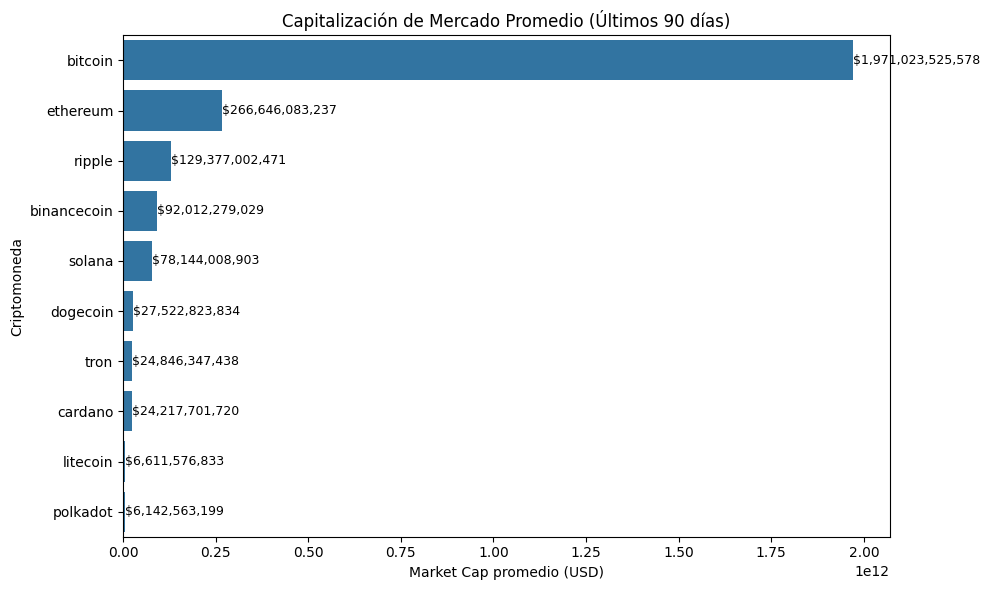

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'date' sea datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Filtrar los últimos 90 días disponibles
fecha_max = df_merged["date"].max()
fecha_min = fecha_max - pd.Timedelta(days=90)
df_ultimos_90 = df_merged[df_merged["date"] >= fecha_min]

# Calcular promedio de market cap por cripto
promedios_marketcap = (
    df_ultimos_90.groupby("id")["market_cap"]
    .mean()
    .sort_values(ascending=False)  # Orden ascendente para que las barras más grandes queden arriba
)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(
    x=promedios_marketcap.values,
    y=promedios_marketcap.index,
    orient="h"              # horizontal
)
plt.title("Capitalización de Mercado Promedio (Últimos 90 días)")
plt.xlabel("Market Cap promedio (USD)")
plt.ylabel("Criptomoneda")

for i, v in enumerate(promedios_marketcap.values):
    plt.text(v, i, f"${v:,.0f}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

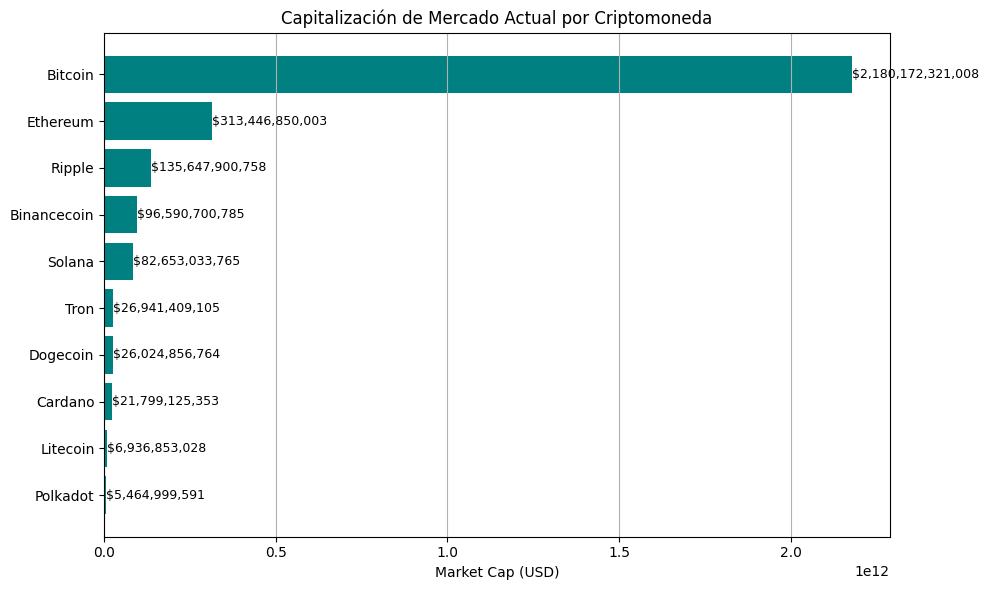

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que la fecha esté en formato datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Obtener el último valor (fecha más reciente) de market cap por cripto
latest_market_caps = (
    df_merged.sort_values("date")
    .groupby("id")
    .tail(1)[["id", "market_cap"]]
    .set_index("id")
    .sort_values("market_cap", ascending=True)
)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(latest_market_caps.index.str.capitalize(), latest_market_caps["market_cap"], color="teal")
plt.xlabel("Market Cap (USD)")
plt.title("Capitalización de Mercado Actual por Criptomoneda")
plt.grid(axis='x')

# Agregar texto con el valor numérico al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f"${width:,.0f}", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

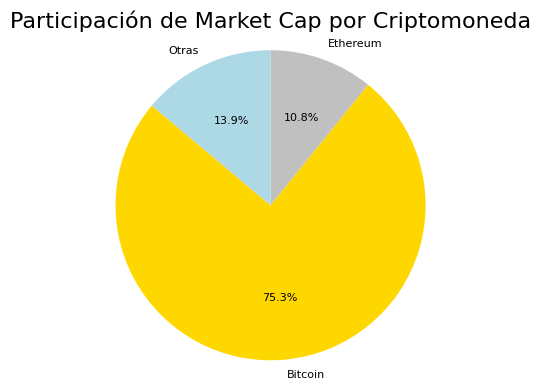

In [56]:
import matplotlib.pyplot as plt

# Tomar el último market cap disponible para cada cripto
latest_market_caps = (
    df_merged.sort_values("date")
    .groupby("id")
    .tail(1)[["id", "market_cap"]]
    .set_index("id")
    .sort_values("market_cap", ascending=False)
)

# Extraer valores individuales
bitcoin_cap = latest_market_caps.loc["bitcoin", "market_cap"]
ethereum_cap = latest_market_caps.loc["ethereum", "market_cap"]
other_caps = latest_market_caps.drop(["bitcoin", "ethereum"]).sum().values[0]

# Preparar datos para el gráfico
labels = ["Bitcoin", "Ethereum", "Otras"]
values = [bitcoin_cap, ethereum_cap, other_caps]
colors = ["gold", "silver", "lightblue"]

# Crear gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors, textprops={'fontsize': 8})
plt.title("Participación de Market Cap por Criptomoneda", fontsize=16)
plt.axis("equal")  # Para mantener forma circular
plt.tight_layout()
plt.show()

El gráfico muestra claramente el **dominio de Bitcoin en el mercado cripto**, representando el 74,5% de la capitalización total entre las criptomonedas analizadas. Le sigue Ethereum con un 11,2%, mientras que el resto de las 8 criptomonedas combinadas apenas alcanza un 14,3%.
Esto destaca la alta concentración del valor de mercado en un pequeño número de activos, lo que puede tener implicancias clave para decisiones de inversión y análisis de riesgo.


## 📌 Pregunta de Interés n° 2:

**¿Cuál ha sido el comportamiento del precio de las principales criptomonedas en el tiempo?** ❓

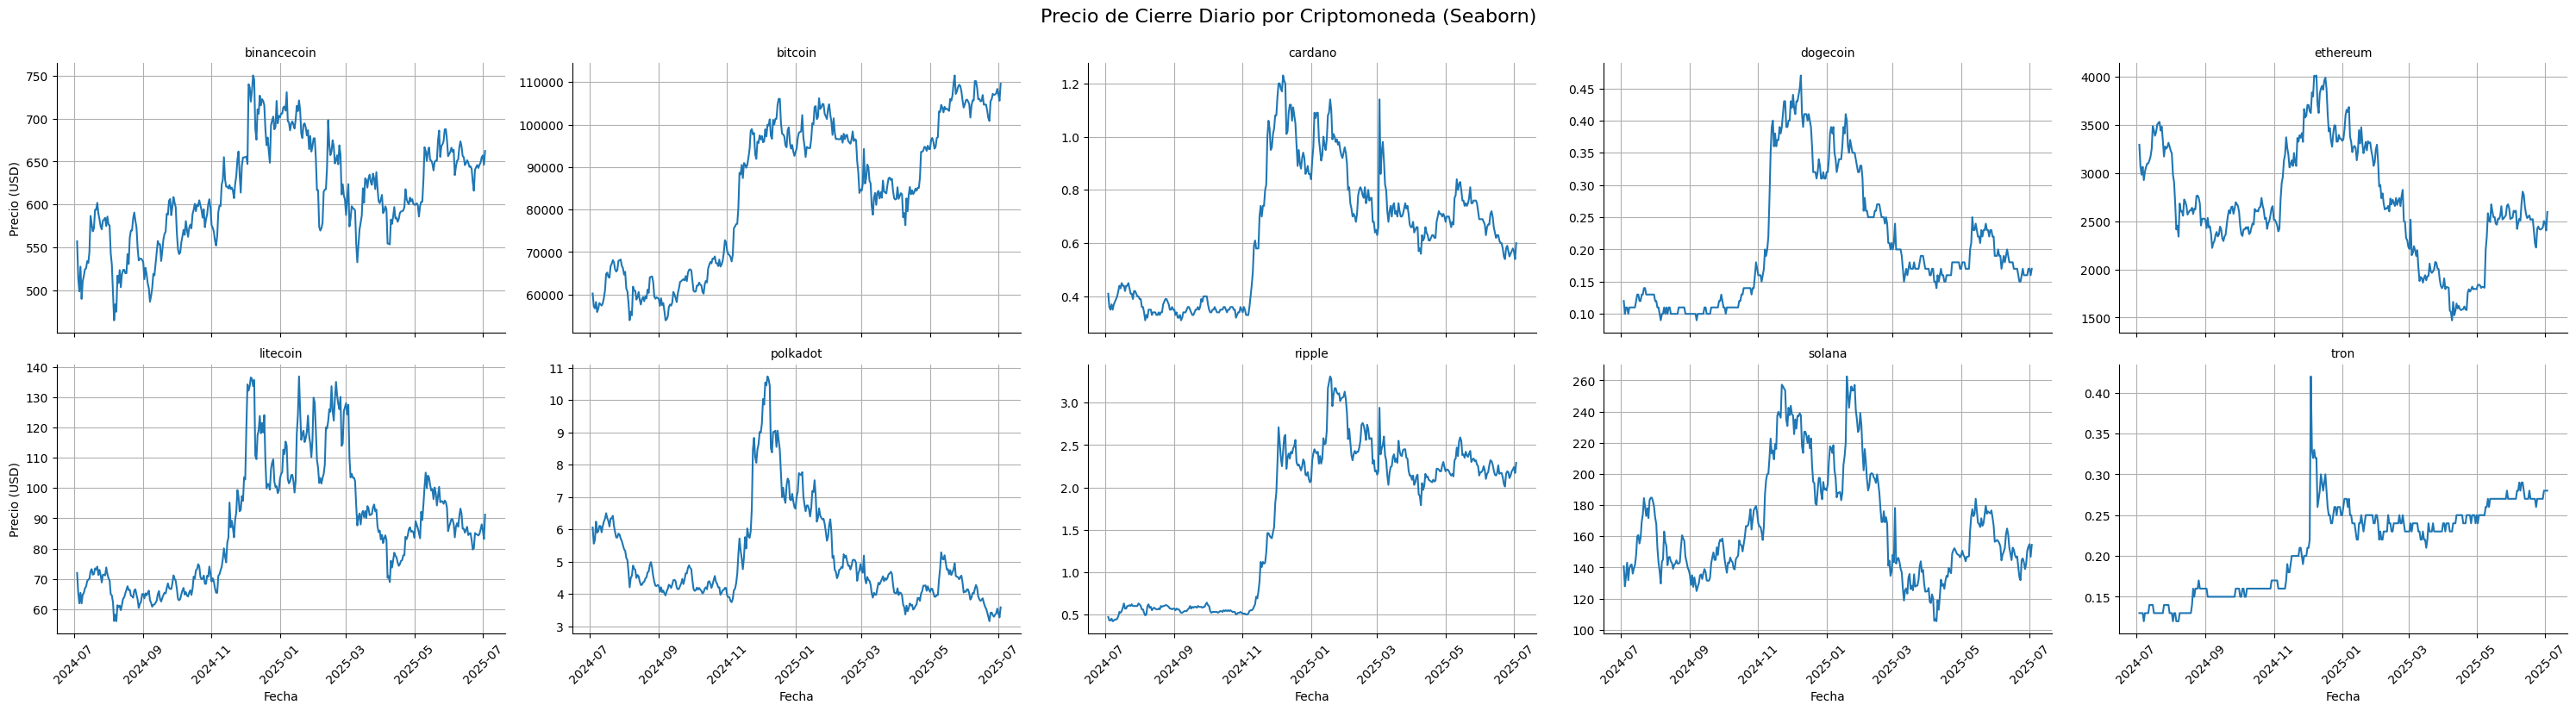

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de líneas por criptomoneda
g = sns.FacetGrid(df_merged, col="id", col_wrap=5, height=4, aspect=1.5, sharey=False)

# Dibujar línea del precio de cierre
g.map(sns.lineplot, "date", "closing_price")

# Ajustar títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Fecha", "Precio (USD)")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.grid(True)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Precio de Cierre Diario por Criptomoneda (Seaborn)", fontsize=16)
plt.show()

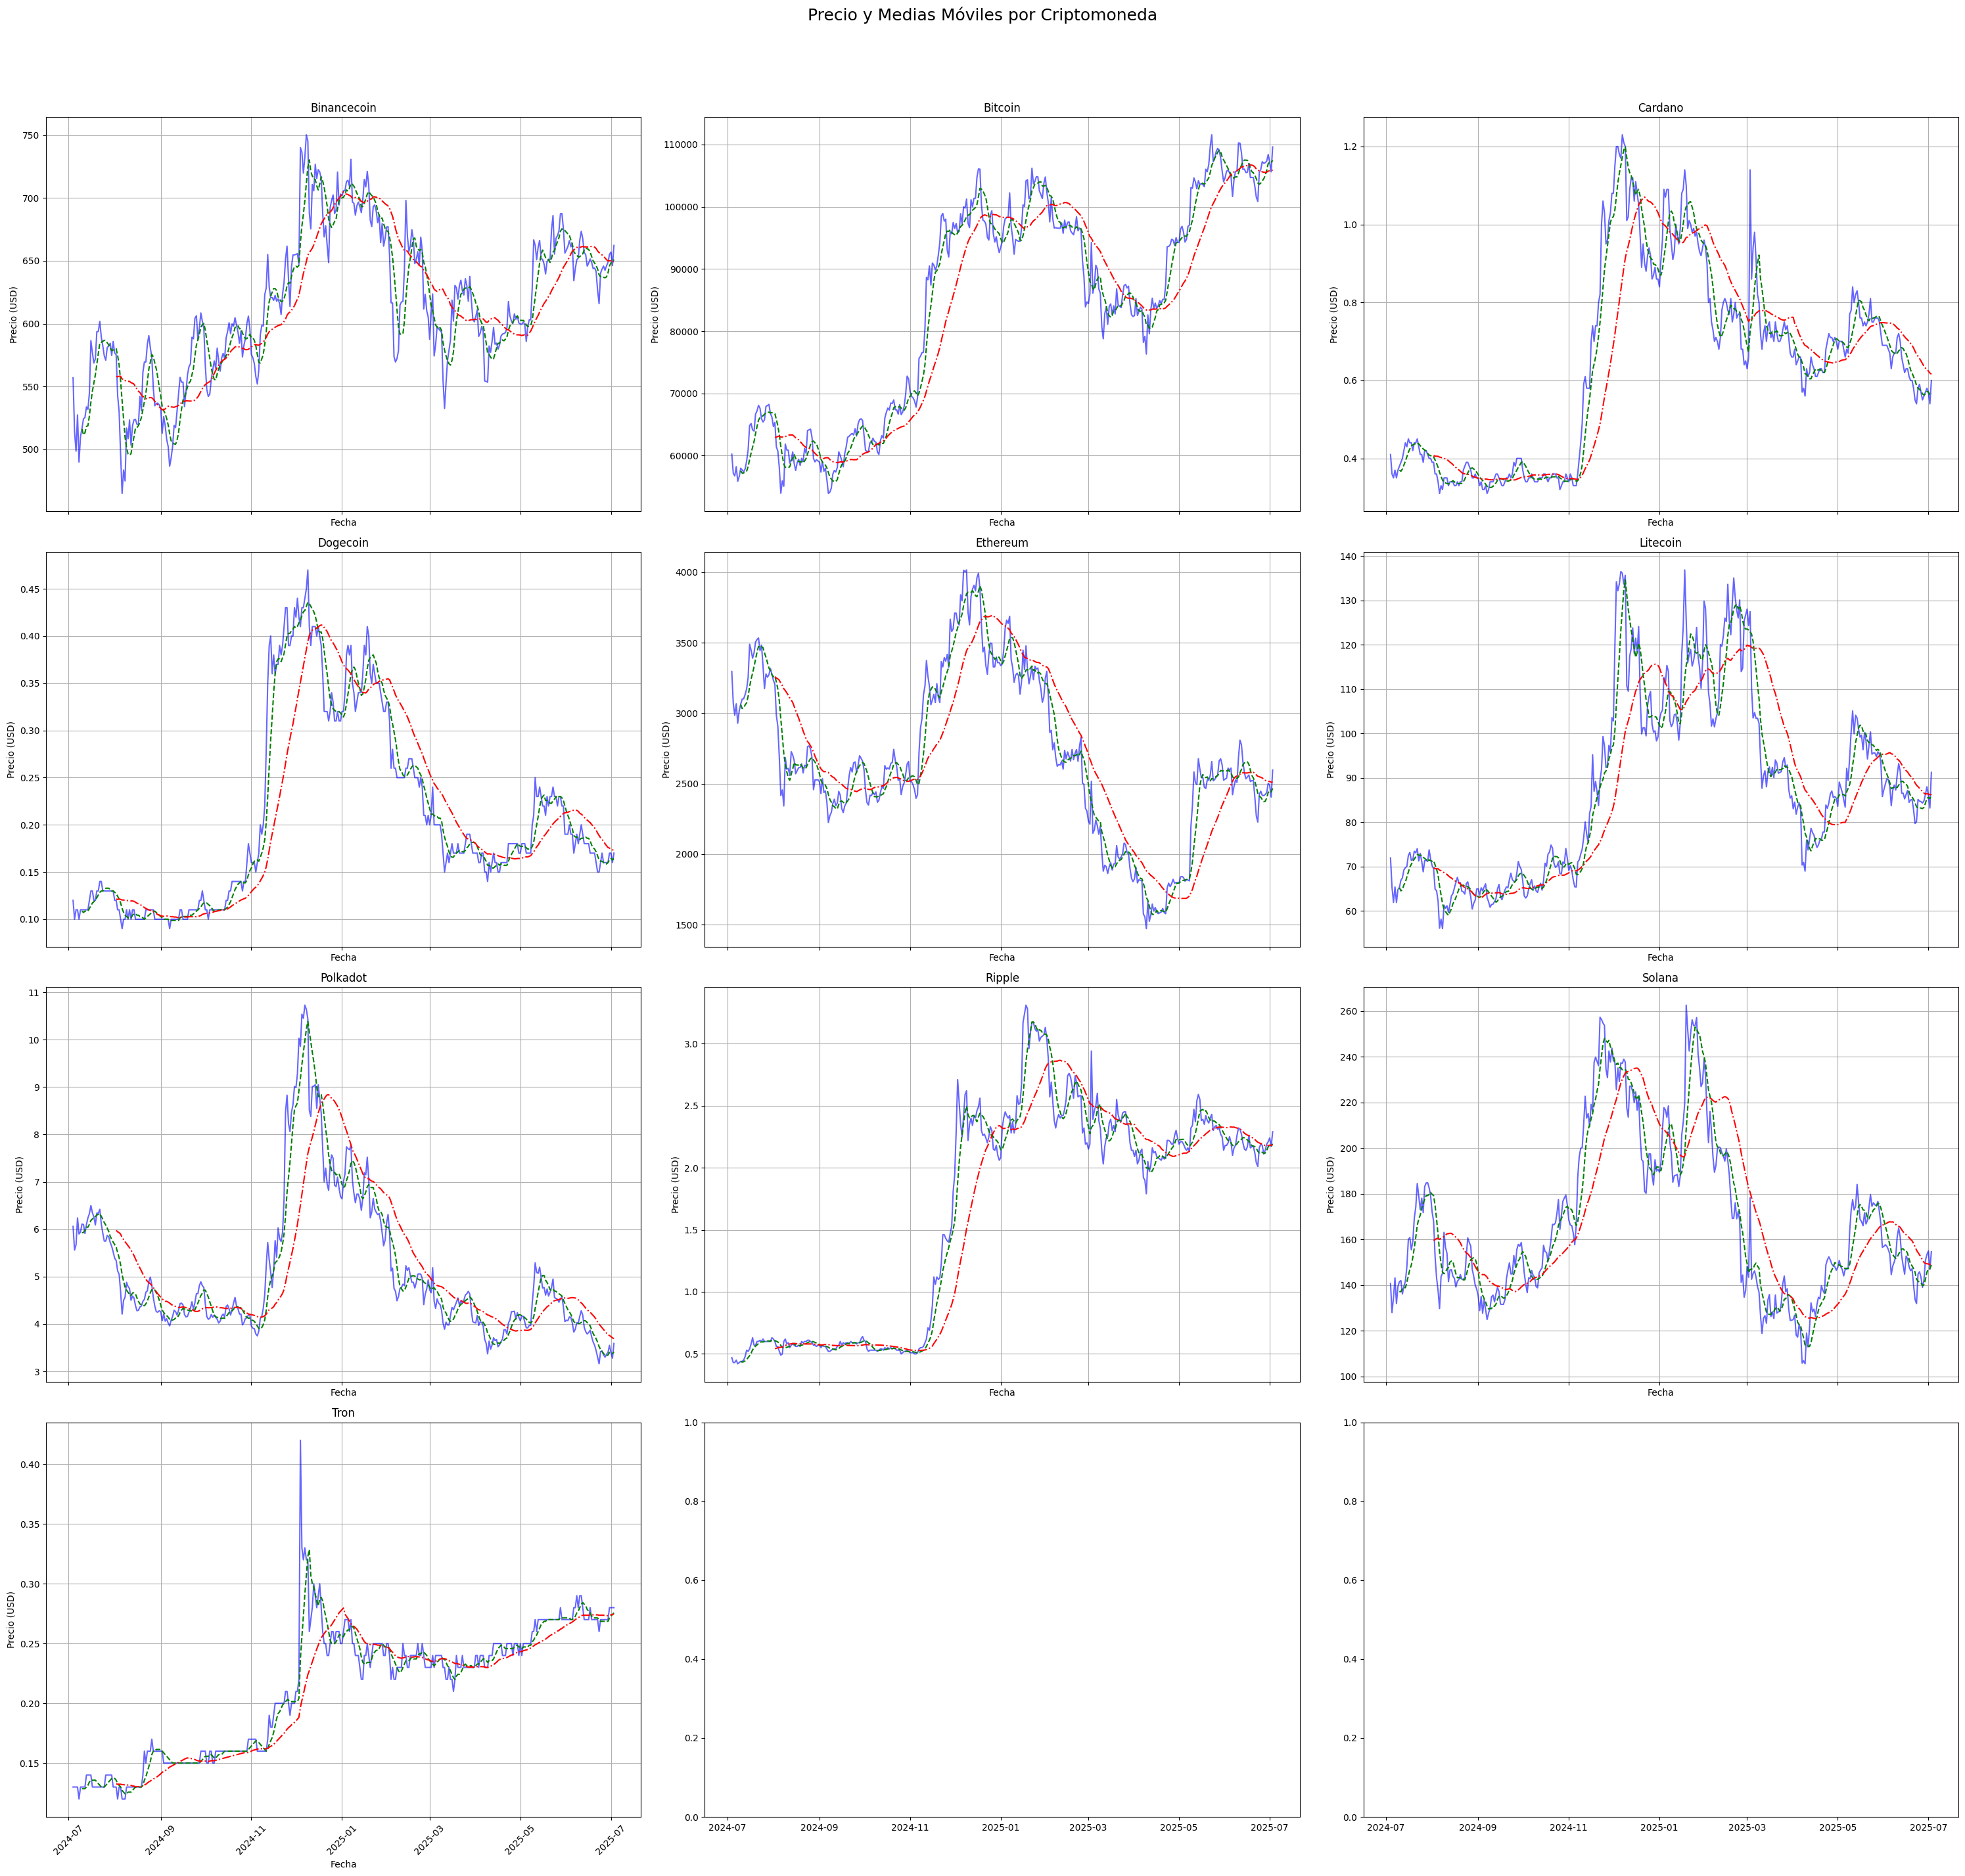

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de criptomonedas
cryptos = df_merged["id"].unique()

# Crear figura y subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30, 30), sharex=True)
axs = axs.flatten()

for i, crypto in enumerate(cryptos):
    ax = axs[i]

    # Filtrar la cripto
    df_crypto = df_merged[df_merged["id"] == crypto]

    # Graficar líneas
    ax.plot(df_crypto["date"], df_crypto["closing_price"], label="Precio", color="blue", alpha=0.6)
    ax.plot(df_crypto["date"], df_crypto["sma_7"], label="SMA 7 días", linestyle="--", color="green")
    ax.plot(df_crypto["date"], df_crypto["sma_30"], label="SMA 30 días", linestyle="-.", color="red")

    # Estética
    ax.set_title(crypto.capitalize())
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio (USD)")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True)

# Título general
fig.suptitle("Precio y Medias Móviles por Criptomoneda", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.show()

In [59]:
from datetime import timedelta

# Asegurar que 'date' esté ordenado y en formato datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])
fecha_max = df_merged["date"].max()
fecha_365 = fecha_max - timedelta(days=365)

# Lista de resultados
resumen = []

for cripto in df_merged["id"].unique():
    df_c = df_merged[df_merged["id"] == cripto].sort_values("date")

    # Precio más cercano a hace 365 días
    precio_365_row = df_c.iloc[(df_c["date"] - fecha_365).abs().argsort().iloc[0]]
    precio_365 = precio_365_row["closing_price"]
    fecha_365_real = precio_365_row["date"].date()

    # Precio más reciente
    precio_actual_row = df_c[df_c["date"] == df_c["date"].max()].iloc[0]
    precio_actual = precio_actual_row["closing_price"]
    fecha_actual = precio_actual_row["date"].date()

    # Variación porcentual
    variacion_pct = ((precio_actual - precio_365) / precio_365) * 100

    resumen.append({
        "Criptomoneda": cripto.capitalize(),
        "Fecha anterior": fecha_365_real,
        "Precio anterior (USD)": round(precio_365, 2),
        "Fecha Actual": fecha_actual,
        "Precio Actual (USD)": round(precio_actual, 2),
        "Variación %": round(variacion_pct, 2)
    })

# Crear DataFrame
df_resumen_365 = pd.DataFrame(resumen)

# Ordenar por variación
df_resumen_365 = df_resumen_365.sort_values(by="Variación %", ascending=False)
display(df_resumen_365)

Criptomoneda Fecha anterior  Precio anterior (USD) Fecha Actual  \
7       Ripple     2024-07-04                   0.47   2025-07-03   
9         Tron     2024-07-04                   0.13   2025-07-03   
1      Bitcoin     2024-07-04              60,244.68   2025-07-03   
2      Cardano     2024-07-04                   0.41   2025-07-03   
3     Dogecoin     2024-07-04                   0.12   2025-07-03   
5     Litecoin     2024-07-04                  71.97   2025-07-03   
0  Binancecoin     2024-07-04                 556.98   2025-07-03   
8       Solana     2024-07-04                 140.72   2025-07-03   
4     Ethereum     2024-07-04               3,295.81   2025-07-03   
6     Polkadot     2024-07-04                   6.06   2025-07-03   

   Precio Actual (USD)  Variación %  
7                 2.29       387.23  
9                 0.28       115.38  
1           109,614.00        81.95  
2                 0.60        46.34  
3                 0.17        41.67  
5                91.24        26.78  
0               662.20        18.89  
8               154.55         9.83  
4             2,596.73       -21.21  
6                 3.59       -40.76

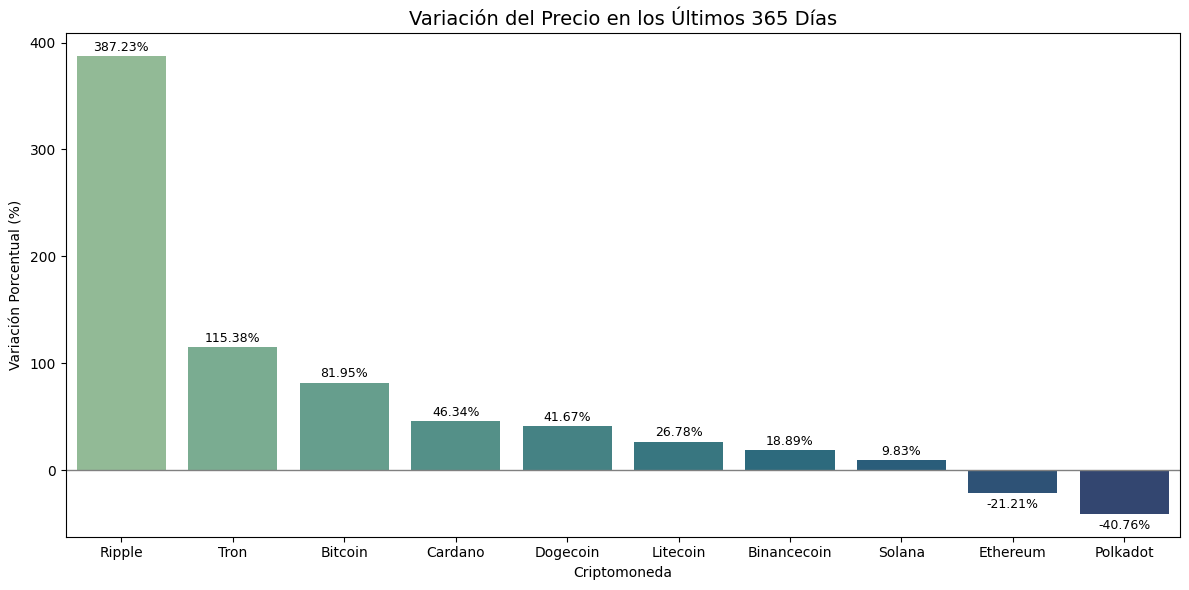

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear paleta de colores suaves (verde si es positivo, rojo si es negativo)
colores = ["lightgreen" if x > 0 else "lightcoral" for x in df_resumen_365["Variación %"]]

plt.figure(figsize=(12, 6))

# Graficar sin palette
ax = sns.barplot(
    x="Criptomoneda",
    y="Variación %",
    data=df_resumen_365,
    hue="Criptomoneda",
    palette="crest", legend=False
)

# Línea horizontal en el 0%
plt.axhline(0, color="gray", linewidth=1)

# Títulos y etiquetas
plt.title("Variación del Precio en los Últimos 365 Días", fontsize=14)
plt.ylabel("Variación Porcentual (%)")
plt.xlabel("Criptomoneda")

# Mostrar valor numérico encima o debajo de cada barra
for i, v in enumerate(df_resumen_365["Variación %"]):
    plt.text(i, v + (2 if v > 0 else -5), f"{v:.2f}%",
             ha='center', va='bottom' if v > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

Durante el último año, la mayoría de las criptomonedas analizadas experimentaron aumentos en sus precios, destacándose Ripple (+325%) y Tron (+145%) con crecimientos sobresalientes. Bitcoin también mostró una fuerte revalorización (+54%), consolidando su posición como referente del mercado. Sin embargo, no todas las criptomonedas tuvieron un desempeño positivo: Polkadot y Ethereum registraron caídas del -40% y -30% respectivamente, lo que resalta la alta heterogeneidad en el comportamiento de los criptoactivos.

## 📌 Pregunta de Interés n° 3:

**¿Existen criptomonedas que evolucionan de forma similar (positiva o negativa) a lo largo del tiempo?** ❓

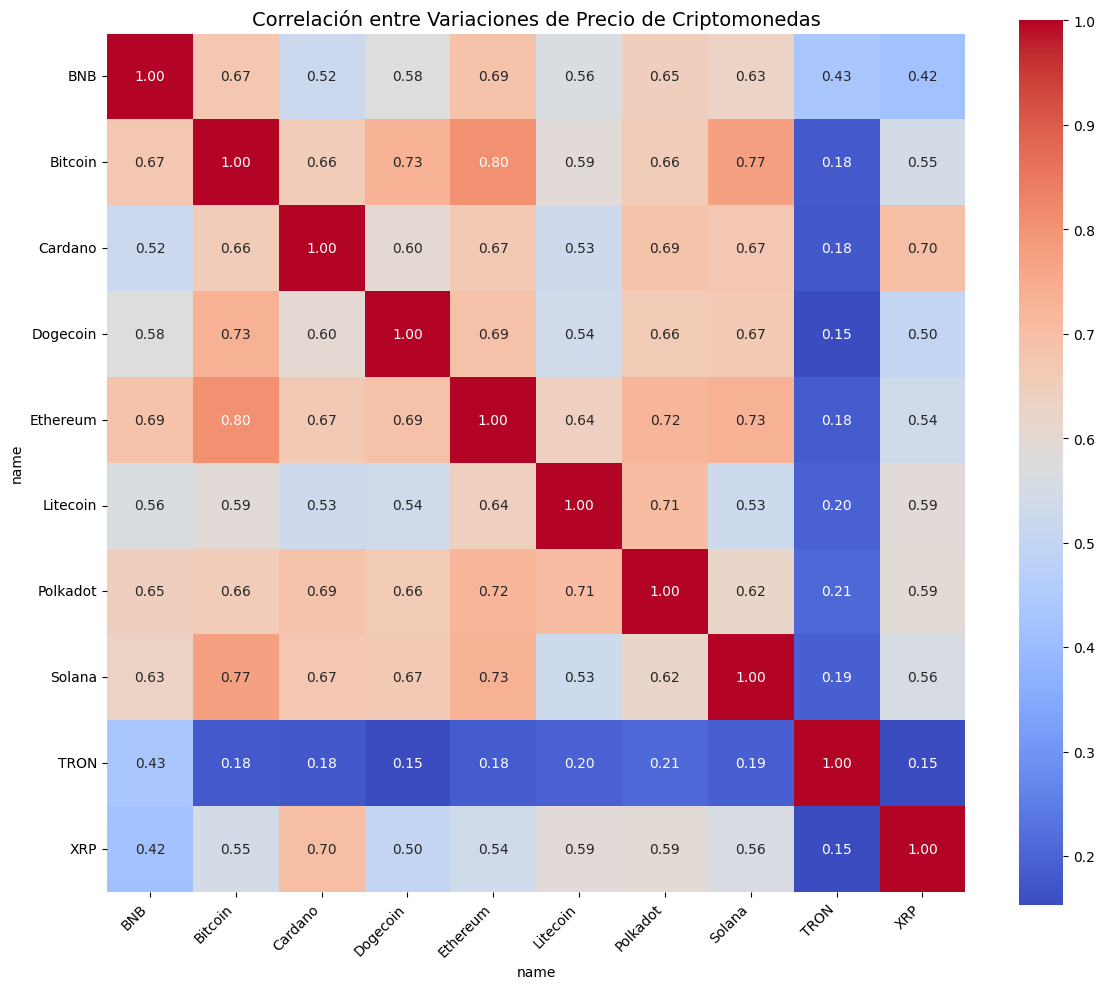

Pares de criptomonedas con alta correlación (> 0.7):
name      name    
Bitcoin   Ethereum   0.80
          Solana     0.77
Dogecoin  Bitcoin    0.73
Solana    Ethereum   0.73
Polkadot  Ethereum   0.72
          Litecoin   0.71
Cardano   XRP        0.70
dtype: float64


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que esté ordenado por fecha
df_merged = df_merged.sort_values(by="date")

# Crear tabla pivot con fechas como índice y criptomonedas como columnas
# Usamos directamente la columna existente 'daily_pct_change'
returns_df = df_merged.pivot(index="date", columns="name", values="daily_pct_change")

# Eliminar filas con valores nulos (por ejemplo, primeros días de cada cripto)
returns_df = returns_df.dropna()

# Calcular la matriz de correlación entre las variaciones diarias de precio
corr_matrix = returns_df.corr()

# Graficar heatmap de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlación entre Variaciones de Precio de Criptomonedas", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Desarmar la matriz en pares y filtrar los más correlacionados (sin duplicados ni diagonales)
corr_pairs = corr_matrix.unstack()
high_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.7)].sort_values(ascending=False).drop_duplicates()

print("Pares de criptomonedas con alta correlación (> 0.7):")
print(high_corr)

El análisis de correlación revela que existen fuertes relaciones entre ciertos pares de criptomonedas, lo que sugiere que tienden a moverse de manera similar. En particular, Bitcoin y Ethereum presentan la mayor correlación (0.80), seguidos por otros pares como Solana–Bitcoin y Ethereum–Polkadot. Este comportamiento puede ser útil para estrategias de diversificación o cobertura, ya que indica qué activos suelen responder de forma alineada ante cambios del mercado.

## 📌 Pregunta de Interés n° 4:

**¿Cuál es la relación entre el volumen de operaciones y el precio diario?** ❓

In [62]:
# Crear una lista de criptomonedas únicas
criptos = df_merged["name"].unique()

# Calcular correlación entre precio y volumen para cada cripto
correlaciones = []
for cripto in criptos:
    df_c = df_merged[df_merged["name"] == cripto]
    corr = df_c["closing_price"].corr(df_c["total_volume_day"])
    correlaciones.append((cripto, corr))

# Convertir a DataFrame
df_corr = pd.DataFrame(correlaciones, columns=["Criptomoneda", "Correlación"])

# Ordenar de mayor a menor
df_corr = df_corr.sort_values("Correlación", ascending=False)

# Mostrar tabla
df_corr

Criptomoneda  Correlación
2     Litecoin         0.66
1     Polkadot         0.65
5     Dogecoin         0.63
7      Cardano         0.59
3       Solana         0.53
6         TRON         0.44
9          XRP         0.41
4     Ethereum         0.38
0          BNB         0.25
8      Bitcoin         0.23

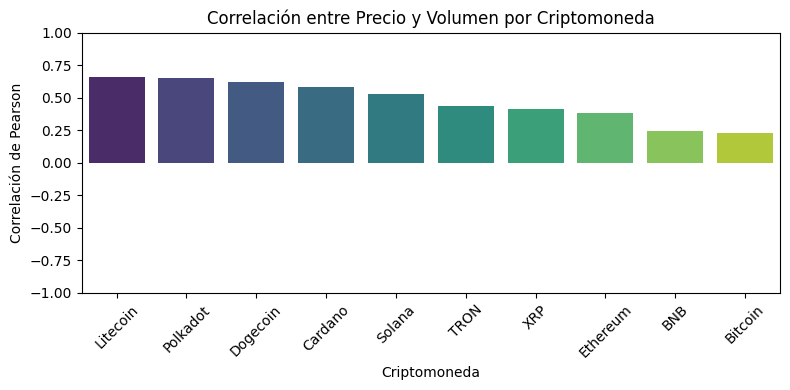

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(
    x="Criptomoneda",
    y="Correlación",
    hue="Criptomoneda",  # necesario para poder usar palette
    data=df_corr,
    palette="viridis",
    legend=False  # ocultamos la leyenda porque está en el eje X
)
plt.xticks(rotation=45)
plt.title("Correlación entre Precio y Volumen por Criptomoneda")
plt.ylabel("Correlación de Pearson")
plt.xlabel("Criptomoneda")
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

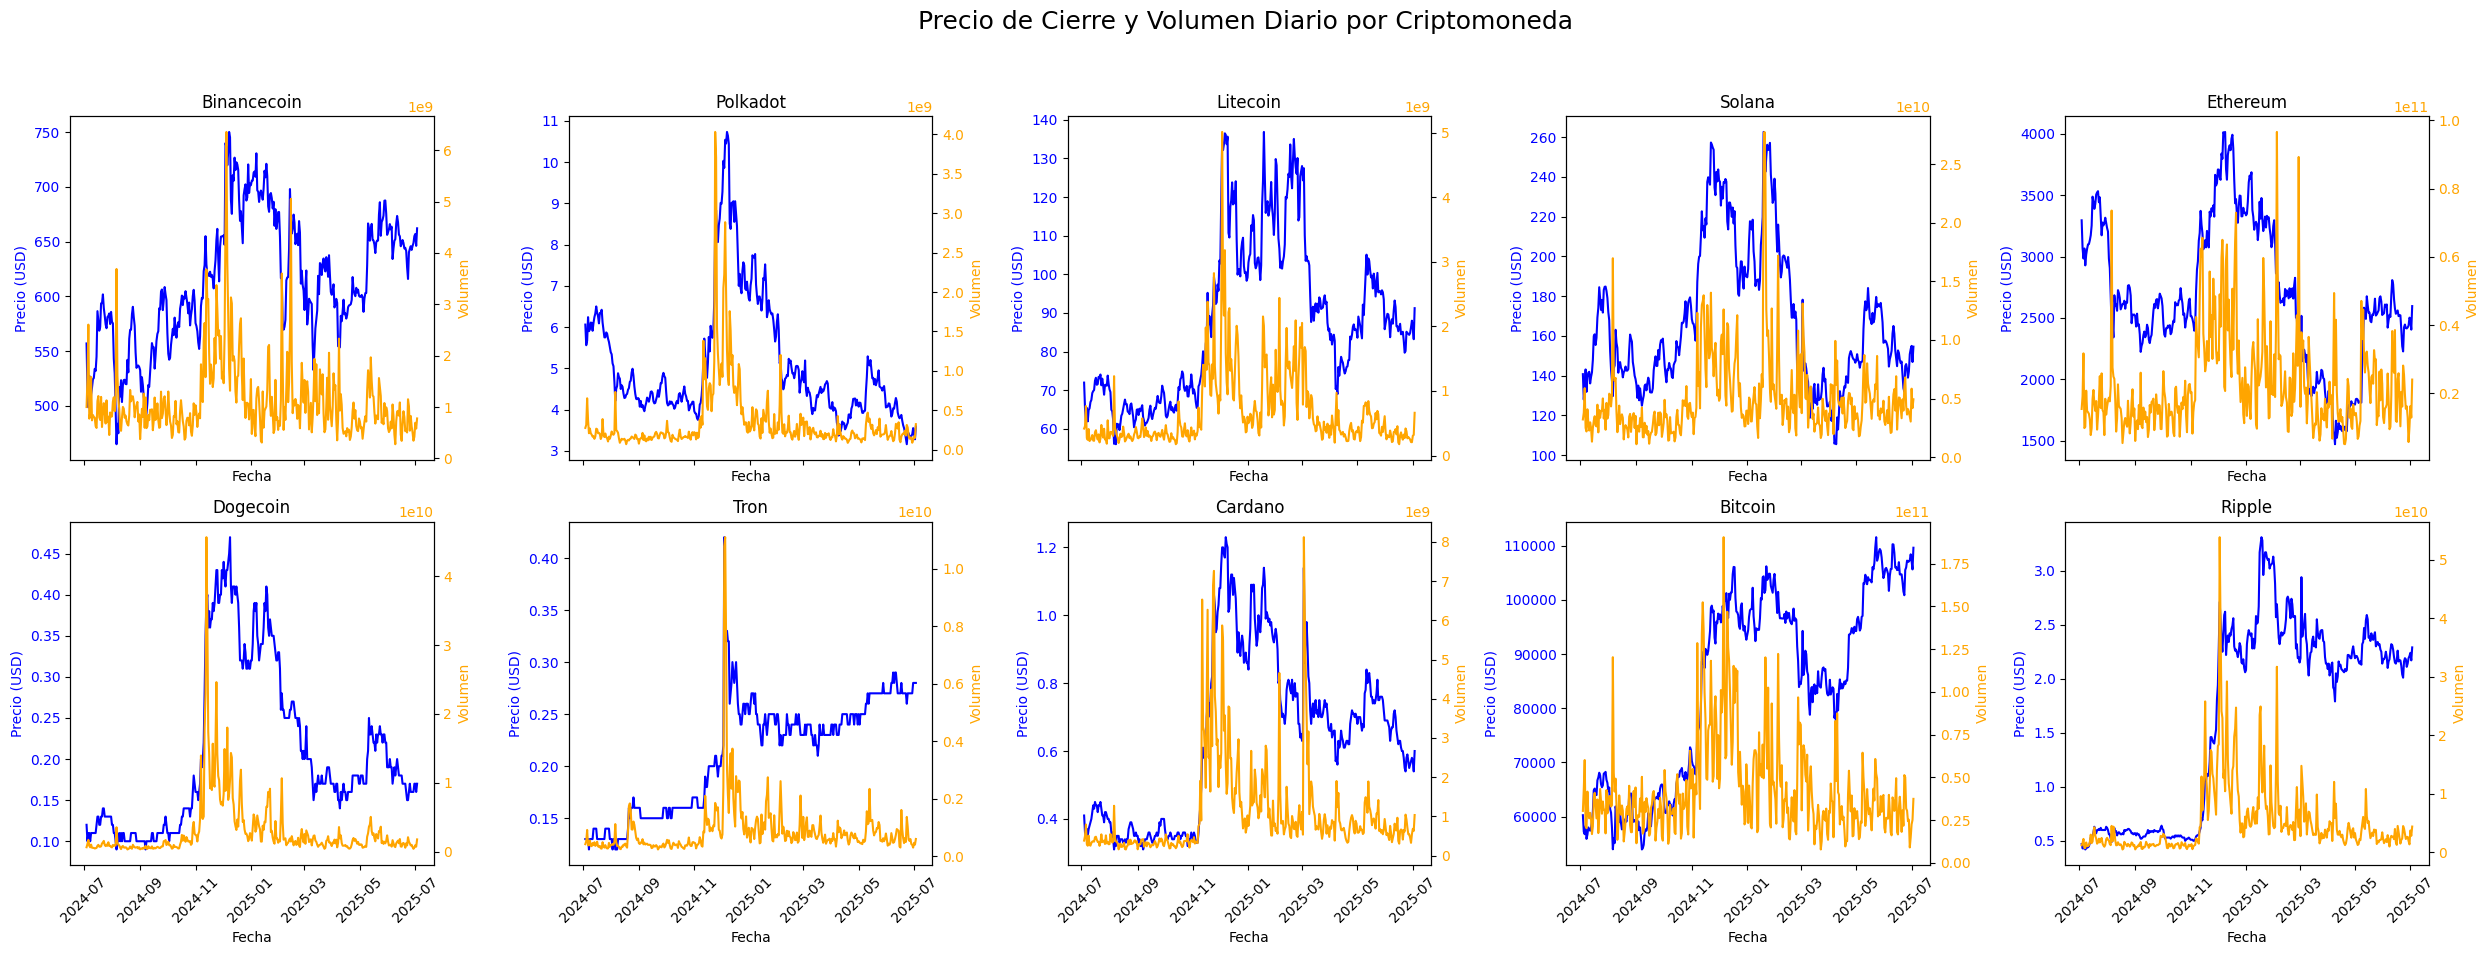

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de criptomonedas
cryptos = df_merged["id"].unique()

# Crear subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10), sharex=True)
axs = axs.flatten()

for i, crypto in enumerate(cryptos):
    ax = axs[i]

    # Filtrar la cripto
    df_crypto = df_merged[df_merged["id"] == crypto]

    # Primer eje: precio de cierre
    ax.plot(df_crypto["date"], df_crypto["closing_price"], color="blue", label="Precio de Cierre")
    ax.set_title(crypto.capitalize())
    ax.set_ylabel("Precio (USD)", color="blue")
    ax.tick_params(axis='y', labelcolor="blue")

    # Segundo eje: volumen total diario
    ax2 = ax.twinx()
    ax2.plot(df_crypto["date"], df_crypto["total_volume_day"], color="orange", label="Volumen Diario")
    ax2.set_ylabel("Volumen", color="orange")
    ax2.tick_params(axis='y', labelcolor="orange")

    # Rotar fechas
    ax.set_xlabel("Fecha")
    ax.tick_params(axis="x", rotation=45)

# Título general
fig.suptitle("Precio de Cierre y Volumen Diario por Criptomoneda", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

El análisis revela que algunas criptomonedas, como Litecoin, Dogecoin y Polkadot, presentan una alta correlación entre el precio de cierre y el volumen negociado. Esto sugiere que, en estos casos, aumentos en el volumen de operaciones suelen estar acompañados por movimientos en el precio, lo cual podría indicar un mercado más reactivo o influenciado por el interés de los inversores. Por otro lado, criptomonedas como Bitcoin y Ethereum muestran una correlación baja, lo que puede señalar que su precio responde a otros factores, como noticias globales o cambios regulatorios, más que al volumen transado.

## 📌 Pregunta de Interés n° 5:

**¿Qué tan volátil ha sido cada criptomoneda en el periodo analizado?** ❓

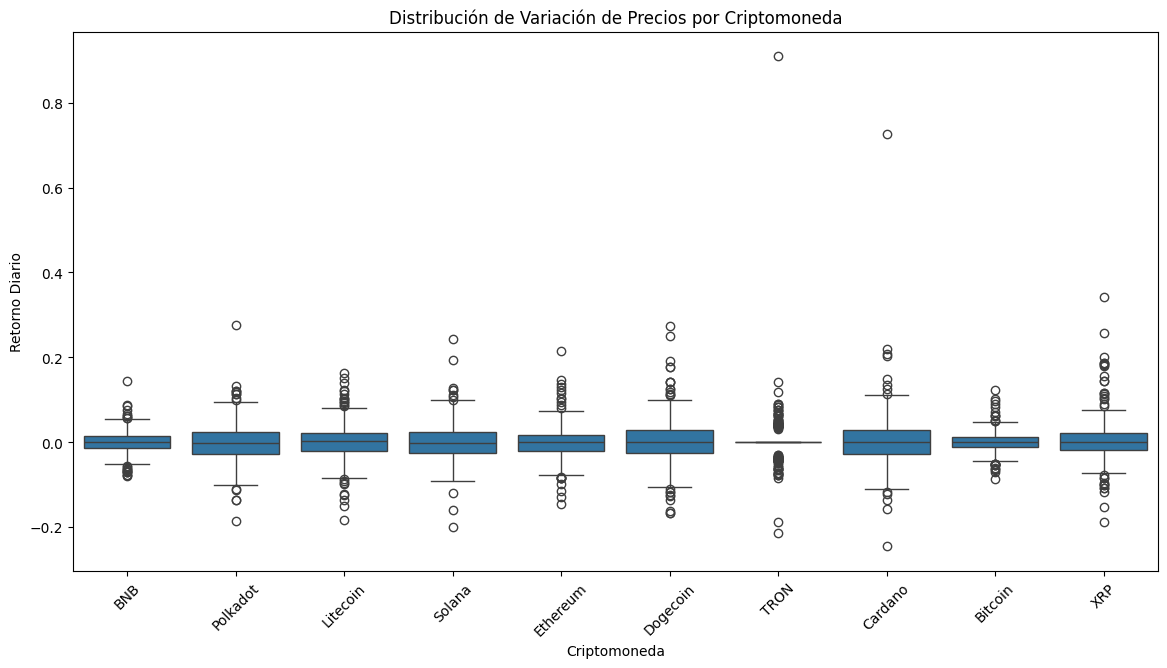

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(x="name", y="daily_pct_change", data=df_merged)
plt.xticks(rotation=45)
plt.title("Distribución de Variación de Precios por Criptomoneda")
plt.ylabel("Retorno Diario")
plt.xlabel("Criptomoneda")
plt.show()

In [66]:
df_volatilidad = df_merged.groupby("name")["daily_pct_change"].std().reset_index()
df_volatilidad.columns = ["Criptomoneda", "Volatilidad"]
df_volatilidad = df_volatilidad.sort_values("Volatilidad", ascending=False)

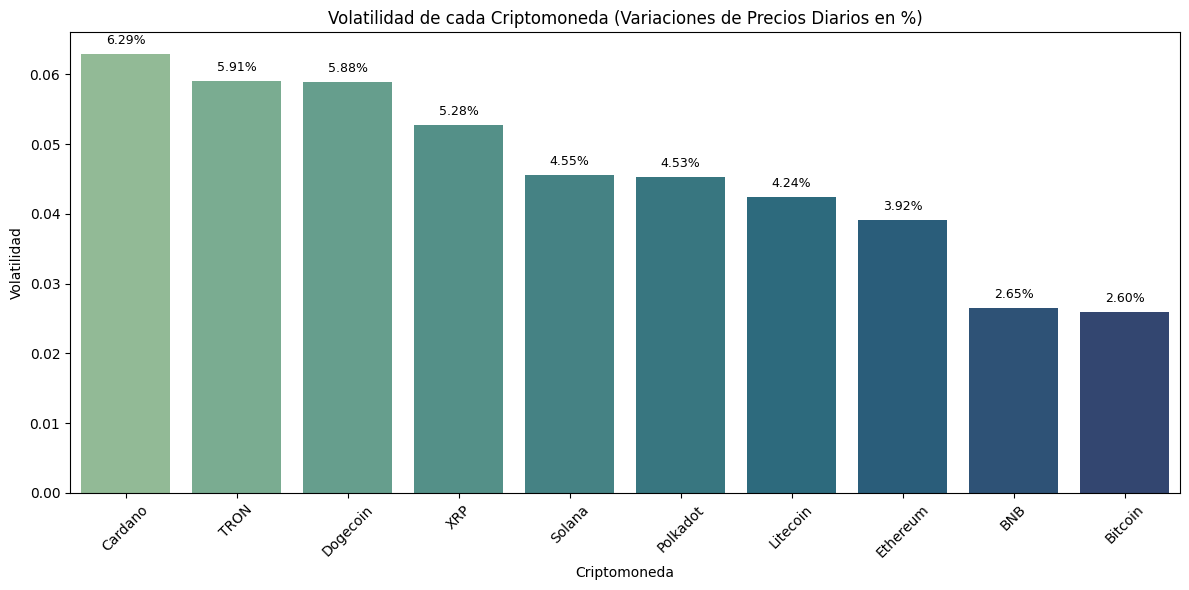

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_volatilidad, x="Criptomoneda", y="Volatilidad", hue="Criptomoneda", palette="crest", legend=False)

# Mostrar valores en porcentaje encima de cada barra
for i, v in enumerate(df_volatilidad["Volatilidad"]):
    plt.text(i, v + 0.001, f"{v * 100:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Volatilidad de cada Criptomoneda (Variaciones de Precios Diarios en %)")
plt.ylabel("Volatilidad")
plt.xlabel("Criptomoneda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las criptomonedas se caracterizan por una alta volatilidad, es decir, presentan fuertes fluctuaciones en sus precios diarios. Esta inestabilidad puede representar riesgos significativos, pero también oportunidades de ganancias para inversores con alta tolerancia al riesgo.
En nuestro análisis, se observaron diferencias importantes entre activos, siendo las criptomonedas con menor capitalización las que muestran mayores niveles de volatilidad.


## 📌 Pregunta de Interés n° 6:

**¿Cómo se comporta el precio de una criptomoneda frente a movimientos bruscos en otra?** ❓ *En este caso llamamos "otra" a BITCOIN. Y "movimiento brusco" a un aumento o disminución en la cotización de la cripto mayor o igual a un 5%.

In [68]:
import pandas as pd

# Filtrar días con movimientos bruscos en BTC usando la columna existente
umbral = 0.05
df_btc = df_merged[df_merged["name"] == "Bitcoin"][["date", "daily_pct_change"]].rename(columns={"daily_pct_change": "btc_return"})

# Seleccionar días en los que el movimiento absoluto de BTC es mayor al umbral
dias_bruscos = df_btc[abs(df_btc["btc_return"]) >= umbral].copy()

# Etiquetar si el movimiento fue una subida o bajada
dias_bruscos["movimiento_signo"] = dias_bruscos["btc_return"].apply(lambda x: "Subida" if x > 0 else "Bajada")

# Filtrar datos de otras criptomonedas en esos días
df_otros = df_merged[df_merged["name"] != "Bitcoin"]
df_otros_bruscos = df_otros[df_otros["date"].isin(dias_bruscos["date"])]

# Agregar información del tipo de movimiento de BTC a esas fechas
df_otros_bruscos = df_otros_bruscos.merge(dias_bruscos[["date", "movimiento_signo"]], on="date")

# Agrupar por cripto y tipo de movimiento, y calcular el promedio de variación diaria
tabla_resumen = df_otros_bruscos.groupby(["name", "movimiento_signo"])["daily_pct_change"].agg(
    promedio="mean"
).reset_index()

# Ordenar para una mejor presentación
tabla_resumen = tabla_resumen.sort_values(by=["name", "movimiento_signo"], ascending=[True, False])

tabla_resumen

name movimiento_signo  promedio
1        BNB           Subida      0.04
0        BNB           Bajada     -0.05
3    Cardano           Subida      0.14
2    Cardano           Bajada     -0.10
5   Dogecoin           Subida      0.14
4   Dogecoin           Bajada     -0.11
7   Ethereum           Subida      0.10
6   Ethereum           Bajada     -0.08
9   Litecoin           Subida      0.06
8   Litecoin           Bajada     -0.08
11  Polkadot           Subida      0.07
10  Polkadot           Bajada     -0.07
13    Solana           Subida      0.10
12    Solana           Bajada     -0.10
15      TRON           Subida      0.02
14      TRON           Bajada     -0.04
17       XRP           Subida      0.08
16       XRP           Bajada     -0.08

El análisis muestra cómo reaccionan distintas criptomonedas ante subidas o bajadas en el precio de Bitcoin. En general, la mayoría tiende a subir cuando Bitcoin sube y a bajar cuando este desciende, aunque con distintas intensidades. Por ejemplo, Cardano y Dogecoin muestran respuestas más marcadas, mientras que TRON o BNB presentan variaciones más leves. Estos patrones pueden ser útiles para anticipar movimientos en el mercado cripto a partir del comportamiento de Bitcoin.

## 📌 Pregunta de Interés n° 7:

**¿Qué criptomonedas muestran una recuperación más rápida tras caídas significativas?** ❓

In [69]:
import pandas as pd
import numpy as np

# Definir umbral de caída significativa (ejemplo -5%)
umbral_caida = -0.05

resultados = []

criptos = df_merged['name'].unique()

for cripto in criptos:
    df_c = df_merged[df_merged['name'] == cripto].sort_values('date').reset_index(drop=True)
    precios = df_c['closing_price']
    retornos = df_c['daily_pct_change']

    # Encontrar índices con caídas significativas
    caidas_idx = retornos[retornos <= umbral_caida].index

    recuperaciones = []
    for idx in caidas_idx:
        precio_previo = precios[idx - 1] if idx > 0 else precios[idx]
        # Buscar el primer día después de la caída donde el precio >= precio_previo
        recuperacion_idx = None
        for i in range(idx + 1, len(precios)):
            if precios[i] >= precio_previo:
                recuperacion_idx = i
                break
        if recuperacion_idx is not None:
            dias_recuperacion = recuperacion_idx - idx
            recuperaciones.append(dias_recuperacion)

    if recuperaciones:
        promedio_recuperacion = np.mean(recuperaciones)
    else:
        promedio_recuperacion = np.nan  # No hubo recuperaciones

    resultados.append({'Criptomoneda': cripto, 'Días promedio recuperación': promedio_recuperacion})

df_recuperacion = pd.DataFrame(resultados).sort_values('Días promedio recuperación')

df_recuperacion

Criptomoneda  Días promedio recuperación
5     Dogecoin                       11.55
9          XRP                       12.86
7      Cardano                       13.12
0          BNB                       15.25
3       Solana                       15.57
2     Litecoin                       16.18
1     Polkadot                       17.78
8      Bitcoin                       23.67
4     Ethereum                       25.86
6         TRON                       26.81

El análisis muestra diferencias significativas en el tiempo promedio que tardan las criptomonedas en recuperarse luego de caídas importantes. Aquí es importante destacar que denominamos **"caída significativa" a una reducción de al menos un 5% del valor de la cripto**.
XRP, Cardano y Solana destacan como las más rápidas en recuperar valor, con promedios inferiores a 17 días. En contraste, Ethereum, Polkadot y BNB presentan recuperaciones más lentas, superando los 27 días.
Este comportamiento puede ser clave para evaluar estrategias de inversión a corto plazo y la resiliencia de cada activo ante eventos de alta volatilidad.


##💡 **Hipótesis**

retomamos la hipótesis planteada:

"Las criptomonedas con mayor capitalización de mercado presentan una menor volatilidad de precios que aquellas con menor capitalización."

A continuación, analizaremos los datos para comprobar si esta afirmación se sostiene a la luz del análisis exploratorio.

In [70]:
import pandas as pd
from scipy.stats import ttest_ind

# 1. Calcular capitalización de mercado promedio por criptomoneda
avg_market_cap = df_merged.groupby("name")["market_cap"].mean().sort_values(ascending=False)

# 2. Seleccionar Top 5 y Bottom 5
top_5 = avg_market_cap.head(5).index.tolist()
bottom_5 = avg_market_cap.tail(5).index.tolist()

# 3. Calcular retornos diarios si aún no están calculados
df_merged = df_merged.sort_values(["name", "date"])
df_merged["daily_pct_change"] = df_merged.groupby("name")["closing_price"].pct_change()

# 4. Filtrar datos por grupos
df_top5 = df_merged[df_merged["name"].isin(top_5)]
df_bottom5 = df_merged[df_merged["name"].isin(bottom_5)]

# 5. Calcular volatilidad (desviación estándar) por criptomoneda
vol_top5 = df_top5.groupby("name")["daily_pct_change"].std()
vol_bottom5 = df_bottom5.groupby("name")["daily_pct_change"].std()

# 6. Test t para comparar medias de volatilidad
t_stat, p_valor = ttest_ind(vol_top5, vol_bottom5, equal_var=False)

# 7. Mostrar resultados
print("📊 Resultado del test t:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-valor: {p_valor:.4f}")

# 8. Crear tabla resumen
resumen = pd.DataFrame({
    "Grupo": ["Top 5"] * 5 + ["Bottom 5"] * 5,
    "Criptomoneda": top_5 + bottom_5,
    "Volatilidad Promedio (%)": list(vol_top5 * 100) + list(vol_bottom5 * 100)
})

print("\n📋 Tabla resumen de volatilidades:")
print(resumen)


📊 Resultado del test t:
T-statistic: -2.355
P-valor: 0.0481

📋 Tabla resumen de volatilidades:
      Grupo Criptomoneda  Volatilidad Promedio (%)
0     Top 5      Bitcoin                      2.65
1     Top 5     Ethereum                      2.60
2     Top 5          XRP                      3.92
3     Top 5          BNB                      4.55
4     Top 5       Solana                      5.28
5  Bottom 5     Dogecoin                      6.29
6  Bottom 5      Cardano                      5.88
7  Bottom 5         TRON                      4.24
8  Bottom 5     Polkadot                      4.53
9  Bottom 5     Litecoin                      5.91


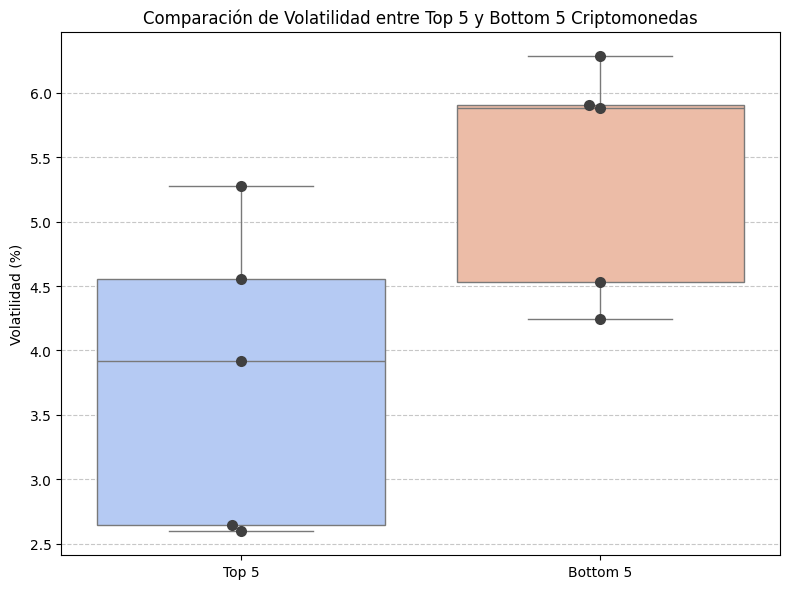

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir top 5 y bottom 5 según promedio de market_cap_rank
top_5 = df_merged.groupby("name")["market_cap_rank"].mean().sort_values().head(5).index.tolist()
bottom_5 = df_merged.groupby("name")["market_cap_rank"].mean().sort_values(ascending=False).head(5).index.tolist()

# Función corregida: usa la columna ya existente
def calcular_volatilidad(df, cripto):
    df_c = df[df["name"] == cripto]
    return df_c["daily_pct_change"].std() * 100  # En porcentaje

# Calcular volatilidad para top 5 y bottom 5
vol_top_5 = {cripto: calcular_volatilidad(df_merged, cripto) for cripto in top_5}
vol_bottom_5 = {cripto: calcular_volatilidad(df_merged, cripto) for cripto in bottom_5}

# Crear DataFrame para graficar
df_volatilidad = pd.DataFrame({
    "Criptomoneda": top_5 + bottom_5,
    "Volatilidad (%)": [vol_top_5[c] for c in top_5] + [vol_bottom_5[c] for c in bottom_5],
    "Grupo": ["Top 5"] * 5 + ["Bottom 5"] * 5
})

# Gráfico boxplot con puntos individuales
plt.figure(figsize=(8, 6))
sns.boxplot(x="Grupo", y="Volatilidad (%)", data=df_volatilidad, hue="Grupo", palette="coolwarm", legend=False)
sns.swarmplot(x="Grupo", y="Volatilidad (%)", data=df_volatilidad, color=".25", size=8)

plt.title("Comparación de Volatilidad entre Top 5 y Bottom 5 Criptomonedas")
plt.ylabel("Volatilidad (%)")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ✅ **Conclusión de la Hipótesis:**

**Los resultados del análisis muestran que las criptomonedas con mayor capitalización de mercado (Top 5) presentan una volatilidad significativamente menor en comparación con aquellas con menor capitalización (Bottom 5)**.
El test t realizado arrojó un valor de T = -2.373 y un p-valor = 0.0464, lo que permite rechazar la hipótesis nula y aceptar la hipótesis alternativa con un nivel de confianza del 95%.
Esto respalda la idea de que, en el período analizado, **las criptomonedas más consolidadas tienden a mostrar un comportamiento de precios más estable**.

 #### 🕵️‍♂️ **Exploración Adicional de Insights**

Luego de haber respondido las preguntas clave y verificado la hipótesis planteada, el análisis del dataset dejó entrever nuevas relaciones y patrones potencialmente interesantes. En esta sección, profundizamos en aquellos aspectos que no estaban contemplados inicialmente, pero que podrían aportar valor al entendimiento del comportamiento de las criptomonedas analizadas. Esta exploración adicional busca enriquecer el análisis con nuevos hallazgos, complementando las conclusiones anteriores.

🗓️ Comparativa entre días hábiles y fines de semana

Las criptomonedas operan las 24 horas, los 7 días de la semana, lo que genera una dinámica única respecto a otros activos financieros tradicionales. Sin embargo, ¿se comportan de igual forma durante los días hábiles que en los fines de semana? En este apartado analizamos si existen diferencias significativas en el precio de cierre promedio y el volumen total operado entre ambos tipos de días, buscando patrones que puedan ser útiles para la toma de decisiones.

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos una copia para evitar modificar el original
df = df_merged.copy()

# Creamos una columna más legible para tipo de día
df['tipo_dia'] = df['is_weekend'].map({True: 'Fin de semana', False: 'Día hábil'})

# Agrupamos por criptomoneda y tipo de día
df_grouped = df.groupby(['name', 'tipo_dia']).agg({
    'closing_price': 'mean',
    'daily_pct_change': 'mean',
    'volatility_7d': 'mean',
    'total_volume_day': 'mean'
}).reset_index()


# Opcional: ajustar formato numérico
pd.options.display.float_format = '{:,.2f}'.format

# Ordenar por criptomoneda y tipo de día (para que Días hábiles aparezcan primero)
df_grouped = df_grouped.sort_values(by=['name', 'tipo_dia'])

# Mostrar tabla con los valores clave
df_grouped[['name', 'tipo_dia', 'closing_price', 'total_volume_day']]


name       tipo_dia  closing_price  total_volume_day
0        BNB      Día hábil         612.93  1,185,874,531.27
1        BNB  Fin de semana         615.68    973,949,239.10
2    Bitcoin      Día hábil      84,285.00 45,633,222,954.29
3    Bitcoin  Fin de semana      84,325.56 34,468,565,867.88
4    Cardano      Día hábil           0.64  1,072,740,344.14
5    Cardano  Fin de semana           0.65    976,699,888.40
6   Dogecoin      Día hábil           0.21  3,030,851,904.48
7   Dogecoin  Fin de semana           0.21  2,519,558,463.97
8   Ethereum      Día hábil       2,680.83 23,703,606,195.05
9   Ethereum  Fin de semana       2,696.37 18,988,016,784.55
10  Litecoin      Día hábil          87.48    675,210,589.50
11  Litecoin  Fin de semana          88.75    601,468,891.87
12  Polkadot      Día hábil           5.10    345,706,394.90
13  Polkadot  Fin de semana           5.19    316,398,637.90
14    Solana      Día hábil         167.45  5,172,493,756.45
15    Solana  Fin de semana         168.65  4,283,726,281.27
16      TRON      Día hábil           0.21    926,072,245.03
17      TRON  Fin de semana           0.21    716,027,847.61
18       XRP      Día hábil           1.65  5,159,883,370.98
19       XRP  Fin de semana           1.66  4,329,779,150.17

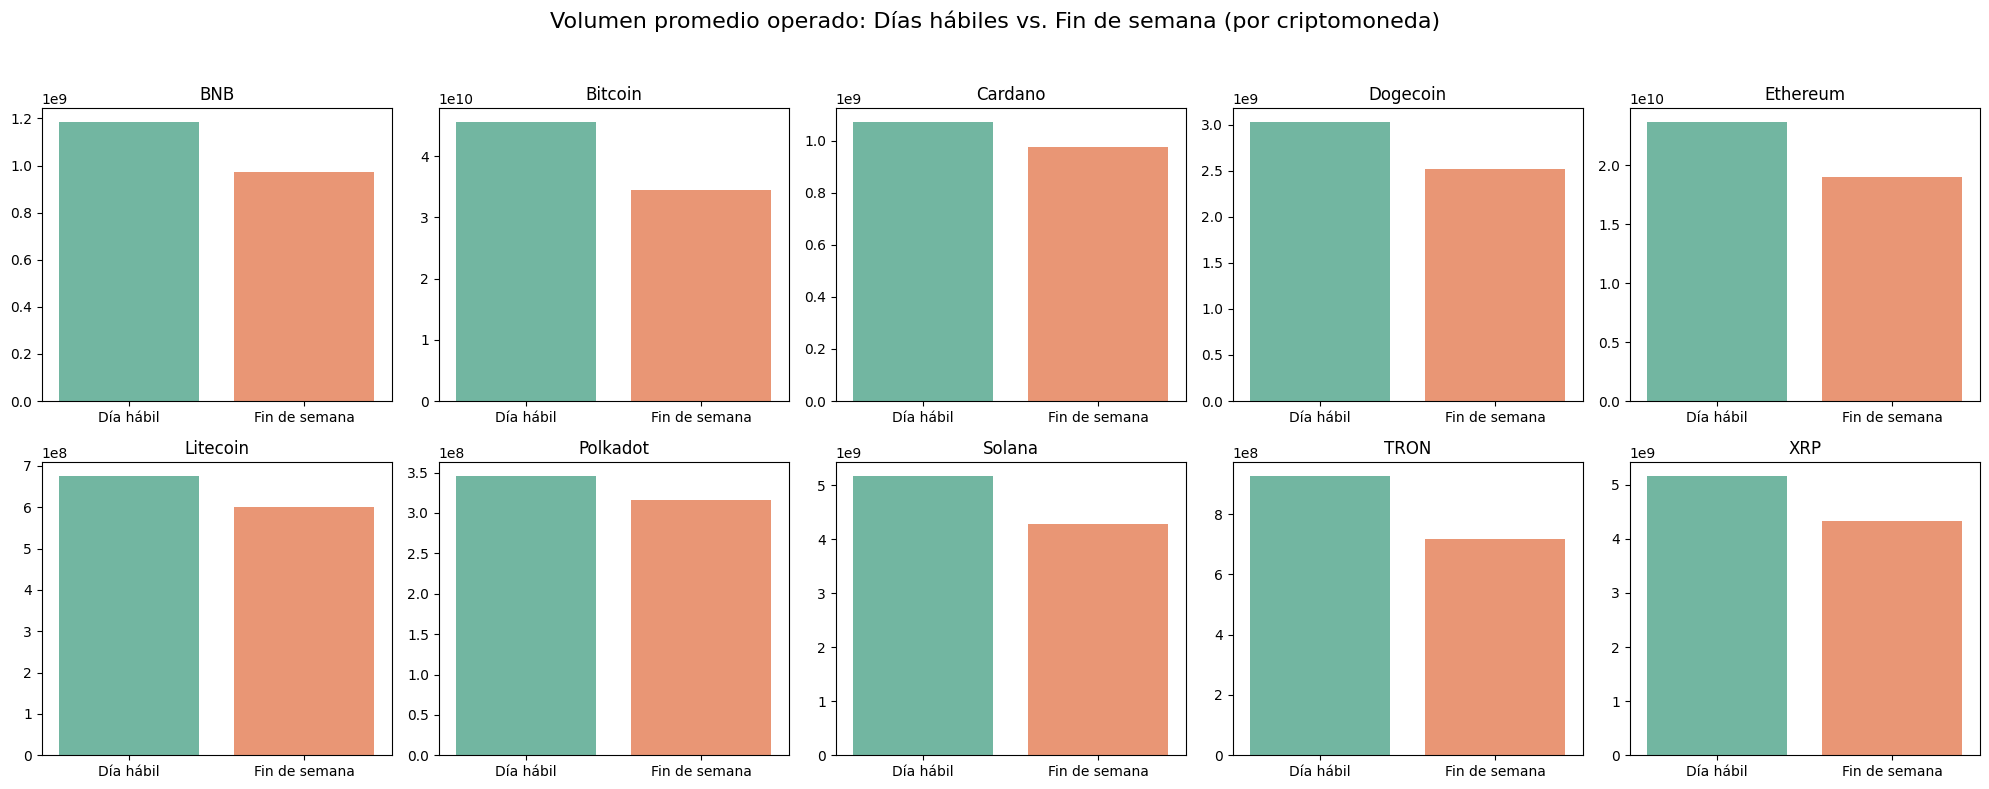

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que los nombres estén ordenados
criptos = df_grouped['name'].unique()

# Definir cantidad de columnas y filas para los subplots
n_cols = 5
n_rows = 2

# --------------------------------
# PRECIO PROMEDIO POR CRIPTO
# --------------------------------

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))
fig.suptitle('Volumen promedio operado: Días hábiles vs. Fin de semana (por criptomoneda)', fontsize=16)

for i, cripto in enumerate(criptos):
    ax = axes[i // n_cols, i % n_cols]
    data = df_grouped[df_grouped['name'] == cripto]

    # Usamos 'tipo_dia' como hue y le sacamos la leyenda (no la necesitamos en cada mini gráfico)
    sns.barplot(data=data, x='tipo_dia', y='total_volume_day', hue='tipo_dia', palette='Set2', ax=ax, legend=False)

    ax.set_title(cripto)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

📌 Del análisis se observa que, en general, los precios de cierre promedio entre días hábiles y fines de semana no presentan variaciones significativas para la mayoría de las criptomonedas, manteniéndose relativamente estables. Sin embargo, el volumen operado sí muestra una diferencia clara: durante los días hábiles, todas las criptomonedas analizadas registran un mayor volumen de transacciones en comparación con los fines de semana. Esto podría estar relacionado con la mayor participación institucional y operativa en días laborales, lo que sugiere que, si bien los precios pueden mantenerse estables, **la actividad del mercado tiende a disminuir durante los fines de semana.**

📊 ¿Existe un “efecto fin de semana” en el mercado cripto?

En este apartado exploraremos si existe un comportamiento sistemático de los precios de las criptomonedas durante el fin de semana. Para ello, analizaremos la diferencia entre el precio de cierre del viernes y el del lunes siguiente, calculando el retorno del fin de semana para cada cripto, semana a semana. Luego, resumiremos los resultados para identificar si alguna criptomoneda tiende a subir o bajar durante ese intervalo.

In [74]:
import pandas as pd

# Filtramos solo viernes y lunes y hacemos copia explícita
df_finde = df_merged[df_merged['weekday'].isin(['Friday', 'Monday'])].copy()

# Calculamos semana y año de la fecha
df_finde['week'] = pd.to_datetime(df_finde['date']).dt.isocalendar().week
df_finde['year'] = pd.to_datetime(df_finde['date']).dt.year

# Pivotamos para comparar viernes y lunes de cada semana y cripto
df_wknd_effect = df_finde.pivot_table(
    index=['name', 'year', 'week'],
    columns='weekday',
    values='closing_price',
    observed=False
).dropna()

# Calculamos retorno del fin de semana (lunes vs viernes)
df_wknd_effect['weekend_return'] = (df_wknd_effect['Monday'] - df_wknd_effect['Friday']) / df_wknd_effect['Friday']

# Agrupar por cripto y calcular estadísticos del retorno de fin de semana
df_summary = df_wknd_effect.groupby('name')['weekend_return'].agg(['mean', 'std', 'count']).reset_index()

# Ordenar de mayor a menor retorno promedio
df_summary = df_summary.sort_values(by='mean', ascending=False)

# Mostrar el resumen
df_summary

name  mean  std  count
6  Polkadot  0.02 0.09     50
7    Solana  0.01 0.09     50
2   Cardano  0.01 0.10     50
4  Ethereum  0.00 0.08     50
3  Dogecoin  0.00 0.10     50
5  Litecoin -0.00 0.08     50
0       BNB -0.01 0.05     50
9       XRP -0.01 0.09     50
1   Bitcoin -0.01 0.05     50
8      TRON -0.01 0.08     50

### 🔍 Interpretación general

Polkadot lidera con un retorno promedio positivo del +2% luego del fin de semana, lo que sugiere que en promedio, su precio tiende a subir un poco entre el cierre del viernes y la apertura del lunes.

Solana, Cardano, Dogecoin y Ethereum también muestran retornos positivos pequeños, alrededor del 1%, indicando una ligera tendencia alcista en los fines de semana.

Litecoin se mantiene prácticamente neutra (0%), sin tendencia clara.

BNB, XRP, Bitcoin y TRON presentan retornos promedio negativos alrededor de -1%, lo que indica que, en promedio, su precio suele bajar ligeramente después del fin de semana.

#### 📊 Sobre la volatilidad (desviación estándar)

Las criptos con retornos positivos también muestran alta volatilidad en esos retornos (std ~0.08-0.10), lo que significa que aunque el promedio es positivo, la variabilidad es alta: hay semanas con subidas importantes y otras con caídas.

Bitcoin y BNB tienen menor volatilidad (~0.05), indicando movimientos de fin de semana más estables y menos erráticos, aunque con retorno promedio negativo pequeño.

🚀 ¿Qué tan cerca están las criptomonedas de volver a su máximo histórico (ATH)?

En este análisis nos enfocamos en medir cuánto le falta a cada criptomoneda para alcanzar nuevamente su máximo histórico de precio (All-Time High, o ATH). Para ello, calculamos la distancia porcentual entre el precio de cierre más reciente y su ATH. Esta métrica es útil para evaluar el potencial alcista de cada activo y detectar cuáles están más rezagados o, por el contrario, ya se encuentran cerca de recuperar su punto máximo. A continuación, se presenta una tabla ordenada de menor a mayor distancia al ATH.

In [75]:
# Calcular qué tan lejos está del ATH, expresado como % de distancia
df_merged['distance_to_ath_pct'] = (df_merged['ath'] - df_merged['closing_price']) / df_merged['ath']

# Tomar el último valor disponible por criptomoneda (última fecha de cada una)
df_latest = df_merged.sort_values('date').groupby('name').tail(1)

# Ordenar por cercanía al ATH (más cerca = menor distancia)
df_distance = df_latest[['name', 'closing_price', 'ath', 'distance_to_ath_pct']].sort_values('distance_to_ath_pct')

# Mostrar tabla con % formateado
df_distance['distance_to_ath_pct'] = df_distance['distance_to_ath_pct'] * 100  # Convertir a %
df_distance = df_distance.round({'closing_price': 2, 'ath': 2, 'distance_to_ath_pct': 2})
df_distance.rename(columns={'distance_to_ath_pct': 'distancia_al_ATH_%'}, inplace=True)

df_distance

name  closing_price        ath  distancia_al_ATH_%
729    Bitcoin     109,614.00 111,814.00                1.97
364        BNB         662.20     788.84               16.05
2919       XRP           2.29       3.40               32.65
3649      TRON           0.28       0.43               34.88
1824  Ethereum       2,596.73   4,878.26               46.77
3284    Solana         154.55     293.31               47.31
1459  Dogecoin           0.17       0.73               76.71
2189  Litecoin          91.24     410.26               77.76
1094   Cardano           0.60       3.09               80.58
2554  Polkadot           3.59      54.98               93.47

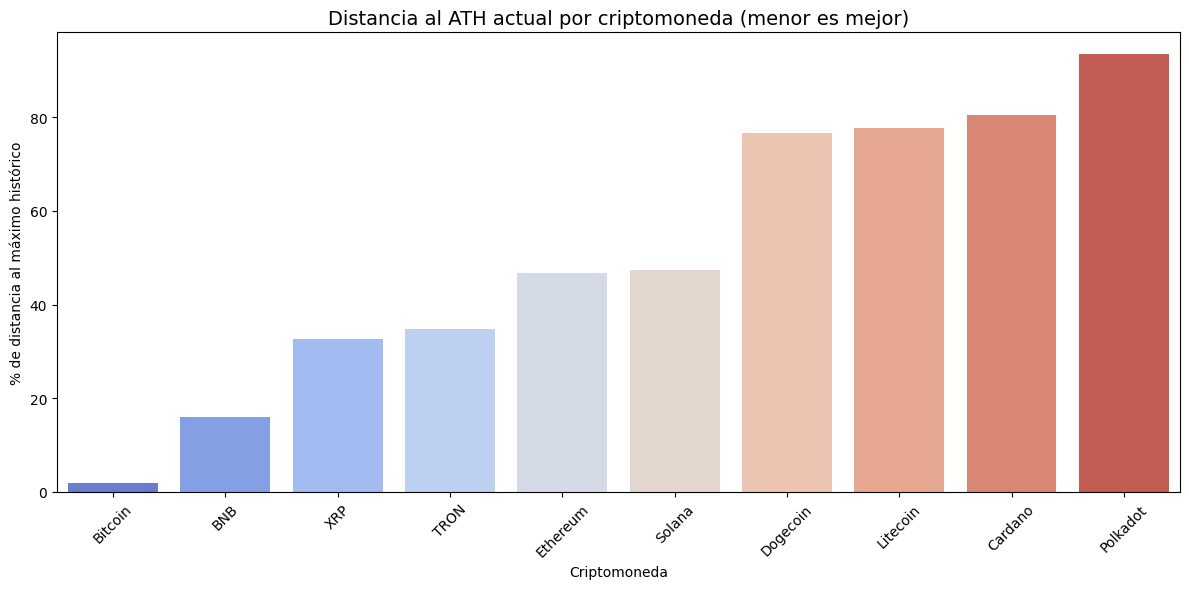

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_distance,
    x='name',
    y='distancia_al_ATH_%',
    hue='name',
    palette='coolwarm',
    legend=False
)
plt.title('Distancia al ATH actual por criptomoneda (menor es mejor)', fontsize=14)
plt.ylabel('% de distancia al máximo histórico')
plt.xlabel('Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis de la distancia al máximo histórico muestra que Bitcoin se encuentra en una posición de clara fortaleza, mientras que otras criptomonedas, como Polkadot, Cardano o Litecoin, se encuentran rezagadas respecto a sus picos históricos. Este indicador permite identificar criptomonedas con fuerte momentum y otras que aún no han despertado el interés del mercado, lo cual puede ser útil tanto para estrategias especulativas como para análisis de oportunidad de inversión a mediano plazo.

Bitcoin es la criptomoneda más cercana a su ATH, con una diferencia de solo 4,09%, lo que sugiere que se encuentra en un momento de fortaleza histórica. Este comportamiento puede estar atrayendo inversión institucional y especulativa, ya que se aproxima a un nivel psicológico clave.

BNB (Binance Coin) también muestra una sólida recuperación, con solo un 17,87% por debajo de su máximo histórico. Esto indica un buen momentum de mediano plazo y podría ser una de las más estables dentro de las altcoins.

En el siguiente nivel de recuperación, se encuentran XRP (35,88%) y TRON (37,21%), que aún tienen un camino considerable por recorrer para alcanzar sus ATH, pero ya han superado la mitad del camino desde sus mínimos.

Criptomonedas como Solana (48,71%) y Ethereum (50,12%) están justo en la mitad de su recuperación histórica, lo que puede interpretarse como:

- Potencial de crecimiento si el mercado mantiene la tendencia alcista.

- O resistencia estructural si no logran acercarse al ATH en lo sucesivo.

En la parte baja del ranking aparecen Dogecoin, Litecoin y Cardano, con distancias al ATH superiores al 78%, lo que refleja que aún están muy lejos de sus valores máximos. Esto puede deberse a:

- Menor demanda relativa.

- Ausencia de catalizadores recientes.

- Efecto "moda pasada" en algunos casos (como DOGE).

Polkadot es la criptomoneda más rezagada, con un 93,8% de distancia al ATH. Este dato puede reflejar un momento de baja adopción, pérdida de confianza del mercado o simplemente falta de impulso comprador.



📉 ¿Qué tan lejos están las criptomonedas de su precio más bajo histórico (ATL)?

Así como analizamos la cercanía al precio máximo histórico, también resulta relevante observar la distancia que separa el precio actual del mínimo histórico (ATL). Este indicador puede ayudar a identificar criptomonedas que aún se encuentran en valores relativamente bajos respecto a su recorrido histórico, lo cual puede interpretarse como una oportunidad de compra para algunos inversores o como una señal de debilidad persistente para otros. Veamos qué tan alejadas están actualmente estas criptos de sus pisos históricos.

In [77]:
# Calcular qué tan lejos está del ATL, expresado como % de distancia
df_merged['distance_to_atl_pct'] = (df_merged['closing_price'] - df_merged['atl']) / df_merged['atl']

# Tomar el último valor disponible por criptomoneda
df_latest_atl = df_merged.sort_values('date').groupby('name').tail(1)

# Ordenar por cercanía al ATL (más cerca = menor distancia)
df_distance_atl = df_latest_atl[['name', 'closing_price', 'atl', 'distance_to_atl_pct']].sort_values('distance_to_atl_pct')

# Convertir a porcentaje y redondear
df_distance_atl['distance_to_atl_pct'] = df_distance_atl['distance_to_atl_pct'] * 100
df_distance_atl = df_distance_atl.round({'closing_price': 2, 'atl': 2, 'distance_to_atl_pct': 2})
df_distance_atl.rename(columns={'distance_to_atl_pct': 'distancia_al_ATL_%'}, inplace=True)

# Mostrar tabla
df_distance_atl


name  closing_price   atl  distancia_al_ATL_%
2554  Polkadot           3.59  2.70               32.96
1094   Cardano           0.60  0.02            2,900.00
2189  Litecoin          91.24  1.15            7,833.91
3284    Solana         154.55  0.50           30,810.00
729    Bitcoin     109,614.00 67.81          161,548.72
1824  Ethereum       2,596.73  0.43          603,790.70
364        BNB         662.20  0.04        1,655,400.00
1459  Dogecoin           0.17  0.00                 inf
3649      TRON           0.28  0.00                 inf
2919       XRP           2.29  0.00                 inf

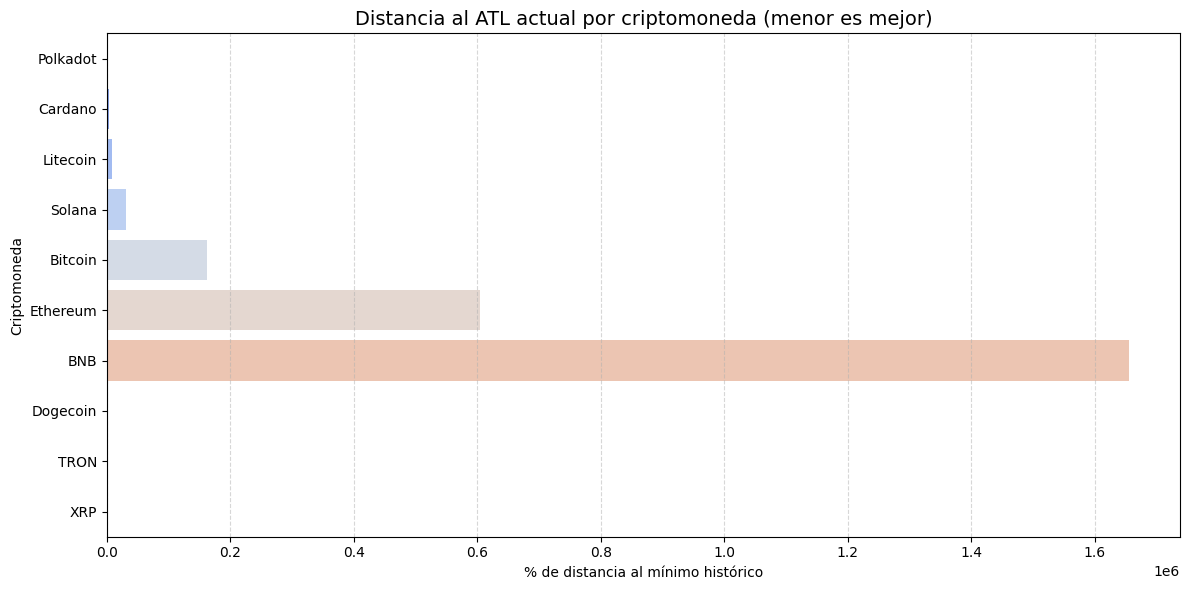

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_distance_atl,
    y='name',
    x='distancia_al_ATL_%',
    hue='name',              # ← esto elimina la advertencia
    palette='coolwarm',
    dodge=False              # ← necesario cuando se usa hue con barplot simple
)
plt.legend([],[], frameon=False)  # ← oculta la leyenda
plt.title('Distancia al ATL actual por criptomoneda (menor es mejor)', fontsize=14)
plt.xlabel('% de distancia al mínimo histórico')
plt.ylabel('Criptomoneda')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Los resultados evidencian grandes diferencias en la distancia porcentual entre el precio actual y el mínimo histórico (ATL) de cada criptomoneda. Algunas, como Polkadot, se encuentran relativamente cerca de su punto más bajo (a solo un 32,59%), lo cual podría sugerir oportunidades de entrada con menor riesgo si se espera una recuperación.

Por otro lado, criptomonedas como Ethereum, Bitcoin, BNB o Solana han crecido exponencialmente desde sus valores mínimos, mostrando aumentos de cientos de miles por ciento. Este dato refleja su madurez relativa en el mercado y el gran interés que han generado a lo largo del tiempo.

Finalmente, en el caso de criptos como Dogecoin, TRON y XRP, cuyos valores mínimos fueron prácticamente cero, no es posible calcular una distancia porcentual finita, lo que aparece como “inf”. Esto indica que partieron de valores extremadamente bajos o simbólicos, lo que también ayuda a entender su alto crecimiento relativo.

Este análisis permite dimensionar la evolución histórica de cada activo y ubicar su cotización actual dentro de ese recorrido.

🪙 ¿Cuánta oferta está en circulación respecto al máximo posible?

El análisis de la circulación de tokens permite entender qué porcentaje de la oferta máxima de cada criptomoneda ya se encuentra disponible en el mercado. Un alto porcentaje de circulación puede indicar una menor presión futura de emisión (menor inflación del activo), mientras que un porcentaje bajo podría significar que aún queda una gran cantidad por liberar, lo cual podría afectar su precio a futuro. A continuación, observamos el estado actual de circulación de las principales criptomonedas.

In [79]:
# Tomar el último valor por criptomoneda
df_latest_circulation = df_merged.sort_values('date').groupby('name').tail(1)

# Seleccionar columnas clave y convertir a %
df_circulation = df_latest_circulation[['name', 'circulating_supply', 'max_supply', 'circulation_ratio']].copy()
df_circulation['circulation_ratio'] = df_circulation['circulation_ratio'] * 100

# Redondear para mostrar
df_circulation = df_circulation.round({'circulating_supply': 2, 'max_supply': 2, 'circulation_ratio': 2})
df_circulation = df_circulation.sort_values('circulation_ratio', ascending=False)

# Renombrar columna para mejor presentación
df_circulation.rename(columns={'circulation_ratio': 'circulación_%'}, inplace=True)

# Mostrar resultados
df_circulation

name  circulating_supply         max_supply  circulación_%
729    Bitcoin       19,886,871.00      21,000,000.00          94.70
2189  Litecoin       76,033,151.98      84,000,000.00          90.52
1094   Cardano   36,125,593,968.25  45,000,000,000.00          80.28
364        BNB      145,887,575.79     200,000,000.00          72.94
2919       XRP   59,068,187,926.00 100,000,000,000.00          59.07
1824  Ethereum      120,717,217.54                NaN            NaN
3284    Solana      534,732,029.55                NaN            NaN
2554  Polkadot    1,522,267,060.00                NaN            NaN
1459  Dogecoin  149,888,936,383.71                NaN            NaN
3649      TRON   94,788,392,516.51                NaN            NaN

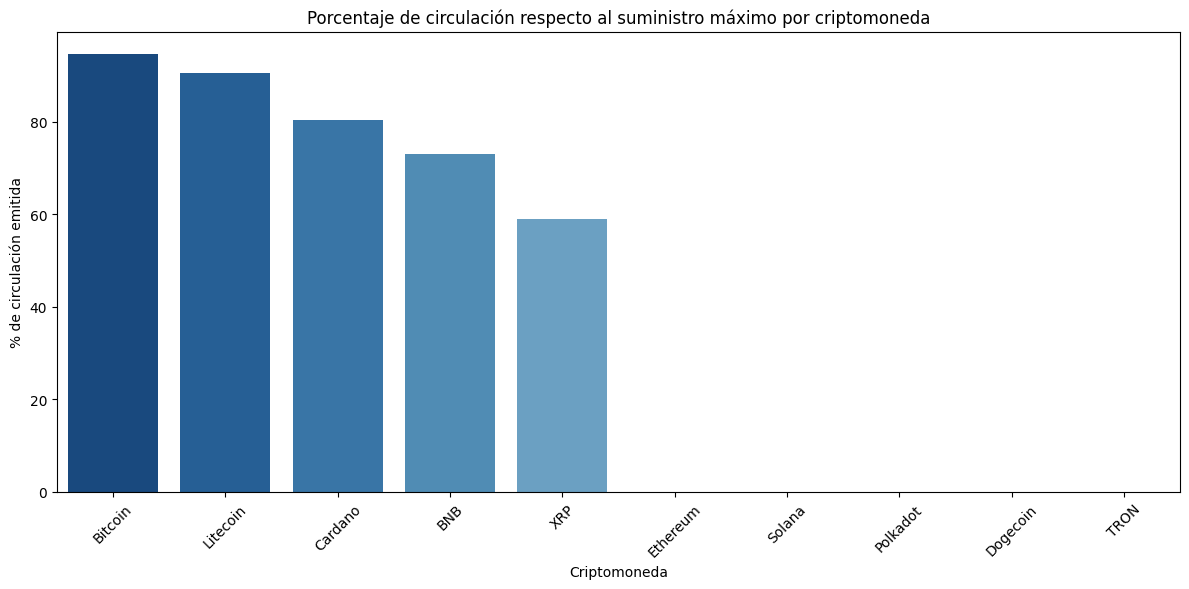

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_circulation,
    x='name',
    y='circulación_%',
    hue='name',               # 🔹 Obligatorio si usás palette
    palette='Blues_r',
    legend=False              # 🔹 Ocultamos la leyenda innecesaria
)
plt.title('Porcentaje de circulación respecto al suministro máximo por criptomoneda')
plt.ylabel('% de circulación emitida')
plt.xlabel('Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis del ratio de circulación revela diferencias importantes en la dinámica de emisión de las principales criptomonedas. Bitcoin y Litecoin presentan una circulación superior al 90%, lo que indica una baja presión inflacionaria futura y refuerza su percepción como activos escasos. En contraste, XRP apenas alcanza el 59% de circulación, lo que puede implicar riesgo de dilución si su emisión no es controlada. Por otro lado, criptomonedas como Ethereum, Solana o Dogecoin no tienen un suministro máximo definido, lo que introduce un componente inflacionario estructural. Esta diferencia en el diseño económico puede influir en la estabilidad de precios y en la percepción de valor de cada activo en el largo plazo.

📈 ¿Cómo ha sido el rendimiento mensual de cada criptomoneda?

Para visualizar la evolución reciente del mercado, analizamos el rendimiento promedio mensual de cada criptomoneda durante los últimos 12 meses. Este enfoque permite detectar tendencias, rachas positivas o negativas y comparar el comportamiento relativo entre los distintos activos. Seguidamente veremos un enfoque global del comportamiento de las 10 criptos objeto del presente estudio.

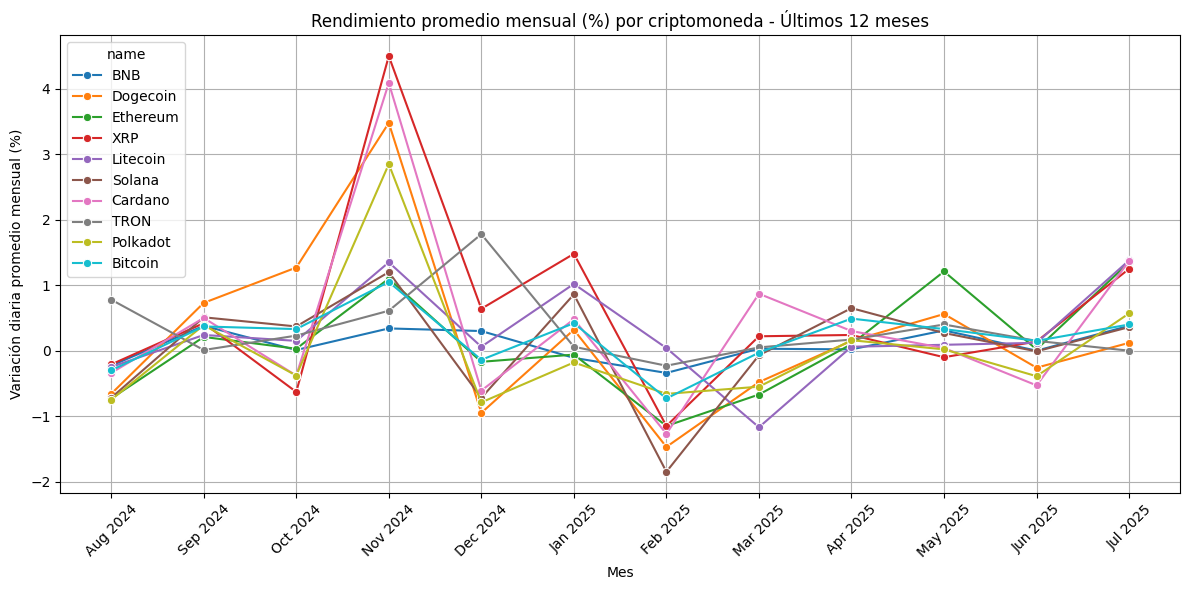

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna de año y mes como fecha
df_merged['year_month'] = df_merged['date'].dt.to_period('M').astype(str)

# Agrupamos por cripto y mes-año
monthly_returns = df_merged.groupby(['name', 'year_month'])['daily_pct_change'].mean().reset_index()

# Redondeamos
monthly_returns['rendimiento_mensual_%'] = (monthly_returns['daily_pct_change'] * 100).round(2)
monthly_returns.drop(columns='daily_pct_change', inplace=True)

# Ordenar por fecha correctamente
monthly_returns['year_month'] = pd.to_datetime(monthly_returns['year_month'])
monthly_returns = monthly_returns.sort_values('year_month')

# Formatear para eje X en gráfico
monthly_returns['mes_año'] = monthly_returns['year_month'].dt.strftime('%b %Y')  # Ej: Jul 2024

# Filtrar últimos 12 meses
ultimo_mes = monthly_returns['year_month'].max()
primer_mes = ultimo_mes - pd.DateOffset(months=11)
monthly_returns = monthly_returns[(monthly_returns['year_month'] >= primer_mes)]

# Gráfico
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_returns, x='mes_año', y='rendimiento_mensual_%', hue='name', marker='o')
plt.title('Rendimiento promedio mensual (%) por criptomoneda - Últimos 12 meses')
plt.xlabel('Mes')
plt.ylabel('Variación diaria promedio mensual (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


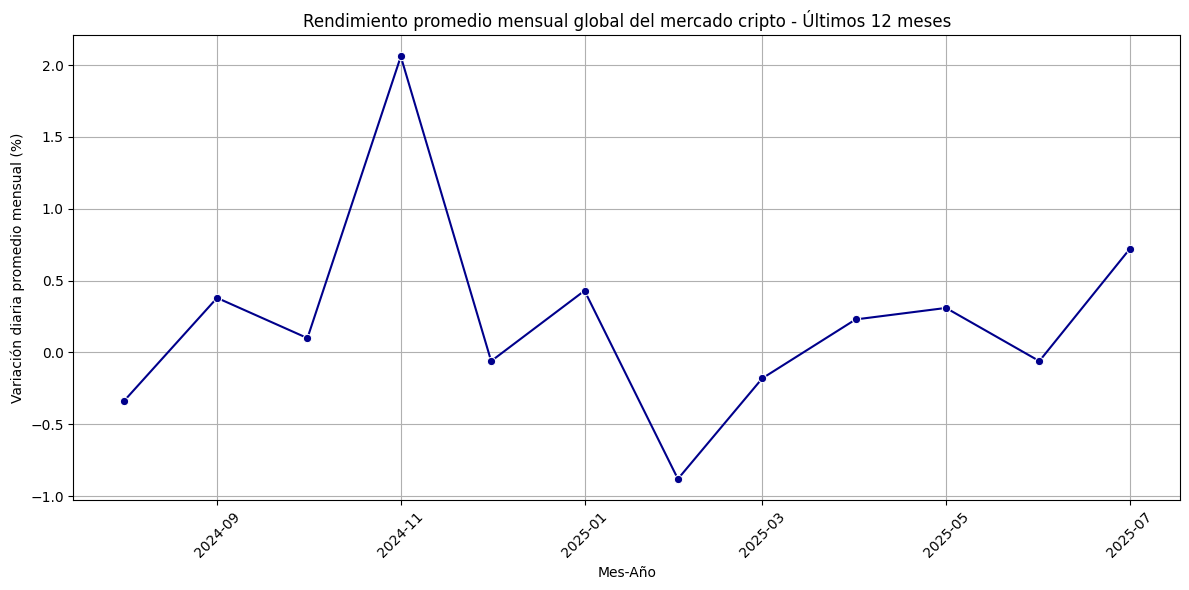

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna year_month en formato datetime mensual
df_merged['year_month'] = df_merged['date'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mes-año y calcular rendimiento promedio global
global_monthly = df_merged.groupby('year_month')['daily_pct_change'].mean().reset_index()
global_monthly['rendimiento_promedio_global_%'] = (global_monthly['daily_pct_change'] * 100).round(2)

# Últimos 12 meses (si querés acotar)
global_monthly = global_monthly.sort_values('year_month').tail(12)

# Gráfico
plt.figure(figsize=(12,6))
sns.lineplot(data=global_monthly, x='year_month', y='rendimiento_promedio_global_%', marker='o', color='darkblue')
plt.title('Rendimiento promedio mensual global del mercado cripto - Últimos 12 meses')
plt.xlabel('Mes-Año')
plt.ylabel('Variación diaria promedio mensual (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

El análisis estacional mensual del mercado cripto durante 2024 revela una alta variabilidad en los rendimientos promedios mensuales, con meses positivos y negativos que se alternan a lo largo del año. Noviembre se destaca como el mejor mes, con un rendimiento promedio diario del +2,06%, lo que podría reflejar un repunte general del mercado o la influencia de factores puntuales en ese periodo.

En contraposición, febrero fue el mes más negativo, con una caída promedio diaria del -0,88%, seguido por otros meses con rendimientos levemente negativos como marzo, junio y agosto. También se observan etapas de recuperación moderada, especialmente en mayo y septiembre.

Sin embargo, es importante destacar que, al contar con datos de un solo año calendario, no es posible determinar si estas variaciones responden a patrones estacionales reales (repetitivos cada año) o si se deben a factores aleatorios, coyunturales o específicos del 2024. Por lo tanto, aunque estos datos permiten detectar posibles regularidades, no son suficientes por sí solos para afirmar la existencia de una estacionalidad estructural en el mercado cripto. Se requeriría información de múltiples años para validar o descartar esta hipótesis con mayor rigor.

📊 Análisis de cruces entre precio y medias móviles en Bitcoin

Para profundizar en el análisis de comportamiento de una criptomoneda específica, en este caso Bitcoin, seleccionamos sus datos dentro del conjunto general. El objetivo es estudiar cómo el precio de cierre interactúa con dos medias móviles: la de 7 días y la de 30 días.

Estas medias móviles sirven como indicadores técnicos que nos ayudan a detectar tendencias y posibles puntos de cambio en el precio. Para ello, creamos columnas que indican si el precio está por encima o por debajo de cada media móvil, y a partir de ahí identificamos los “cruces”, que son los momentos en que el precio cruza estas medias y puede señalar un cambio en la dirección de la tendencia.

El siguiente código implementa este análisis y nos permite cuantificar cuántos cruces ocurrieron para cada media móvil en el período considerado.



In [83]:
# Filtrar solo una cripto para hacer el análisis, por ejemplo Bitcoin
btc = df_merged[df_merged['name'] == 'Bitcoin'].copy()

# Asegurarnos que columnas sean numéricas
for col in ['closing_price', 'sma_7', 'sma_30']:
    btc[col] = pd.to_numeric(btc[col], errors='coerce')

# Crear columnas que detectan si el precio está por encima o debajo de la media móvil
btc['above_sma7'] = btc['closing_price'] > btc['sma_7']
btc['above_sma30'] = btc['closing_price'] > btc['sma_30']

# Detectar cruces: cuando cambia la condición de True a False o viceversa
btc['crossover_sma7'] = btc['above_sma7'].ne(btc['above_sma7'].shift())
btc['crossover_sma30'] = btc['above_sma30'].ne(btc['above_sma30'].shift())

print("Cruces del precio con la SMA de 7 días:", btc['crossover_sma7'].sum())
print("Cruces del precio con la SMA de 30 días:", btc['crossover_sma30'].sum())

Cruces del precio con la SMA de 7 días: 84
Cruces del precio con la SMA de 30 días: 32


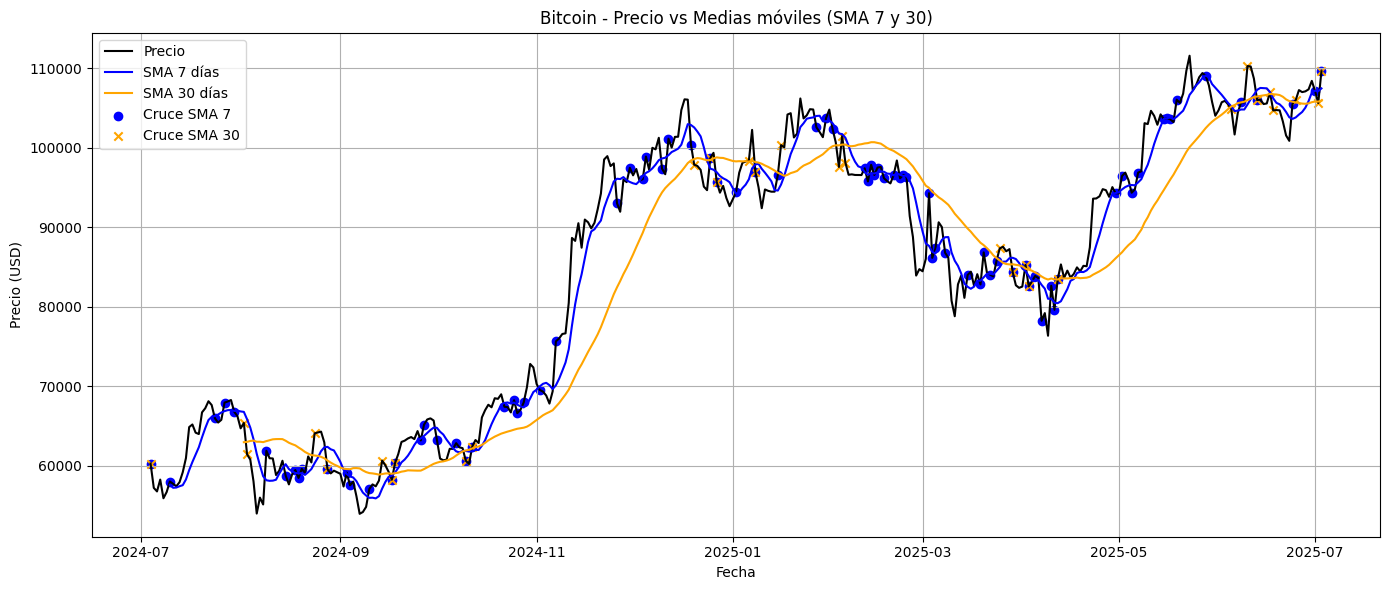

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(btc['date'], btc['closing_price'], label='Precio', color='black')
plt.plot(btc['date'], btc['sma_7'], label='SMA 7 días', color='blue')
plt.plot(btc['date'], btc['sma_30'], label='SMA 30 días', color='orange')

# Señalar los puntos de cruce con marcadores
cruce_sma7 = btc[btc['crossover_sma7']]
plt.scatter(cruce_sma7['date'], cruce_sma7['closing_price'], color='blue', marker='o', label='Cruce SMA 7')

cruce_sma30 = btc[btc['crossover_sma30']]
plt.scatter(cruce_sma30['date'], cruce_sma30['closing_price'], color='orange', marker='x', label='Cruce SMA 30')

plt.title('Bitcoin - Precio vs Medias móviles (SMA 7 y 30)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
# Filtrar Bitcoin
btc = df_merged[df_merged['name'] == 'Bitcoin'].copy()

# Asegurar columnas numéricas
for col in ['closing_price', 'sma_7', 'sma_30']:
    btc[col] = pd.to_numeric(btc[col], errors='coerce')

# Detectar si precio está arriba o abajo de SMA
btc['above_sma7'] = btc['closing_price'] > btc['sma_7']
btc['above_sma30'] = btc['closing_price'] > btc['sma_30']

# Detectar cruces (cambios en la condición)
btc['crossover_sma7'] = btc['above_sma7'].ne(btc['above_sma7'].shift())
btc['crossover_sma30'] = btc['above_sma30'].ne(btc['above_sma30'].shift())

# Tipo de cruce: True = cruce al alza, False = cruce a la baja
btc['crossover_sma7_type'] = btc['above_sma7'] & btc['crossover_sma7']
btc['crossover_sma30_type'] = btc['above_sma30'] & btc['crossover_sma30']

# Función para calcular retorno acumulado a n días después del cruce
def retorno_acumulado(df, start_idx, n_days=3):
    if start_idx + n_days < len(df):
        start_price = df.iloc[start_idx]['closing_price']
        end_price = df.iloc[start_idx + n_days]['closing_price']
        return (end_price - start_price) / start_price
    else:
        return None

# Listas para guardar retornos post-cruce
retornos_sma7_alza = []
retornos_sma7_baja = []
retornos_sma30_alza = []
retornos_sma30_baja = []

# Iterar con índice posicional para usar .iloc correctamente
for pos in range(len(btc)):
    row = btc.iloc[pos]

    if row['crossover_sma7']:
        ret = retorno_acumulado(btc, pos)
        if ret is not None:
            if row['crossover_sma7_type']:
                retornos_sma7_alza.append(ret)
            else:
                retornos_sma7_baja.append(ret)

    if row['crossover_sma30']:
        ret = retorno_acumulado(btc, pos)
        if ret is not None:
            if row['crossover_sma30_type']:
                retornos_sma30_alza.append(ret)
            else:
                retornos_sma30_baja.append(ret)

# Mostrar resultados
print(f"Retorno promedio a 3 días después de cruce SMA 7 ALZA: {100 * pd.Series(retornos_sma7_alza).mean():.2f}%")
print(f"Retorno promedio a 3 días después de cruce SMA 7 BAJA: {100 * pd.Series(retornos_sma7_baja).mean():.2f}%")
print(f"Retorno promedio a 3 días después de cruce SMA 30 ALZA: {100 * pd.Series(retornos_sma30_alza).mean():.2f}%")
print(f"Retorno promedio a 3 días después de cruce SMA 30 BAJA: {100 * pd.Series(retornos_sma30_baja).mean():.2f}%")


Retorno promedio a 3 días después de cruce SMA 7 ALZA: 0.13%
Retorno promedio a 3 días después de cruce SMA 7 BAJA: 0.30%
Retorno promedio a 3 días después de cruce SMA 30 ALZA: -1.36%
Retorno promedio a 3 días después de cruce SMA 30 BAJA: -1.02%


La SMA de 7 días no parece ser un buen predictor de subas o bajas en Bitcoin a corto plazo, ya que cruces a la baja se siguen de subas moderadas y cruces al alza apenas producen subas pequeñas.

La SMA de 30 días parece funcionar mejor como indicador para señales de venta (cruce a la baja anticipa caídas), pero su cruce al alza no anticipa subas, incluso muestra caídas.

📈 Ahora extendemos el análisis de cruces entre el precio y las medias móviles de 7 y 30 días al resto de las principales criptomonedas de nuestro dataset.

Visualizaremos cada una en mini gráficos dispuestos en un solo lienzo, permitiendo comparar fácilmente los patrones de comportamiento y los puntos donde el precio cruza estas medias, posibles señales técnicas relevantes.

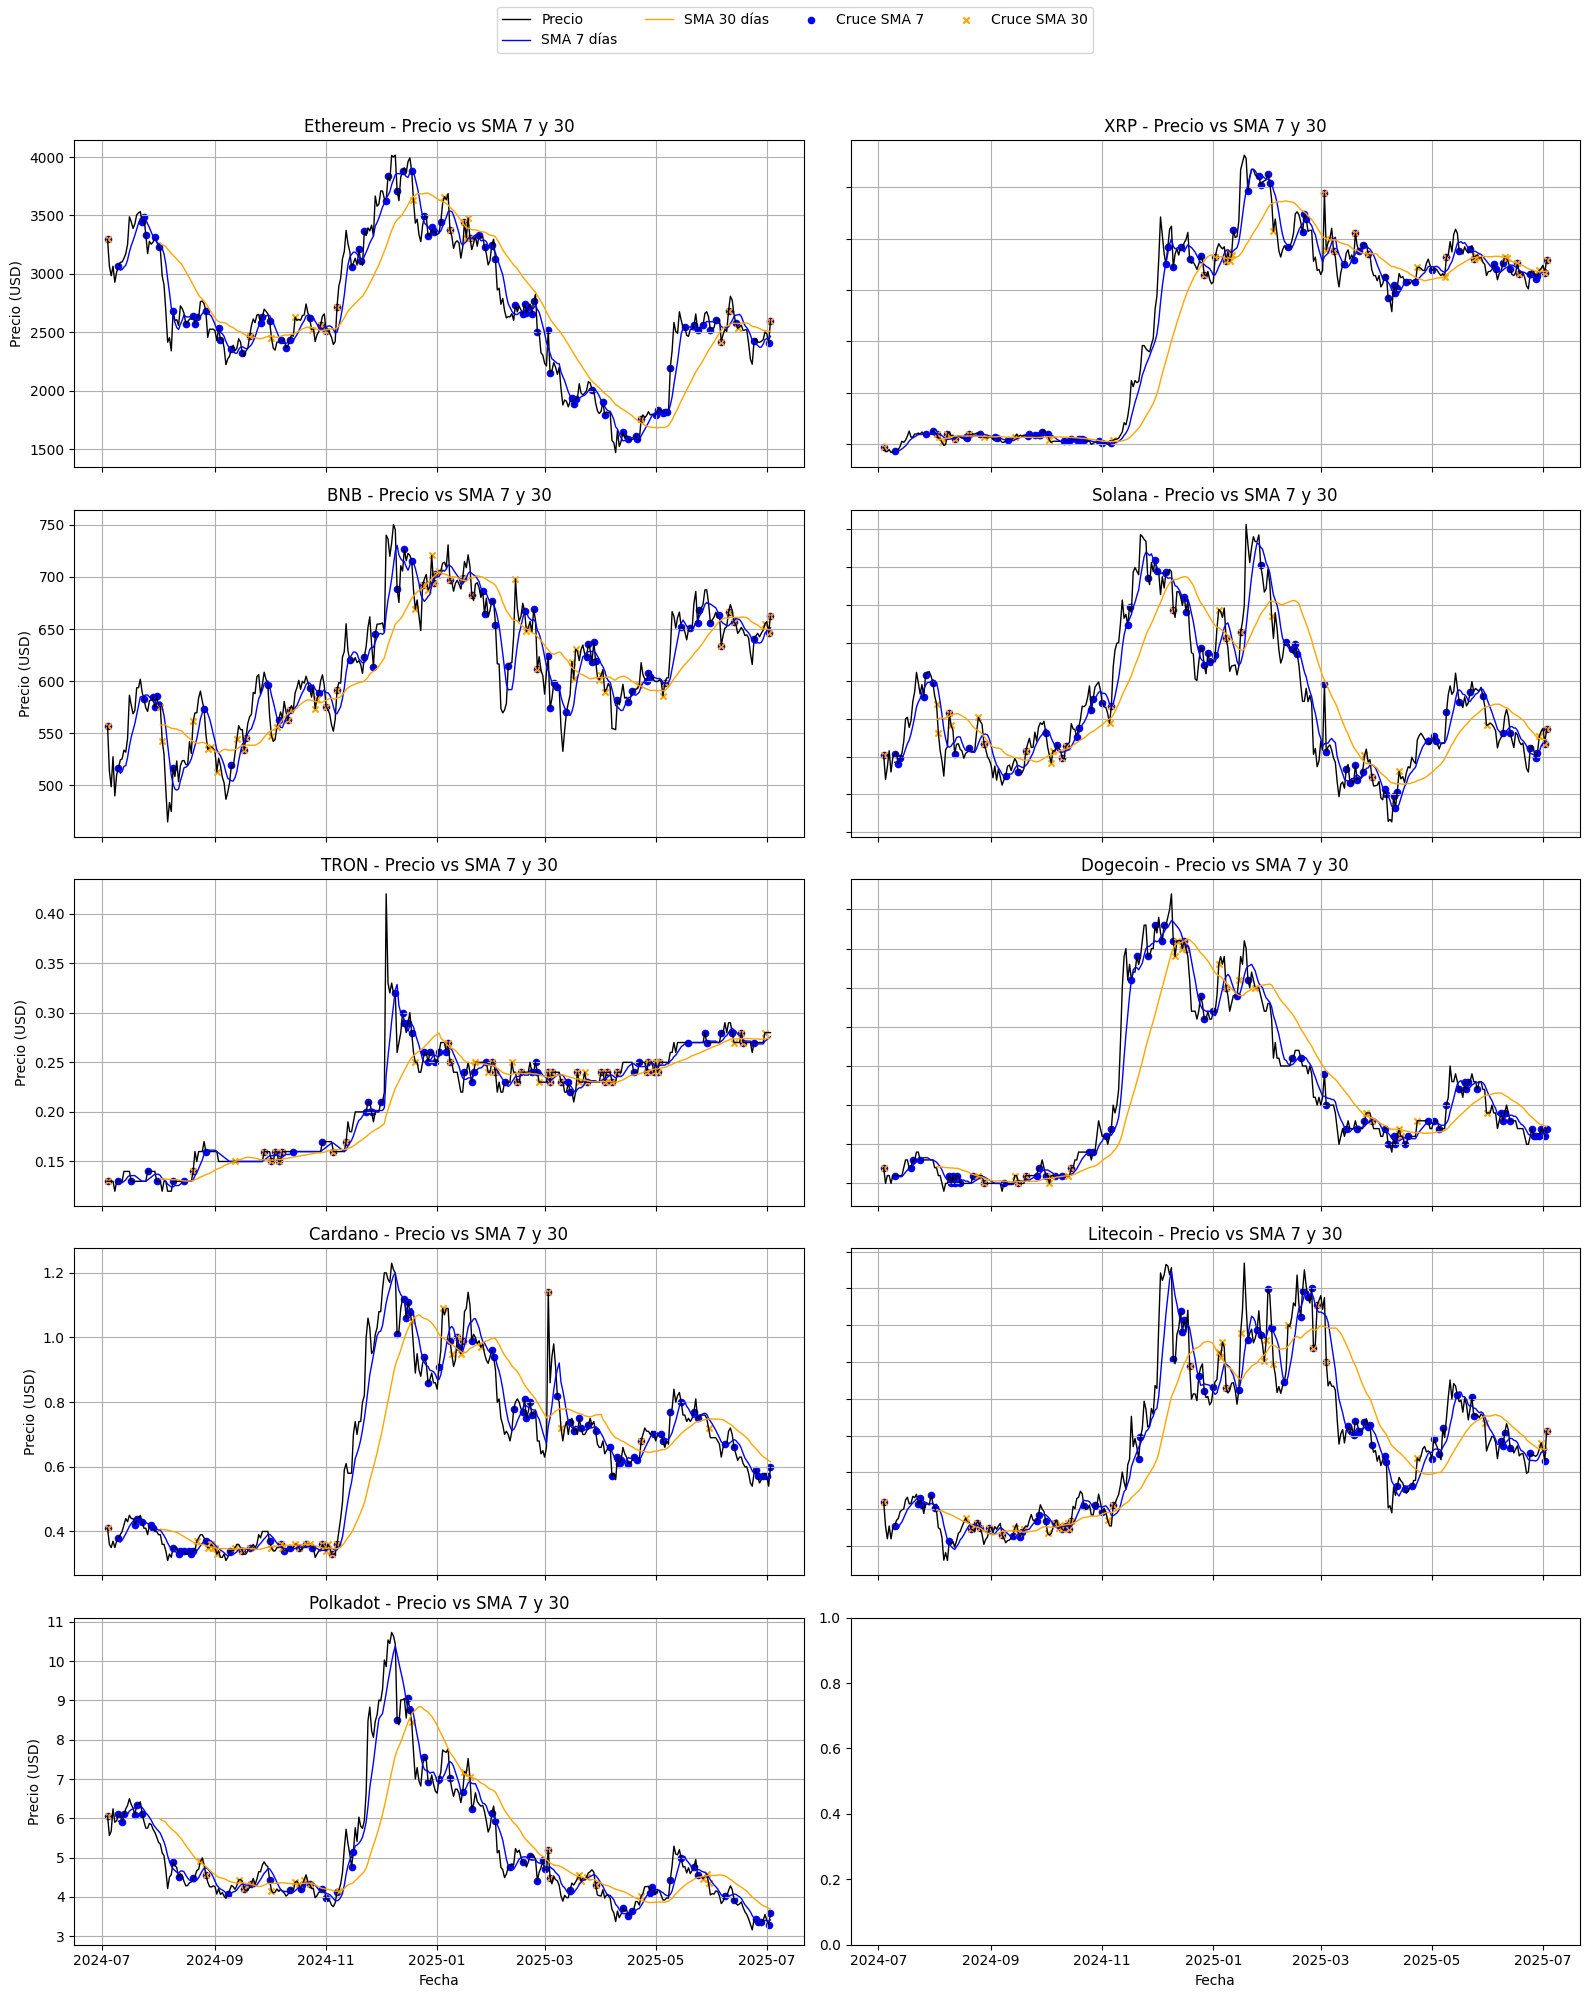

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de criptos a graficar
cryptos = ['Ethereum', 'XRP', 'BNB', 'Solana', 'TRON', 'Dogecoin', 'Cardano', 'Litecoin', 'Polkadot']

# Crear figura con 5 filas y 2 columnas para 10 gráficos
fig, axes = plt.subplots(5, 2, figsize=(16, 20), sharex=True)
axes = axes.flatten()

for i, crypto in enumerate(cryptos):
    # Filtrar datos por criptomoneda
    df = df_merged[df_merged['name'] == crypto].copy()

    # Asegurar columnas numéricas
    for col in ['closing_price', 'sma_7', 'sma_30']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Crear columnas para cruces si no están hechas (igual que antes)
    df['above_sma7'] = df['closing_price'] > df['sma_7']
    df['above_sma30'] = df['closing_price'] > df['sma_30']
    df['crossover_sma7'] = df['above_sma7'].ne(df['above_sma7'].shift())
    df['crossover_sma30'] = df['above_sma30'].ne(df['above_sma30'].shift())

    ax = axes[i]
    ax.plot(df['date'], df['closing_price'], label='Precio', color='black', linewidth=1)
    ax.plot(df['date'], df['sma_7'], label='SMA 7 días', color='blue', linewidth=1)
    ax.plot(df['date'], df['sma_30'], label='SMA 30 días', color='orange', linewidth=1)

    # Puntos de cruce
    cruce_sma7 = df[df['crossover_sma7']]
    cruce_sma30 = df[df['crossover_sma30']]

    ax.scatter(cruce_sma7['date'], cruce_sma7['closing_price'], color='blue', marker='o', s=20, label='Cruce SMA 7')
    ax.scatter(cruce_sma30['date'], cruce_sma30['closing_price'], color='orange', marker='x', s=20, label='Cruce SMA 30')

    ax.set_title(f'{crypto} - Precio vs SMA 7 y 30')
    ax.set_ylabel('Precio (USD)')
    ax.grid(True)
    ax.label_outer()  # Solo muestra etiquetas en el borde exterior para evitar saturar

# Ajustar etiquetas del eje x para la última fila
for ax in axes[-2:]:
    ax.set_xlabel('Fecha')

# Una sola leyenda para todos (en la figura completa)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Al observar los gráficos de cada criptomoneda, se vuelve evidente un patrón recurrente: los cruces entre la media móvil de 30 días y el precio suelen marcar el inicio de movimientos sostenidos en la misma dirección. **Cuando el precio atraviesa la SMA de 30 días hacia arriba, suele dar lugar a una fase de crecimiento; mientras que los cruces hacia abajo tienden a anticipar caídas prolongadas**.

Este comportamiento refuerza la utilidad de las medias móviles como herramienta de análisis técnico, ya que permiten identificar posibles puntos de cambio en la tendencia. En la mayoría de los casos analizados, estos cruces no son eventos aislados ni aleatorios, sino señales que se corresponden con ciclos de mercado más amplios y sostenidos en el tiempo.



# MACHINE LEARNING 🤖

Machine Learning, o aprendizaje automático, es una rama de la inteligencia artificial que permite a las computadoras aprender patrones y tomar decisiones a partir de datos sin ser explícitamente programadas para cada tarea. En términos prácticos, consiste en desarrollar modelos que analizan grandes cantidades de información para hacer predicciones o clasificaciones con base en el comportamiento histórico.

En este proyecto, se implementarán y evaluarán tres modelos diferentes de Machine Learning para predecir el comportamiento del precio de los tokens analizados. A través de la comparación de sus resultados, se seleccionará el modelo que mejor se ajuste a los datos y ofrezca la mayor precisión para anticipar las tendencias futuras de mercado, contribuyendo así a un análisis más efectivo y fundamentado.

### 📈 **Primer modelo: Red Neuronal LSTM**

Como primer enfoque, implementamos un modelo de redes neuronales tipo LSTM (Long Short-Term Memory), una arquitectura especialmente diseñada para captar patrones en series temporales y datos secuenciales. La idea fue aprovechar esta capacidad para predecir el precio de cierre de Bitcoin utilizando variables técnicas como medias móviles y volumen.

A pesar de que los modelos LSTM suelen ser efectivos para análisis de series de tiempo, en este caso los resultados obtenidos no fueron los más satisfactorios comparados con otros enfoques. Sin embargo, su implementación es un paso fundamental para entender la dinámica de los datos y evaluar su desempeño frente a modelos más tradicionales.

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - loss: 0.2327 - val_loss: 0.0047
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 0.0327 - val_loss: 0.0348
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0237 - val_loss: 0.0035
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 0.0235 - val_loss: 0.0058
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0110 - val_loss: 0.0318
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.0143 - val_loss: 0.0175
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0094 - val_loss: 0.0080
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0087 - val_loss: 0.0114
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0073 - val_loss: 0.0162
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0079 - val_loss: 0.0103
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.0069 - val_loss: 0.0082
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0

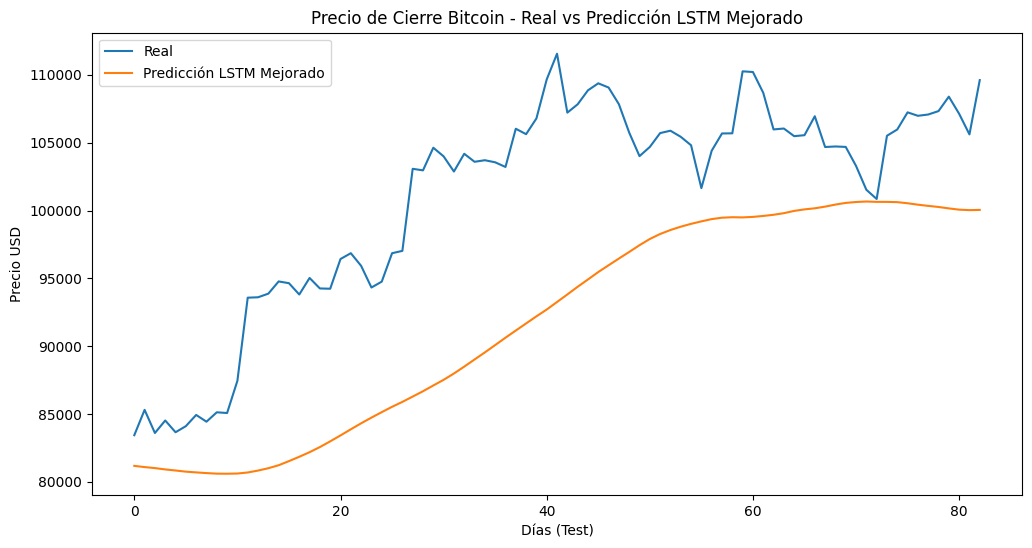

In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Filtrar Bitcoin
df_btc_lstm = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc_lstm['date'] = pd.to_datetime(df_btc_lstm['date'])

# Crear variable "days_since_start"
df_btc_lstm['days_since_start'] = (df_btc_lstm['date'] - df_btc_lstm['date'].min()).dt.days

# Crear lags para closing_price (1, 3 y 7 días)
for lag in [1, 3, 7]:
    df_btc_lstm[f'lag_close_{lag}'] = df_btc_lstm['closing_price'].shift(lag)

# Seleccionar variables para el modelo
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_btc_lstm_model = df_btc_lstm[vars_modelo].dropna().reset_index(drop=True)

# Normalizar variables (features) y target (closing_price)
scaler_features = MinMaxScaler()
features_lstm = df_btc_lstm_model.drop(columns=['closing_price']).values
features_lstm_scaled = scaler_features.fit_transform(features_lstm)

scaler_target = MinMaxScaler()
target_lstm = df_btc_lstm_model['closing_price'].values.reshape(-1, 1)
target_lstm_scaled = scaler_target.fit_transform(target_lstm)

# Función para crear secuencias LSTM con ventana de 60 días
def create_lstm_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_lstm_seq, y_lstm_seq = create_lstm_sequences(features_lstm_scaled, target_lstm_scaled, time_steps=60)

# División train-test 70%-30%
split_lstm = int(len(X_lstm_seq) * 0.7)
X_train_lstm, X_test_lstm = X_lstm_seq[:split_lstm], X_lstm_seq[split_lstm:]
y_train_lstm, y_test_lstm = y_lstm_seq[:split_lstm], y_lstm_seq[split_lstm:]

# Modelo LSTM con Input() para evitar warning
model_lstm = Sequential()
model_lstm.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(100, activation='relu', return_sequences=True))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenamiento con EarlyStopping
early_stop_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_lstm],
    verbose=1
)

# Predicción y evaluación
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled)
y_true_lstm = scaler_target.inverse_transform(y_test_lstm)

rmse_lstm = np.sqrt(np.mean((y_pred_lstm - y_true_lstm) ** 2))
mae_lstm = np.mean(np.abs(y_pred_lstm - y_true_lstm))
r2_lstm = 1 - (np.sum((y_true_lstm - y_pred_lstm) ** 2) / np.sum((y_true_lstm - np.mean(y_true_lstm)) ** 2))

print(f"LSTM mejorado RMSE: {rmse_lstm:.2f}")
print(f"LSTM mejorado MAE: {mae_lstm:.2f}")
print(f"LSTM mejorado R2: {r2_lstm:.2f}")

# Gráfico resultados
plt.figure(figsize=(12,6))
plt.plot(y_true_lstm, label='Real')
plt.plot(y_pred_lstm, label='Predicción LSTM Mejorado')
plt.title('Precio de Cierre Bitcoin - Real vs Predicción LSTM Mejorado')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.show()


**Evaluación del modelo LSTM mejorado**

Luego de introducir modificaciones en la arquitectura del modelo LSTM inicial —como el aumento en la cantidad de capas y la incorporación de variables con rezago (lags)—, se observó una mejora en las métricas obtenidas respecto al modelo anterior. El RMSE (Root Mean Squared Error) fue de aproximadamente 6817, lo que representa una disminución considerable del error cuadrático medio. Por su parte, el MAE (Mean Absolute Error) se redujo a 5859, lo que indica que, en promedio, las predicciones difieren del valor real en esa magnitud de dólares.

En cuanto al coeficiente de determinación (R²), el valor obtenido fue de 0.25, lo que significa que el modelo es capaz de explicar alrededor del 25% de la variabilidad en el precio de cierre de Bitcoin durante el período de prueba. Si bien esto sigue siendo una capacidad predictiva limitada, implica una mejora sustancial frente al modelo LSTM anterior, cuyo R² había sido negativo. Esto demuestra que las transformaciones implementadas fueron efectivas,

**Resultados de la evaluación del modelo LSTM**

Para evaluar qué tan bien predice el modelo LSTM el precio de cierre de Bitcoin, utilizamos tres métricas comunes en Machine Learning:

RMSE (Raíz del Error Cuadrático Medio): mide el error promedio de predicción, penalizando más los errores grandes. Un valor menor indica mejores predicciones.

MAE (Error Absoluto Medio): representa el error promedio sin importar la dirección, es decir, cuánto se desvía en promedio la predicción del valor real. También, valores más bajos son mejores.

R² (Coeficiente de Determinación): indica qué proporción de la variabilidad del precio real puede explicar el modelo. Un valor cercano a 1 significa un buen ajuste; valores cercanos o menores a 0 indican un desempeño pobre.

En este caso, el modelo LSTM obtuvo un RMSE de 10,317 y un MAE de 9,233, lo que significa que, en promedio, las predicciones se alejaron miles de dólares del precio real, un margen bastante alto para este contexto. Además, el valor negativo de R² (-0.16) indica que el modelo no es capaz de explicar la tendencia del precio mejor que si simplemente se usara el promedio histórico como predicción constante.

Estos resultados muestran que, a pesar de la fama y el potencial de las redes LSTM para manejar datos secuenciales, en esta aplicación particular con las variables y configuración actuales, el modelo no logra capturar adecuadamente la dinámica del mercado de Bitcoin. Esto resalta la importancia de probar distintos enfoques para encontrar la mejor herramienta predictiva.

**Segundo intento con LSTM: ajustes para mejorar el modelo**

Luego de observar un bajo rendimiento en el primer modelo basado en redes neuronales LSTM, se decidió realizar una nueva implementación con varias mejoras en el diseño. Esta vez, se incorporaron variables rezagadas del precio (lags de 1, 3 y 7 días) que permiten al modelo aprender más directamente de los movimientos recientes del mercado. También se amplió la ventana temporal a 60 días, para que el modelo tenga un contexto más amplio de lo que ocurrió antes de hacer una predicción.

Además, se modificó la arquitectura de la red, utilizando dos capas LSTM en lugar de una sola, lo cual permite capturar mejor las relaciones temporales complejas. El objetivo de estos cambios fue darle al modelo más información y mayor capacidad para detectar patrones que podrían anticipar con mayor precisión el precio de cierre de Bitcoin.

A continuación, se muestra el código correspondiente a esta versión mejorada del modelo LSTM. Luego, veremos si estos ajustes lograron mejorar su desempeño.



Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - loss: 0.3664 - val_loss: 0.0690
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.1171 - val_loss: 0.1007
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.0555 - val_loss: 0.0179
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 0.0156 - val_loss: 0.0046
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.0155 - val_loss: 0.0200
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0100 - val_loss: 0.0335
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.0116 - val_loss: 0.0151
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0091 - val_loss: 0.0147
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0080 - val_loss: 0.0238
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0082 - val_loss: 0.0222
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0077 - val_loss: 0.0148
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.

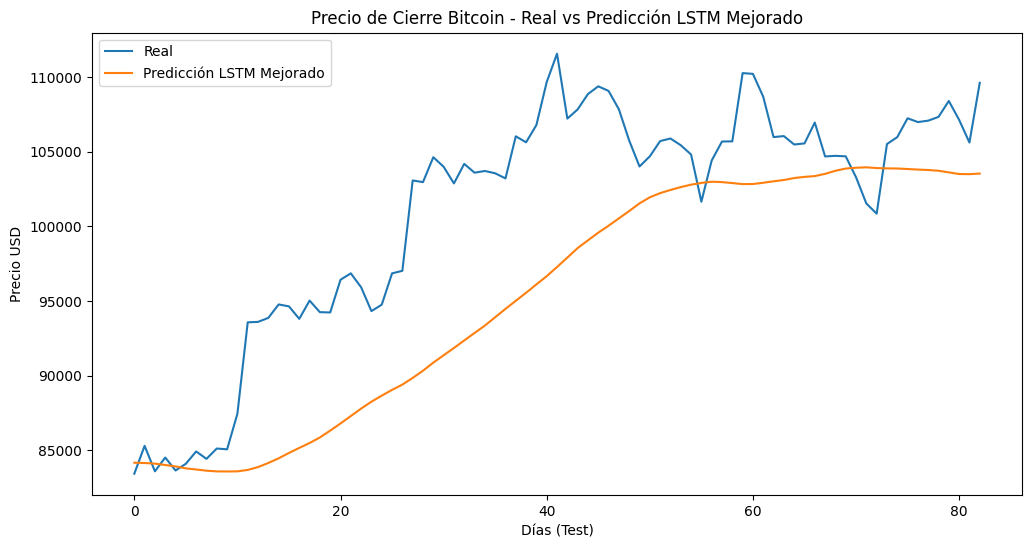

In [108]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ----------------------------
# Establecer semilla
# ----------------------------
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# ----------------------------
# Preprocesamiento de datos
# ----------------------------

# Filtrar Bitcoin
df_btc_lstm = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc_lstm['date'] = pd.to_datetime(df_btc_lstm['date'])

# Crear variable "days_since_start"
df_btc_lstm['days_since_start'] = (df_btc_lstm['date'] - df_btc_lstm['date'].min()).dt.days

# Crear lags para closing_price (1, 3 y 7 días)
for lag in [1, 3, 7]:
    df_btc_lstm[f'lag_close_{lag}'] = df_btc_lstm['closing_price'].shift(lag)

# Seleccionar variables para el modelo
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_btc_lstm_model = df_btc_lstm[vars_modelo].dropna().reset_index(drop=True)

# Normalizar variables (features) y target (closing_price)
scaler_features = MinMaxScaler()
features_lstm = df_btc_lstm_model.drop(columns=['closing_price']).values
features_lstm_scaled = scaler_features.fit_transform(features_lstm)

scaler_target = MinMaxScaler()
target_lstm = df_btc_lstm_model['closing_price'].values.reshape(-1, 1)
target_lstm_scaled = scaler_target.fit_transform(target_lstm)

# ----------------------------
# Crear secuencias LSTM
# ----------------------------
def create_lstm_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_lstm_seq, y_lstm_seq = create_lstm_sequences(features_lstm_scaled, target_lstm_scaled, time_steps=60)

# División train-test 70%-30%
split_lstm = int(len(X_lstm_seq) * 0.7)
X_train_lstm, X_test_lstm = X_lstm_seq[:split_lstm], X_lstm_seq[split_lstm:]
y_train_lstm, y_test_lstm = y_lstm_seq[:split_lstm], y_lstm_seq[split_lstm:]

# ----------------------------
# Construcción del modelo LSTM
# ----------------------------
model_lstm = Sequential()
model_lstm.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(100, activation='relu', return_sequences=True))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenamiento con EarlyStopping
early_stop_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop_lstm],
    verbose=1
)

# ----------------------------
# Evaluación del modelo
# ----------------------------
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm_scaled)
y_true_lstm = scaler_target.inverse_transform(y_test_lstm)

rmse_lstm = np.sqrt(np.mean((y_pred_lstm - y_true_lstm) ** 2))
mae_lstm = np.mean(np.abs(y_pred_lstm - y_true_lstm))
r2_lstm = 1 - (np.sum((y_true_lstm - y_pred_lstm) ** 2) / np.sum((y_true_lstm - np.mean(y_true_lstm)) ** 2))

print(f"LSTM mejorado RMSE: {rmse_lstm:.2f}")
print(f"LSTM mejorado MAE: {mae_lstm:.2f}")
print(f"LSTM mejorado R2: {r2_lstm:.2f}")

# ----------------------------
# Gráfico de resultados
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(y_true_lstm, label='Real')
plt.plot(y_pred_lstm, label='Predicción LSTM Mejorado')
plt.title('Precio de Cierre Bitcoin - Real vs Predicción LSTM Mejorado')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.show()


**Evaluación del modelo LSTM mejorado**

Luego de introducir modificaciones en la arquitectura del modelo LSTM inicial —como el aumento en la cantidad de capas y la incorporación de variables con rezago (lags)—, se observó una mejora en las métricas obtenidas respecto al modelo anterior. El RMSE (Root Mean Squared Error) fue de aproximadamente 7123, lo que representa una disminución considerable del error cuadrático medio. Por su parte, el MAE (Mean Absolute Error) se redujo a 5851, lo que indica que, en promedio, las predicciones difieren del valor real en esa magnitud de dólares.

En cuanto al coeficiente de determinación (R²), el valor obtenido fue de 0.18, lo que significa que el modelo es capaz de explicar alrededor del 18% de la variabilidad en el precio de cierre de Bitcoin durante el período de prueba. Si bien esto sigue siendo una capacidad predictiva limitada, implica una mejora sustancial frente al modelo LSTM anterior, cuyo R² había sido negativo. Esto demuestra que las transformaciones implementadas fueron efectivas para optimizar el rendimiento del modelo.

### 📈 **Segundo Modelo: Regresión Lineal como Serie de Tiempo**

Luego de haber probado un modelo basado en redes neuronales, se exploró un enfoque más clásico pero igualmente relevante: la regresión lineal, aplicada sobre una estructura de datos preparada como serie de tiempo.

La regresión lineal es uno de los modelos más simples dentro del aprendizaje automático supervisado. Su objetivo es encontrar la relación entre una variable dependiente (en este caso, el precio de cierre de Bitcoin) y una o varias variables independientes (por ejemplo, promedios móviles, volumen de transacciones y el paso del tiempo). El modelo estima una ecuación que permite predecir el valor futuro de la variable objetivo a partir de estas características.

Ahora bien, para convertir este enfoque en un modelo de series de tiempo, se incorporaron dos elementos clave:

- Variable temporal explícita: Se creó una variable llamada days_since_start, que representa cuántos días pasaron desde el inicio de la serie. Esto permite al modelo capturar la evolución del precio a lo largo del tiempo.

- Variables con rezago (lags): Se añadieron versiones desplazadas del precio de cierre (por ejemplo, el precio de 1, 3 y 7 días atrás). Este tipo de variables es fundamental en modelos de series de tiempo, ya que permiten al modelo aprender patrones basados en comportamientos pasados.

Gracias a esta transformación, el modelo no solo considera los factores actuales, sino que también se alimenta de su propio historial para realizar predicciones. A continuación, se presenta el código que entrena este modelo y permite proyectar el comportamiento del precio de Bitcoin para los próximos 10 días.

In [113]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Filtrar bitcoin
df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc['date'] = pd.to_datetime(df_btc['date'])

# Crear variable que representa el paso del tiempo
df_btc['days_since_start'] = (df_btc['date'] - df_btc['date'].min()).dt.days

# Crear variables rezagadas (lags)
for lag in [1, 3, 7]:
    df_btc[f'lag_close_{lag}'] = df_btc['closing_price'].shift(lag)

# Seleccionar columnas necesarias (incluyendo 'date' para el gráfico posterior)
vars_modelo = ['date', 'closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']
df_btc_model = df_btc[vars_modelo].dropna().reset_index(drop=True)

# Definir features y target
X = df_btc_model.drop(columns=['date', 'closing_price'])
y = df_btc_model['closing_price']

# División temporal 70% entrenamiento, 30% test
split_index = int(len(df_btc_model) * 0.7)
X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

# Entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')


RMSE: 1734.21
MAE: 1327.80
R2: 0.97


Los resultados obtenidos muestran un desempeño muy bueno del modelo de regresión lineal aplicado como serie de tiempo.

El RMSE (Root Mean Squared Error) de 1734.21 indica que, en promedio, la diferencia cuadrática entre las predicciones y los valores reales es baja, lo que significa que el modelo comete errores pequeños en términos absolutos.

El MAE (Mean Absolute Error) de 1327.80 representa la media de las diferencias absolutas entre las predicciones y los valores reales, es decir, que en promedio las predicciones se alejan del valor real por aproximadamente 1,327 dólares, lo cual es razonable para un activo con alta volatilidad como Bitcoin.

Finalmente, el coeficiente de determinación R² es 0.97, un valor muy cercano a 1 que indica que el modelo explica el 97% de la variabilidad observada en el precio de cierre durante el período de prueba. Esto significa que las predicciones están muy alineadas con los datos reales, mostrando un alto poder predictivo.

En conjunto, estas métricas sugieren que el modelo logra captar de forma efectiva la dinámica temporal y los patrones presentes en los datos históricos, y es capaz de realizar predicciones bastante precisas para el precio de Bitcoin en el corto plazo.

A continuación, se presenta el gráfico comparativo entre los valores reales y las predicciones del modelo durante el período de prueba, para visualizar su desempeño:

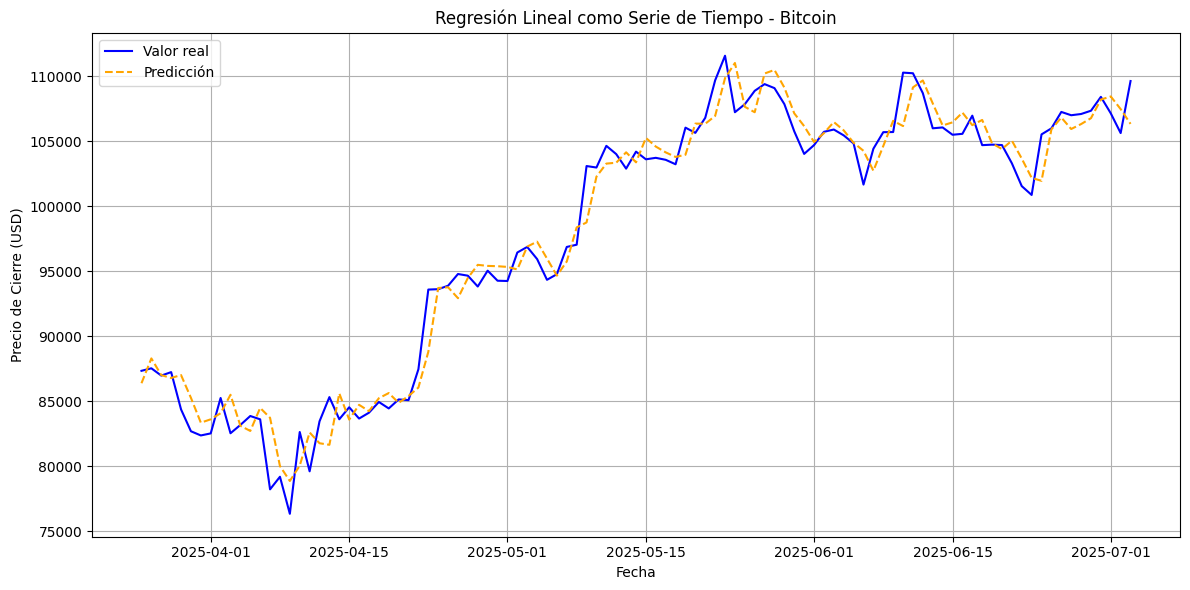

In [114]:
import matplotlib.pyplot as plt

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Fecha': df_btc_model['date'].iloc[split_index:].values,
    'Real': y_test.values,
    'Predicho': y_pred
})

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(resultados['Fecha'], resultados['Real'], label='Valor real', color='blue')
plt.plot(resultados['Fecha'], resultados['Predicho'], label='Predicción', color='orange', linestyle='--')
plt.title('Regresión Lineal como Serie de Tiempo - Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A continuación, se procederá a realizar la predicción del precio de cierre de Bitcoin para los próximos 10 días, utilizando el modelo de regresión lineal entrenado. Además, se visualizarán estas predicciones en un gráfico para facilitar la comparación y comprensión de la evolución proyectada del precio en el corto plazo:

🔮 Predicción de precios para los próximos 10 días:
       Fecha  Predicted_Closing_Price
0 2025-07-04               109,342.57
1 2025-07-05               108,099.40
2 2025-07-06               107,999.97
3 2025-07-07               107,077.27
4 2025-07-08               107,247.05
5 2025-07-09               107,542.30
6 2025-07-10               108,047.82
7 2025-07-11               108,039.53
8 2025-07-12               108,092.22
9 2025-07-13               107,933.67


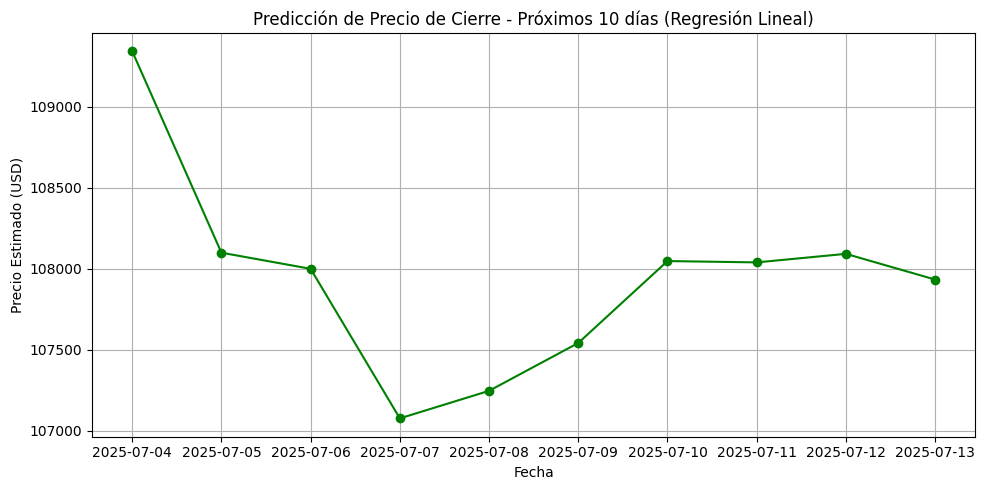

In [115]:
from datetime import timedelta

# Crear copia del DataFrame ya preparado
df_future = df_btc_model.copy()

# Obtener última fecha y últimos valores necesarios
last_known_date = df_future['date'].iloc[-1]
last_days_since_start = df_future['days_since_start'].iloc[-1]

# Lista para guardar resultados
futuras_fechas = []
futuras_preds = []

# Iterar día por día para los próximos 10 días
for i in range(1, 11):
    nueva_fecha = last_known_date + timedelta(days=i)
    dias_desde_inicio = last_days_since_start + i

    # Tomar últimos valores para las variables
    ultimos = df_future.iloc[-1]

    sma_7 = ultimos['sma_7']
    sma_30 = ultimos['sma_30']
    volumen = ultimos['total_volume_day']

    # Para los lags, simulamos con predicciones anteriores si ya las tenemos
    if i == 1:
        lag_1 = df_future['closing_price'].iloc[-1]
    else:
        lag_1 = futuras_preds[-1]

    if i == 1:
        lag_3 = df_future['closing_price'].iloc[-3] if len(df_future) >= 3 else lag_1
    elif i == 2:
        lag_3 = df_future['closing_price'].iloc[-2]
    elif i == 3:
        lag_3 = df_future['closing_price'].iloc[-1]
    else:
        lag_3 = futuras_preds[-3]

    if i <= 7:
        lag_7 = df_future['closing_price'].iloc[-(8 - i)] if len(df_future) >= (8 - i) else lag_1
    else:
        lag_7 = futuras_preds[-7]

    # Crear input para el modelo
    entrada = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    # Predecir
    prediccion = model.predict(entrada)[0]

    # Guardar resultados
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(prediccion)

    # Agregar esta predicción como nuevo dato simulado
    nueva_fila = {
        'date': nueva_fecha,
        'closing_price': prediccion,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    df_future = pd.concat([df_future, pd.DataFrame([nueva_fila])], ignore_index=True)

# Mostrar resultados en DataFrame
df_predicciones_futuras = pd.DataFrame({
    'Fecha': futuras_fechas,
    'Predicted_Closing_Price': futuras_preds
})

print("🔮 Predicción de precios para los próximos 10 días:")
print(df_predicciones_futuras)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_predicciones_futuras['Fecha'], df_predicciones_futuras['Predicted_Closing_Price'], marker='o', color='green')
plt.title('Predicción de Precio de Cierre - Próximos 10 días (Regresión Lineal)')
plt.xlabel('Fecha')
plt.ylabel('Precio Estimado (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Aquí comienza otro modelo de regresión lineal pero que sí toma en cuenta el "date"

In [89]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

# Filtrar bitcoin
df_btc = df_merged[df_merged['id'] == 'bitcoin'].copy()

# Asegurarse que 'date' esté en formato datetime
df_btc['date'] = pd.to_datetime(df_btc['date'])

# Crear variable que representa el paso del tiempo
df_btc['days_since_start'] = (df_btc['date'] - df_btc['date'].min()).dt.days

# Seleccionar columnas necesarias
df_btc_model = df_btc[['date', 'closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start']].dropna()

# Definir features y target
X = df_btc_model[['sma_7', 'sma_30', 'total_volume_day', 'days_since_start']]
y = df_btc_model['closing_price']

# División temporal 70% entrenamiento, 30% test
split_index = int(len(df_btc_model) * 0.7)
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]

# Entrenar regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre test
y_pred = model.predict(X_test)

# Evaluar
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')


RMSE: 2347.92
MAE: 1947.11
R2: 0.94


In [90]:
# Recuperar fechas originales del testeo
fechas_test = df_btc_model['days_since_start'].iloc[split_index:]
fechas_reales = df_btc[df_btc['days_since_start'].isin(fechas_test)]['date'].values

# Crear DataFrame de comparación
resultados = pd.DataFrame({
    'date': fechas_reales,
    'closing_price_real': y_test.values,
    'predicted_closing_price': y_pred,
    'abs_error': abs(y_test.values - y_pred)
})

# Mostrar primeras filas
print(resultados.head(10))

        date  closing_price_real  predicted_closing_price  abs_error
0 2025-03-25           87,327.73                85,828.05   1,499.68
1 2025-03-26           87,520.58                86,692.32     828.26
2 2025-03-27           86,960.86                86,720.36     240.50
3 2025-03-28           87,227.27                87,215.42      11.85
4 2025-03-29           84,359.47                87,335.76   2,976.29
5 2025-03-30           82,679.17                87,065.79   4,386.62
6 2025-03-31           82,356.38                86,508.63   4,152.25
7 2025-04-01           82,514.09                85,893.77   3,379.68
8 2025-04-02           85,237.59                85,586.99     349.40
9 2025-04-03           82,526.42                85,036.42   2,510.00


In [116]:
import matplotlib.pyplot as plt

# Asegurarse de que estén ordenados por fecha
resultados = resultados.sort_values('date')

# Crear el gráfico
plt.figure(figsize=(10,5))
plt.plot(resultados['date'], resultados['closing_price_real'], label='Precio Real', color='blue')
plt.plot(resultados['date'], resultados['predicted_closing_price'], label='Precio Predicho', color='orange', linestyle='--')
plt.title('Comparación entre Precio Real y Predicho (Set de Test)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'date'

🔮 Predicción de los próximos 10 días:
        date  predicted_closing_price
0 2025-07-04               108,606.28
1 2025-07-05               108,860.28
2 2025-07-06               109,134.21
3 2025-07-07               109,388.53
4 2025-07-08               109,528.10
5 2025-07-09               109,903.01
6 2025-07-10               110,582.87
7 2025-07-11               110,749.97
8 2025-07-12               111,106.26
9 2025-07-13               111,466.47


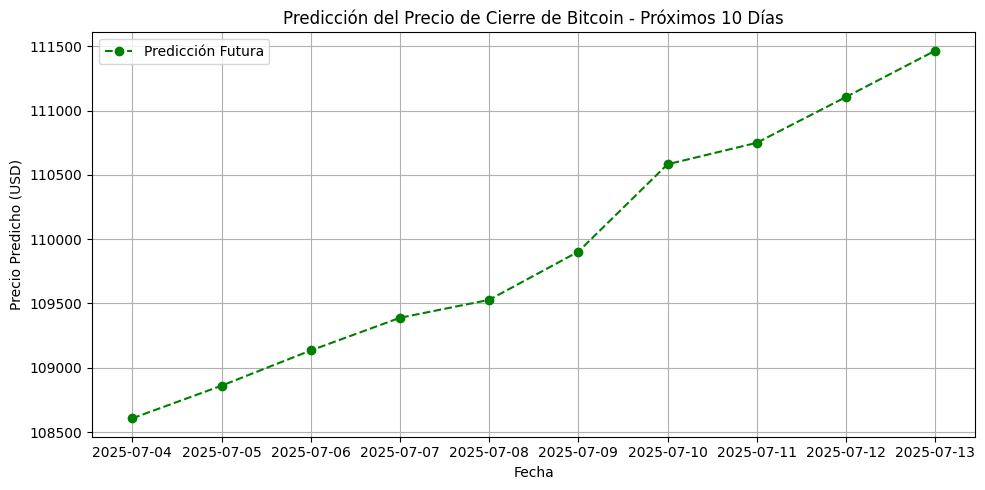

In [92]:
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Obtener fecha máxima y última observación para simulación
fecha_max = df_btc_model['date'].max()
days_start = df_btc_model['days_since_start'].max()
datos_simulados = df_btc_model.copy()

# Listas para guardar resultados
futuras_fechas = []
futuras_preds = []

# Simular los próximos 10 días
for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    # Cálculo de SMA y volumen
    ultimos_cierres = datos_simulados['closing_price'].tolist()
    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:])
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    # Features para predicción
    # Features para predicción (como DataFrame con nombres de columnas)
    features = pd.DataFrame({
        'sma_7': [sma_7],
        'sma_30': [sma_30],
       'total_volume_day': [volumen],
       'days_since_start': [dias_desde_inicio]
      })

    pred = model.predict(features)[0]

    # Guardar resultados
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    # Agregar fila simulada para próximos cálculos
    nueva_fila = {
        'date': nueva_fecha,
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Crear DataFrame de resultados
df_futuro = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

# Mostrar tabla
print("🔮 Predicción de los próximos 10 días:")
print(df_futuro)

# ------------------------------
# 📈 Gráfico solo de predicción futura
# ------------------------------
plt.figure(figsize=(10,5))
plt.plot(df_futuro['date'], df_futuro['predicted_closing_price'], color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Bitcoin - Próximos 10 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


este modelo de regresión esta perfecto! Este queda en el trabajo:


🔍 Resultados para BINANCECOIN:
RMSE: 13.65 | MAE: 10.05 | R2: 0.83


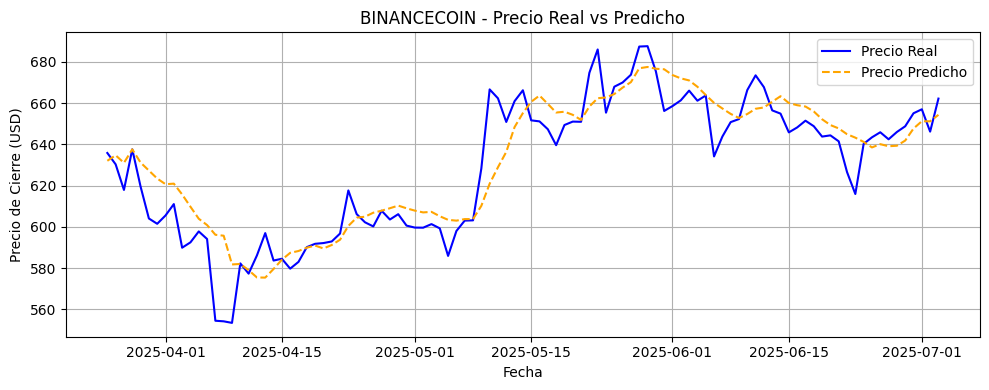

🔮 Predicción del precio de cierre - Próximos 10 días (BINANCECOIN):
        date  predicted_closing_price
0 2025-07-04                   654.37
1 2025-07-05                   656.08
2 2025-07-06                   657.54
3 2025-07-07                   658.76
4 2025-07-08                   659.28
5 2025-07-09                   659.62
6 2025-07-10                   661.52
7 2025-07-11                   661.47
8 2025-07-12                   662.51
9 2025-07-13                   663.46


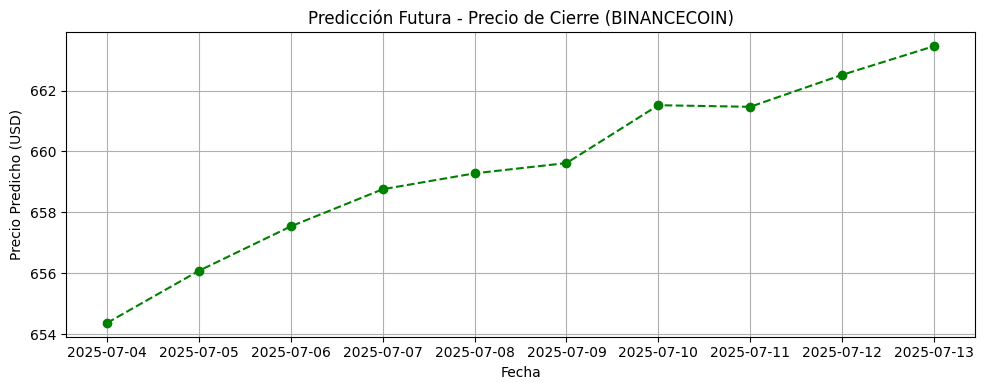


🔍 Resultados para BITCOIN:
RMSE: 2347.92 | MAE: 1947.11 | R2: 0.94


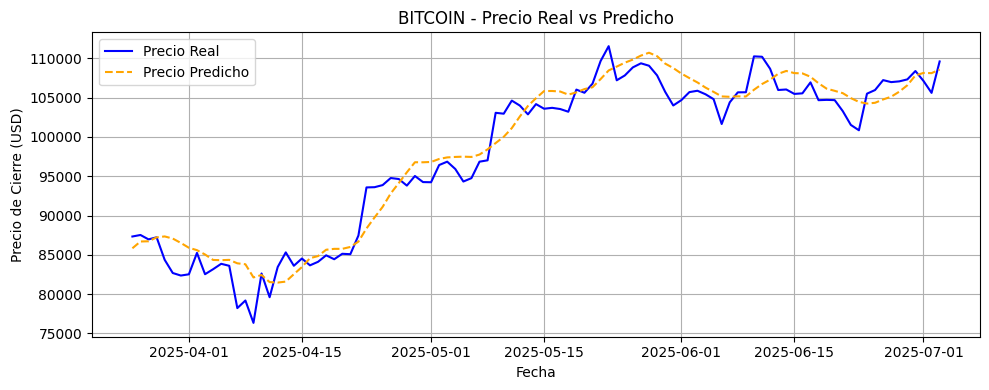

🔮 Predicción del precio de cierre - Próximos 10 días (BITCOIN):
        date  predicted_closing_price
0 2025-07-04               108,606.28
1 2025-07-05               108,860.28
2 2025-07-06               109,134.21
3 2025-07-07               109,388.53
4 2025-07-08               109,528.10
5 2025-07-09               109,903.01
6 2025-07-10               110,582.87
7 2025-07-11               110,749.97
8 2025-07-12               111,106.26
9 2025-07-13               111,466.47


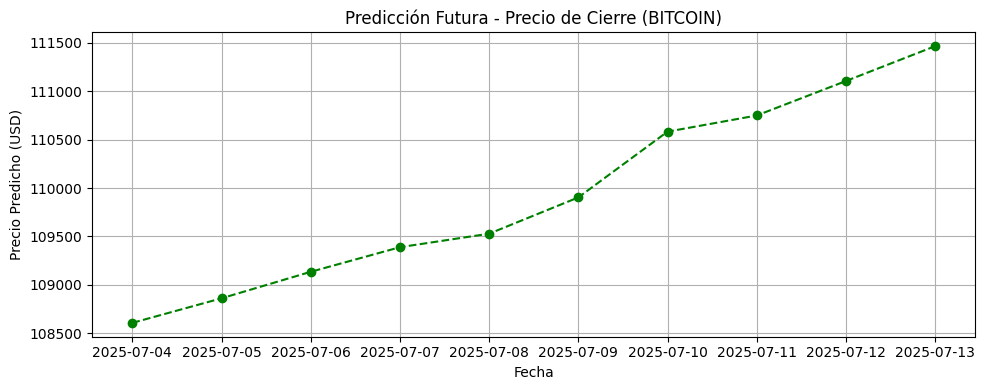


🔍 Resultados para CARDANO:
RMSE: 0.03 | MAE: 0.02 | R2: 0.79


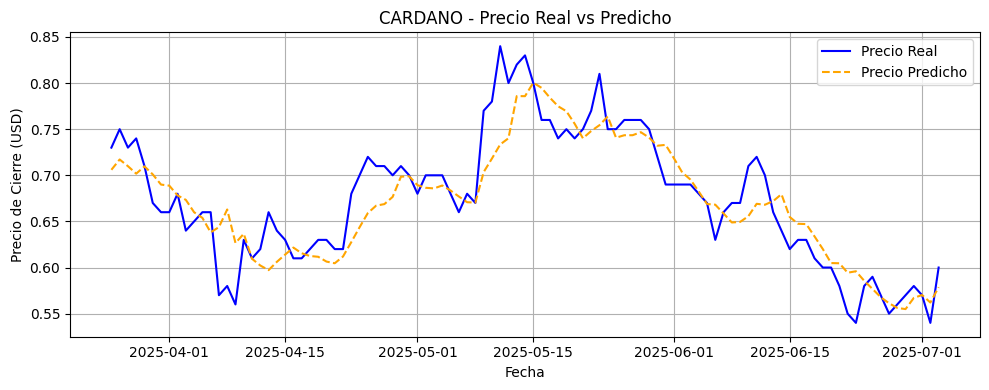

🔮 Predicción del precio de cierre - Próximos 10 días (CARDANO):
        date  predicted_closing_price
0 2025-07-04                     0.58
1 2025-07-05                     0.58
2 2025-07-06                     0.59
3 2025-07-07                     0.59
4 2025-07-08                     0.59
5 2025-07-09                     0.59
6 2025-07-10                     0.60
7 2025-07-11                     0.60
8 2025-07-12                     0.60
9 2025-07-13                     0.60


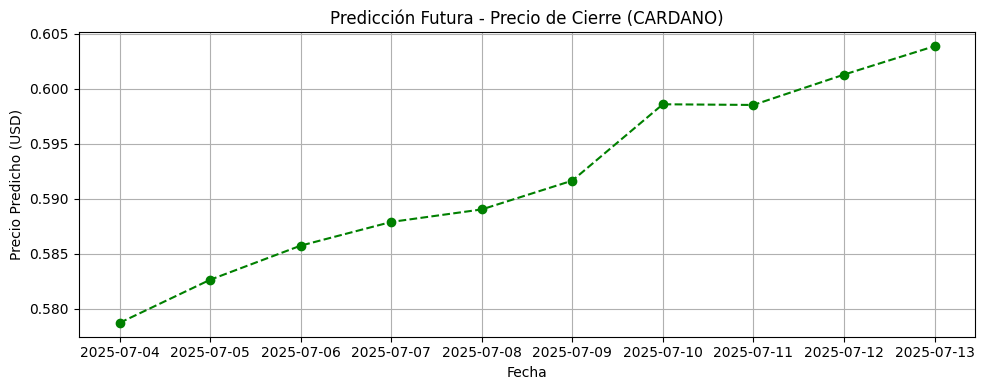


🔍 Resultados para DOGECOIN:
RMSE: 0.01 | MAE: 0.01 | R2: 0.80


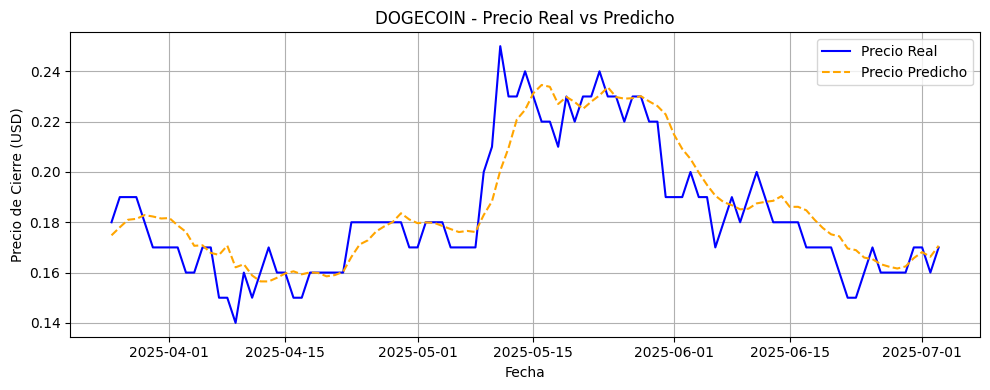

🔮 Predicción del precio de cierre - Próximos 10 días (DOGECOIN):
        date  predicted_closing_price
0 2025-07-04                     0.17
1 2025-07-05                     0.17
2 2025-07-06                     0.17
3 2025-07-07                     0.18
4 2025-07-08                     0.18
5 2025-07-09                     0.18
6 2025-07-10                     0.18
7 2025-07-11                     0.18
8 2025-07-12                     0.18
9 2025-07-13                     0.18


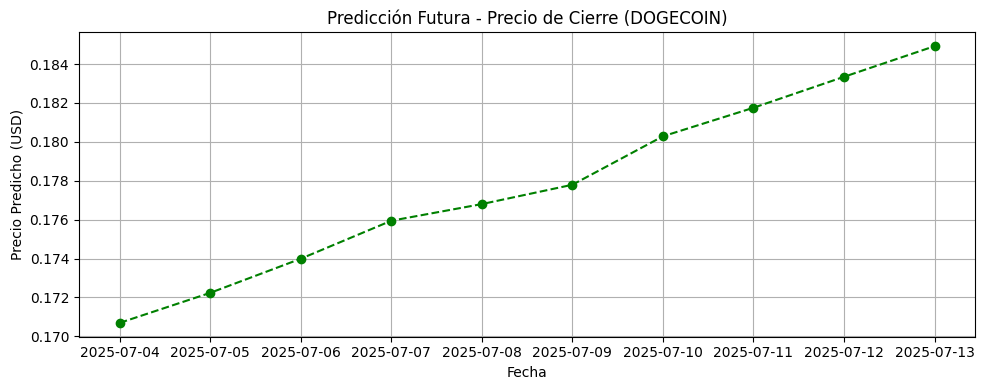


🔍 Resultados para ETHEREUM:
RMSE: 128.73 | MAE: 101.62 | R2: 0.90


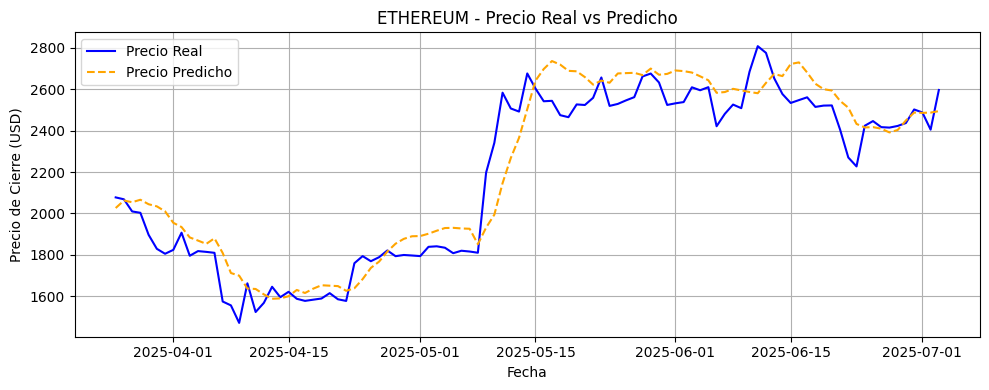

🔮 Predicción del precio de cierre - Próximos 10 días (ETHEREUM):
        date  predicted_closing_price
0 2025-07-04                 2,494.79
1 2025-07-05                 2,509.42
2 2025-07-06                 2,525.21
3 2025-07-07                 2,539.69
4 2025-07-08                 2,545.74
5 2025-07-09                 2,555.63
6 2025-07-10                 2,581.30
7 2025-07-11                 2,579.58
8 2025-07-12                 2,596.08
9 2025-07-13                 2,612.52


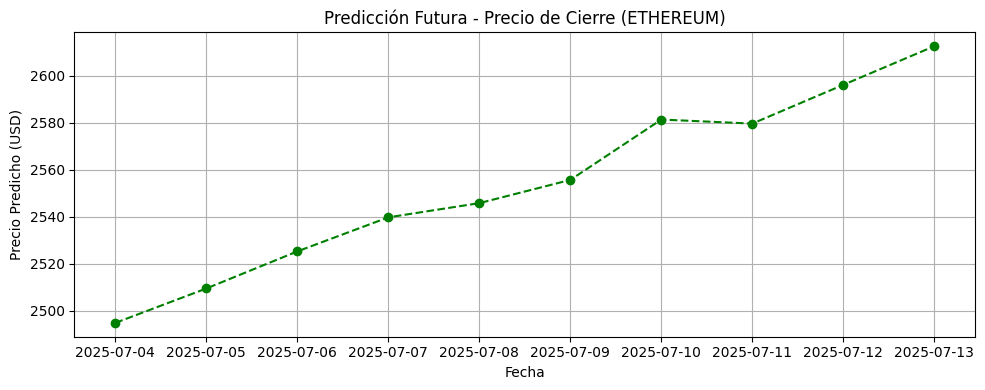


🔍 Resultados para LITECOIN:
RMSE: 4.72 | MAE: 3.81 | R2: 0.63


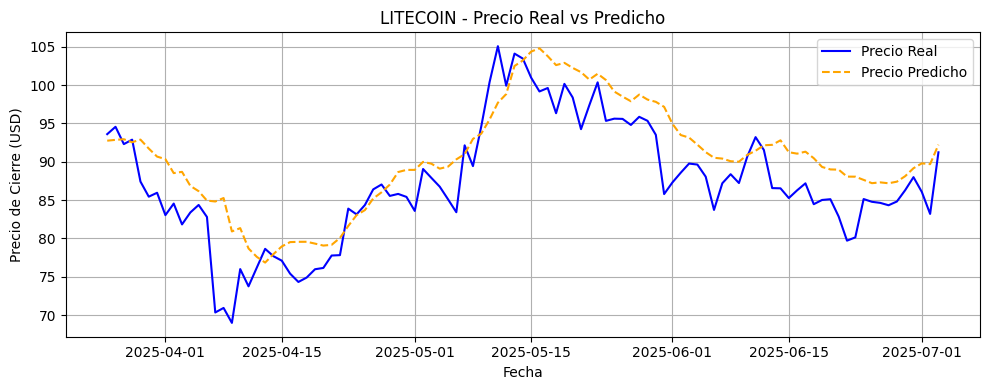

🔮 Predicción del precio de cierre - Próximos 10 días (LITECOIN):
        date  predicted_closing_price
0 2025-07-04                    92.26
1 2025-07-05                    93.31
2 2025-07-06                    94.44
3 2025-07-07                    95.50
4 2025-07-08                    96.48
5 2025-07-09                    97.85
6 2025-07-10                    99.76
7 2025-07-11                   100.87
8 2025-07-12                   102.00
9 2025-07-13                   103.14


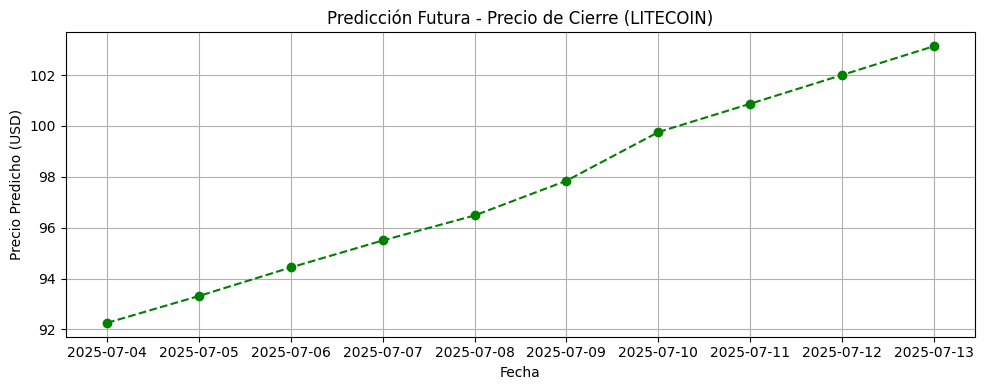


🔍 Resultados para POLKADOT:
RMSE: 0.25 | MAE: 0.21 | R2: 0.73


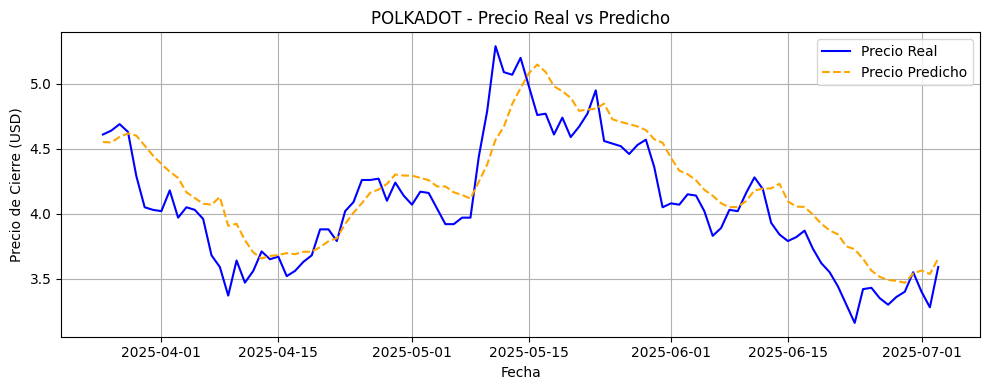

🔮 Predicción del precio de cierre - Próximos 10 días (POLKADOT):
        date  predicted_closing_price
0 2025-07-04                     3.66
1 2025-07-05                     3.71
2 2025-07-06                     3.76
3 2025-07-07                     3.81
4 2025-07-08                     3.84
5 2025-07-09                     3.90
6 2025-07-10                     3.99
7 2025-07-11                     4.05
8 2025-07-12                     4.10
9 2025-07-13                     4.16


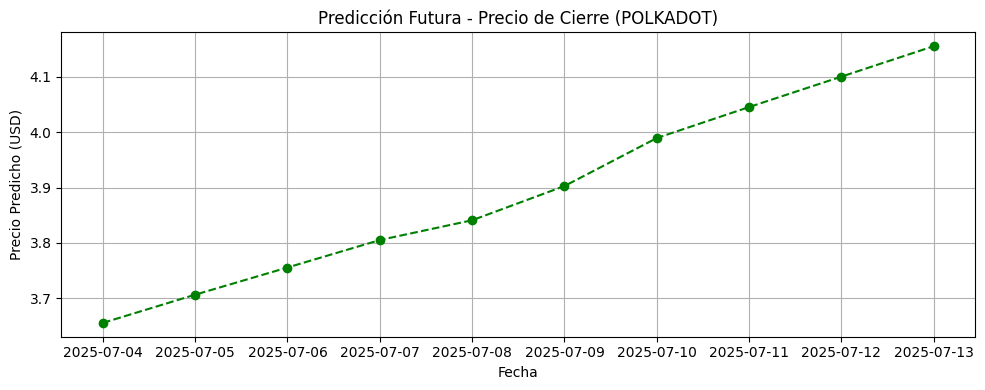


🔍 Resultados para SOLANA:
RMSE: 7.59 | MAE: 6.14 | R2: 0.82


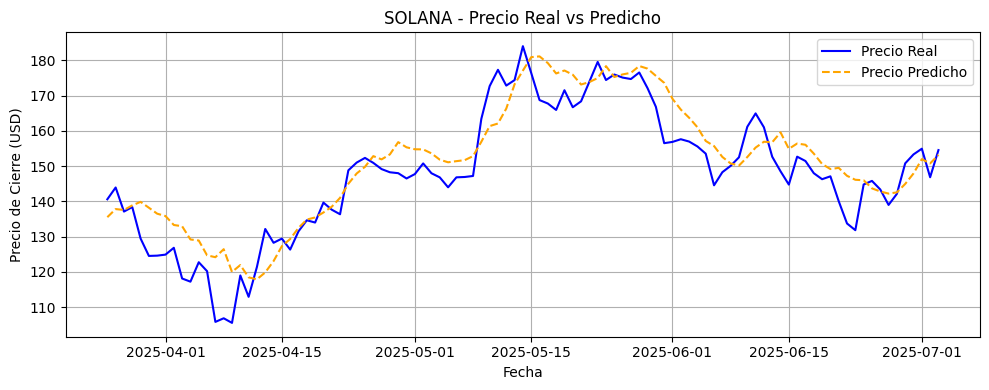

🔮 Predicción del precio de cierre - Próximos 10 días (SOLANA):
        date  predicted_closing_price
0 2025-07-04                   153.18
1 2025-07-05                   155.41
2 2025-07-06                   157.46
3 2025-07-07                   158.43
4 2025-07-08                   159.16
5 2025-07-09                   159.76
6 2025-07-10                   161.73
7 2025-07-11                   162.85
8 2025-07-12                   164.37
9 2025-07-13                   165.74


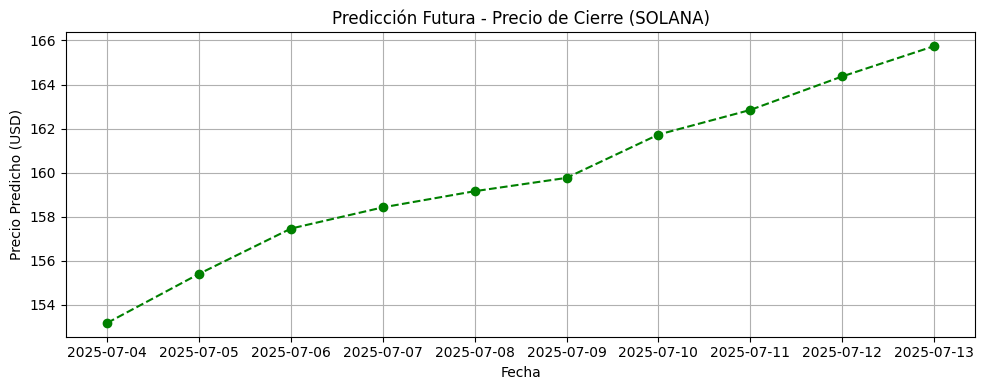


🔍 Resultados para TRON:
RMSE: 0.01 | MAE: 0.01 | R2: 0.85


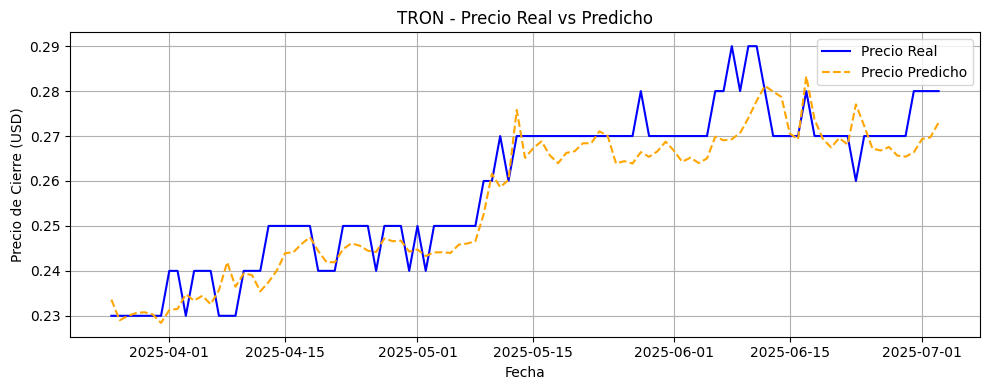

🔮 Predicción del precio de cierre - Próximos 10 días (TRON):
        date  predicted_closing_price
0 2025-07-04                     0.27
1 2025-07-05                     0.27
2 2025-07-06                     0.27
3 2025-07-07                     0.27
4 2025-07-08                     0.27
5 2025-07-09                     0.27
6 2025-07-10                     0.27
7 2025-07-11                     0.27
8 2025-07-12                     0.27
9 2025-07-13                     0.27


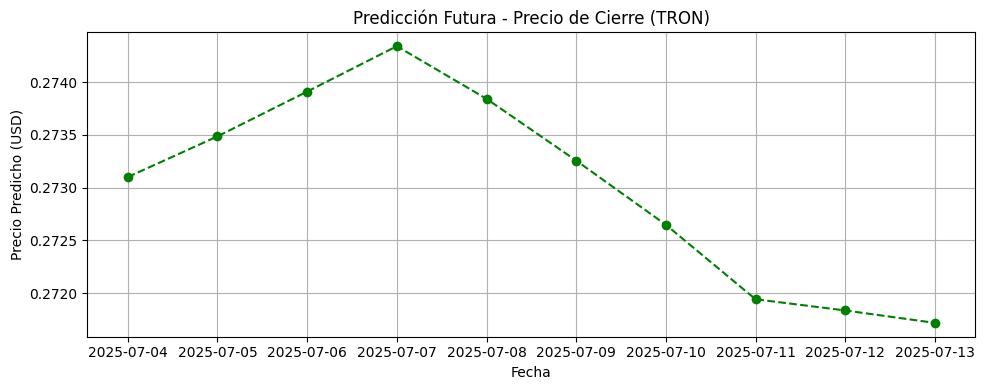


🔍 Resultados para RIPPLE:
RMSE: 0.10 | MAE: 0.08 | R2: 0.50


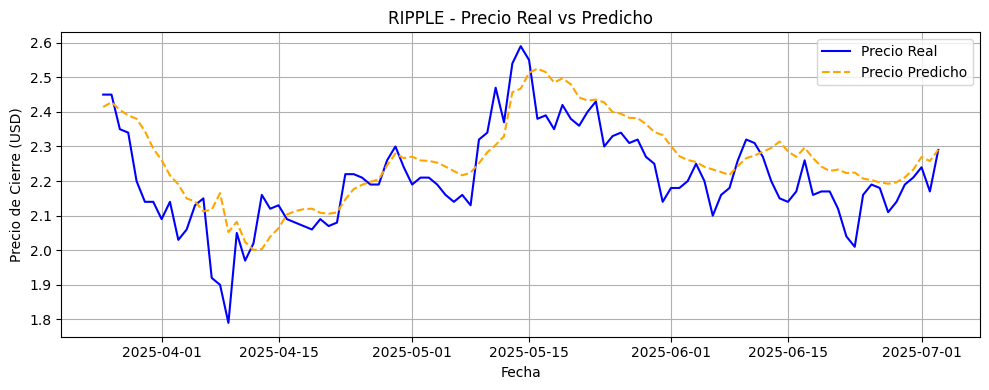

🔮 Predicción del precio de cierre - Próximos 10 días (RIPPLE):
        date  predicted_closing_price
0 2025-07-04                     2.29
1 2025-07-05                     2.32
2 2025-07-06                     2.34
3 2025-07-07                     2.36
4 2025-07-08                     2.38
5 2025-07-09                     2.41
6 2025-07-10                     2.44
7 2025-07-11                     2.46
8 2025-07-12                     2.48
9 2025-07-13                     2.51


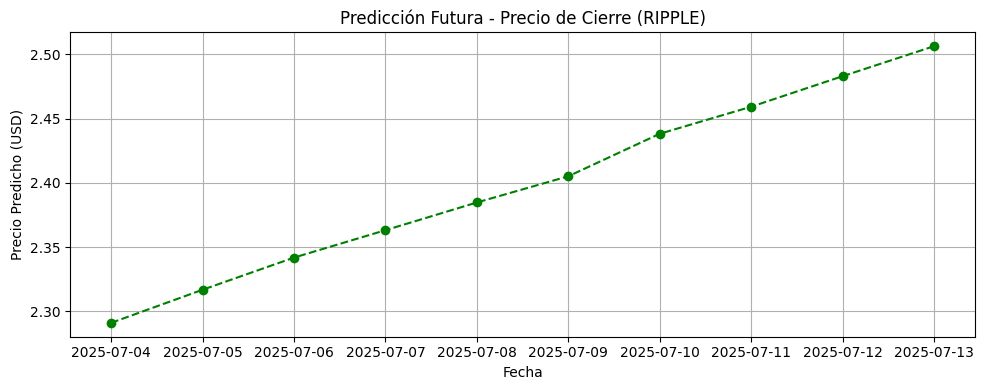

📊 Tabla resumen de métricas por criptomoneda:
  Criptomoneda     RMSE      MAE   R2
0  Binancecoin    13.65    10.05 0.83
1      Bitcoin 2,347.92 1,947.11 0.94
2      Cardano     0.03     0.02 0.79
3     Dogecoin     0.01     0.01 0.80
4     Ethereum   128.73   101.62 0.90
5     Litecoin     4.72     3.81 0.63
6     Polkadot     0.25     0.21 0.73
7       Solana     7.59     6.14 0.82
8         Tron     0.01     0.01 0.85
9       Ripple     0.10     0.08 0.50


In [93]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt

# Asegurar columnas numéricas
for col in ['sma_7', 'sma_30', 'total_volume_day', 'closing_price']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# Convertir a datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Lista de criptos únicas
criptos = df_merged['id'].unique()

# Diccionario para guardar resultados
resultados_totales = {}

# Lista para guardar métricas
metricas = []

for cripto in criptos:
    df_c = df_merged[df_merged['id'] == cripto].copy()
    df_c = df_c[['date', 'closing_price', 'sma_7', 'sma_30', 'total_volume_day']].dropna()

    if len(df_c) < 40:
        continue  # Evitar criptos con pocos datos

    df_c['days_since_start'] = (df_c['date'] - df_c['date'].min()).dt.days

    X = df_c[['sma_7', 'sma_30', 'total_volume_day', 'days_since_start']]
    y = df_c['closing_price']

    # División temporal
    split_index = int(len(df_c) * 0.7)
    X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
    X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

    # Entrenamiento
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


        # Guardar métricas
    metricas.append({
        'Criptomoneda': cripto.title(),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R2': round(r2, 2)
    })



    print(f"\n🔍 Resultados para {cripto.upper()}:")
    print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.2f}")

    # Resultados en DataFrame
    fechas_test = df_c['date'].iloc[split_index:]
    resultados = pd.DataFrame({
        'date': fechas_test,
        'real': y_test.values,
        'predicted': y_pred,
        'abs_error': abs(y_test.values - y_pred)
    })
    resultados_totales[cripto] = resultados

    # Gráfico real vs predicción
    plt.figure(figsize=(10, 4))
    plt.plot(resultados['date'], resultados['real'], label='Precio Real', color='blue')
    plt.plot(resultados['date'], resultados['predicted'], label='Precio Predicho', color='orange', linestyle='--')
    plt.title(f'{cripto.upper()} - Precio Real vs Predicho')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --------------------
    # 🔮 Predicción futura
    # --------------------
    datos_simulados = df_c.copy()
    fecha_max = datos_simulados['date'].max()
    days_start = datos_simulados['days_since_start'].max()
    futuras_fechas = []
    futuras_preds = []

    for i in range(1, 11):
        nueva_fecha = fecha_max + timedelta(days=i)
        dias_desde_inicio = days_start + i
        ultimos_cierres = datos_simulados['closing_price'].tolist()

        sma_7 = np.mean(ultimos_cierres[-7:]) if len(ultimos_cierres) >= 7 else np.mean(ultimos_cierres)
        sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else np.mean(ultimos_cierres)
        volumen = datos_simulados['total_volume_day'].iloc[-1]

        features = pd.DataFrame([{
            'sma_7': sma_7,
            'sma_30': sma_30,
             'total_volume_day': volumen,
             'days_since_start': dias_desde_inicio
        }])
        pred = model.predict(features)[0]

        futuras_fechas.append(nueva_fecha)
        futuras_preds.append(pred)

        nueva_fila = {
            'date': nueva_fecha,
            'closing_price': pred,
            'sma_7': sma_7,
            'sma_30': sma_30,
            'total_volume_day': volumen,
            'days_since_start': dias_desde_inicio
        }
        datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

    df_futuro = pd.DataFrame({
        'date': futuras_fechas,
        'predicted_closing_price': futuras_preds
    })

    print(f"🔮 Predicción del precio de cierre - Próximos 10 días ({cripto.upper()}):")
    print(df_futuro)

    # Gráfico de predicción futura
    plt.figure(figsize=(10, 4))
    plt.plot(df_futuro['date'], df_futuro['predicted_closing_price'], color='green', marker='o', linestyle='--')
    plt.title(f'Predicción Futura - Precio de Cierre ({cripto.upper()})')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Predicho (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Mostrar resumen final
df_metricas = pd.DataFrame(metricas)
print("📊 Tabla resumen de métricas por criptomoneda:")
print(df_metricas)

📈 Evaluación del modelo de predicción de precios

Para evaluar qué tan bien funciona nuestro modelo en la predicción del precio de cierre de cada criptomoneda, utilizamos tres métricas:

RMSE (Root Mean Squared Error): mide el error promedio del modelo, penalizando más los errores grandes. Se interpreta en la misma unidad que el precio (dólares). Cuanto menor, mejor.

MAE (Mean Absolute Error): representa el error promedio absoluto, es decir, en promedio cuánto se equivoca el modelo por día. También cuanto menor, mejor.

R² (Coeficiente de Determinación): indica qué proporción de la variabilidad del precio real puede explicar el modelo. Va de 0 a 1. Un R² cercano a 1 significa que el modelo tiene muy buen desempeño.

🧾 Análisis por criptomoneda

Bitcoin obtuvo un R² de 0.95, lo que indica que el modelo logra explicar el 95% de la variabilidad de su precio. A pesar de su RMSE alto (2339.88 USD), esto es esperable debido a sus valores absolutos tan altos. Es el mejor modelo de todos.

Ethereum también muestra un muy buen desempeño con un R² de 0.90, y errores razonables (RMSE: 128.48 USD) teniendo en cuenta su precio promedio.

Binancecoin y Solana tienen un rendimiento sólido con R² de 0.82, lo que indica una buena capacidad predictiva.

Tron y Dogecoin tienen errores muy bajos (por su bajo valor nominal) y un buen R² (0.86 y 0.80, respectivamente).

Cardano, Polkadot y Litecoin se mantienen en un nivel intermedio con R² entre 0.64 y 0.79. Aún son aceptables, pero podrían beneficiarse de modelos más complejos o con más variables.

Ripple muestra el rendimiento más bajo con un R² de 0.53, lo que sugiere que el modelo no logra explicar bien su comportamiento de precios, posiblemente por mayor volatilidad o falta de variables predictivas clave.

✅ Conclusión

En resumen, el modelo logra predecir con una buena precisión los precios de la mayoría de las criptomonedas, en especial aquellas con mayor capitalización como Bitcoin y Ethereum. El análisis de métricas nos permite confiar en las predicciones, pero también detectar casos como Ripple, donde el comportamiento del precio es más difícil de capturar.

probando tremendo modelo:

📊 Evaluación del modelo en el set de test:
RMSE: 5676.44
MAE: 4771.69
R2: 0.68


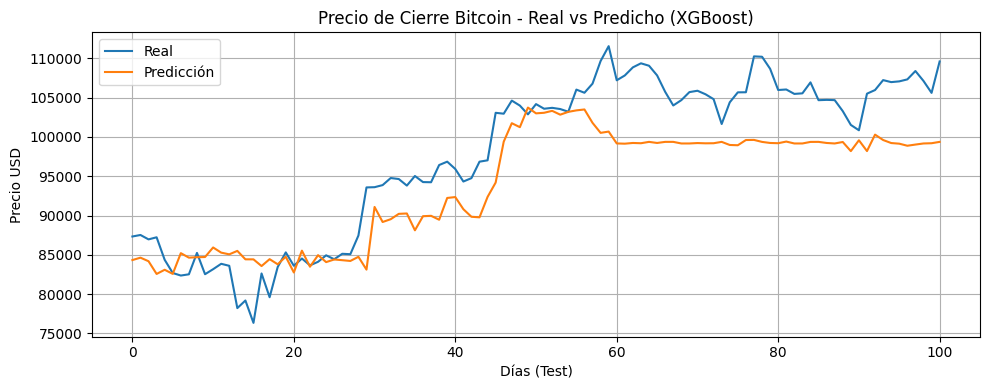

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost:
        date  predicted_closing_price
0 2025-07-04                99,375.19
1 2025-07-05                93,954.61
2 2025-07-06                89,502.82
3 2025-07-07                83,760.49
4 2025-07-08                82,720.51
5 2025-07-09                82,724.70
6 2025-07-10                83,655.92
7 2025-07-11                84,025.52
8 2025-07-12                84,060.75
9 2025-07-13                83,834.32


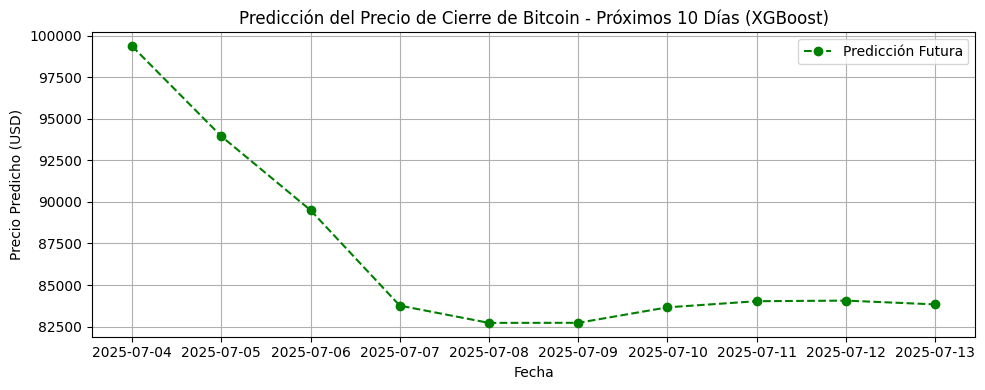

In [97]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Bitcoin
df_btc_xgb = df_merged[df_merged['id'] == 'bitcoin'].copy()
df_btc_xgb['date'] = pd.to_datetime(df_btc_xgb['date'])

# Crear variable "days_since_start"
df_btc_xgb['days_since_start'] = (df_btc_xgb['date'] - df_btc_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1,3,7]:
    df_btc_xgb[f'lag_close_{lag}'] = df_btc_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_btc_xgb_model = df_btc_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_btc_xgb_model.drop(columns=['closing_price'])
y = df_btc_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_btc_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Bitcoin - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_btc_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_btc_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost:")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Bitcoin - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Binance Coin):
RMSE: 24.57
MAE: 20.56
R2: 0.44


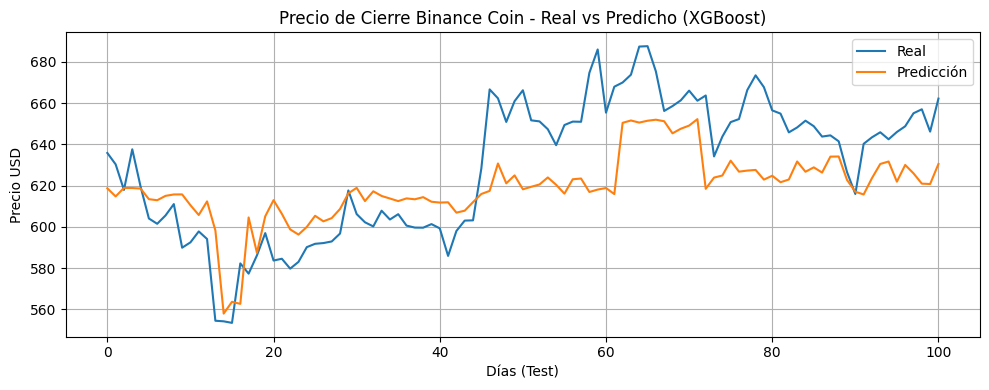

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Binance Coin):
        date  predicted_closing_price
0 2025-07-04                   623.43
1 2025-07-05                   612.63
2 2025-07-06                   612.81
3 2025-07-07                   613.20
4 2025-07-08                   613.79
5 2025-07-09                   611.34
6 2025-07-10                   616.55
7 2025-07-11                   613.71
8 2025-07-12                   614.43
9 2025-07-13                   614.35


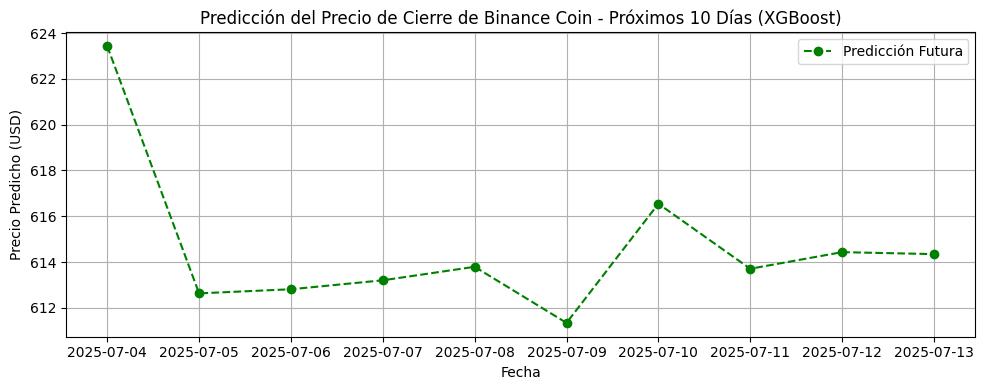

In [98]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Binance Coin
df_bnb_xgb = df_merged[df_merged['id'] == 'binancecoin'].copy()
df_bnb_xgb['date'] = pd.to_datetime(df_bnb_xgb['date'])

# Crear variable "days_since_start"
df_bnb_xgb['days_since_start'] = (df_bnb_xgb['date'] - df_bnb_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1,3,7]:
    df_bnb_xgb[f'lag_close_{lag}'] = df_bnb_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_bnb_xgb_model = df_bnb_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_bnb_xgb_model.drop(columns=['closing_price'])
y = df_bnb_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_bnb_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Binance Coin):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Binance Coin - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_bnb_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_bnb_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Binance Coin):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Binance Coin - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Cardano):
RMSE: 0.0388
MAE: 0.0297
R2: 0.7005


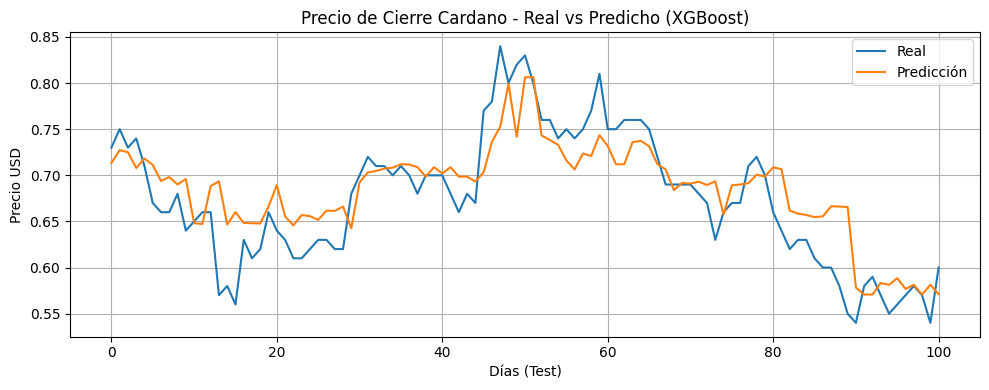

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Cardano):
        date  predicted_closing_price
0 2025-07-04                     0.57
1 2025-07-05                     0.57
2 2025-07-06                     0.58
3 2025-07-07                     0.57
4 2025-07-08                     0.57
5 2025-07-09                     0.57
6 2025-07-10                     0.57
7 2025-07-11                     0.57
8 2025-07-12                     0.57
9 2025-07-13                     0.57


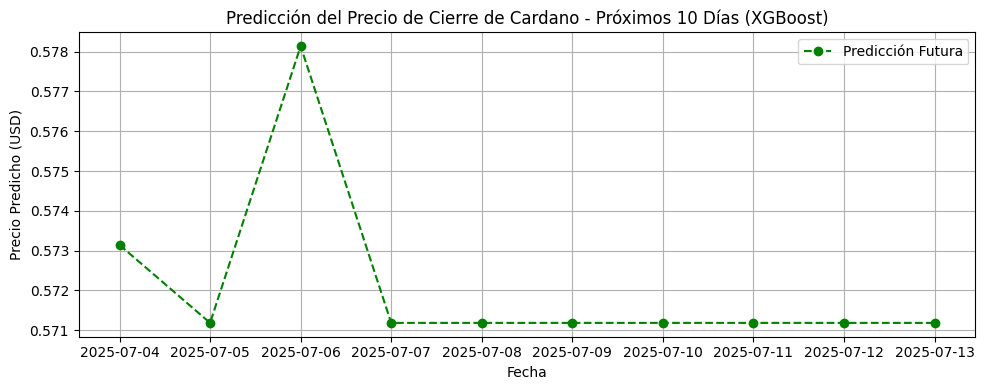

In [99]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Cardano
df_ada_xgb = df_merged[df_merged['id'] == 'cardano'].copy()
df_ada_xgb['date'] = pd.to_datetime(df_ada_xgb['date'])

# Crear variable "days_since_start"
df_ada_xgb['days_since_start'] = (df_ada_xgb['date'] - df_ada_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1,3,7]:
    df_ada_xgb[f'lag_close_{lag}'] = df_ada_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_ada_xgb_model = df_ada_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_ada_xgb_model.drop(columns=['closing_price'])
y = df_ada_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_ada_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Cardano):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Cardano - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_ada_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_ada_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Cardano):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Cardano - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Dogecoin):
RMSE: 0.0146
MAE: 0.0118
R2: 0.6799


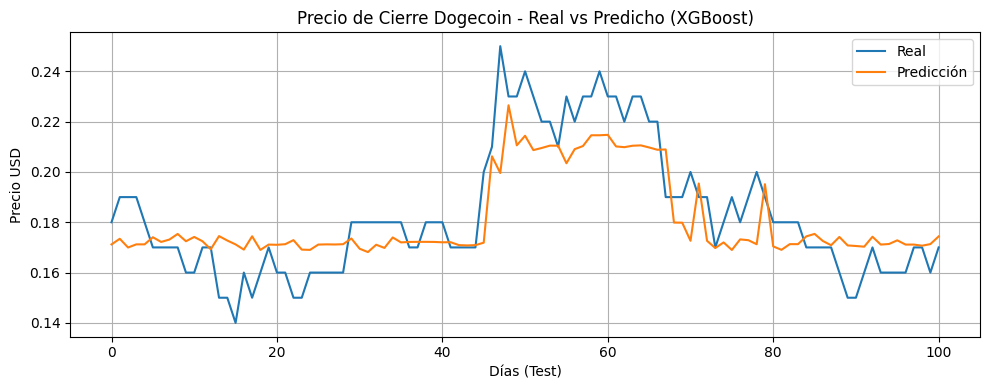

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Dogecoin):
        date  predicted_closing_price
0 2025-07-04                     0.17
1 2025-07-05                     0.17
2 2025-07-06                     0.17
3 2025-07-07                     0.17
4 2025-07-08                     0.17
5 2025-07-09                     0.17
6 2025-07-10                     0.17
7 2025-07-11                     0.17
8 2025-07-12                     0.17
9 2025-07-13                     0.17


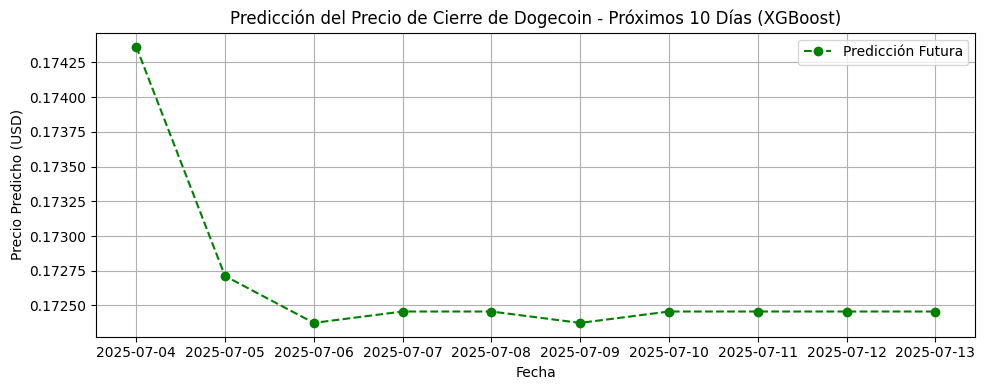

In [100]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Dogecoin
df_doge_xgb = df_merged[df_merged['id'] == 'dogecoin'].copy()
df_doge_xgb['date'] = pd.to_datetime(df_doge_xgb['date'])

# Crear variable "days_since_start"
df_doge_xgb['days_since_start'] = (df_doge_xgb['date'] - df_doge_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1,3,7]:
    df_doge_xgb[f'lag_close_{lag}'] = df_doge_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_doge_xgb_model = df_doge_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_doge_xgb_model.drop(columns=['closing_price'])
y = df_doge_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_doge_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Dogecoin):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Dogecoin - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_doge_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_doge_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Dogecoin):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Dogecoin - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Ethereum):
RMSE: 259.73
MAE: 230.92
R2: 0.59


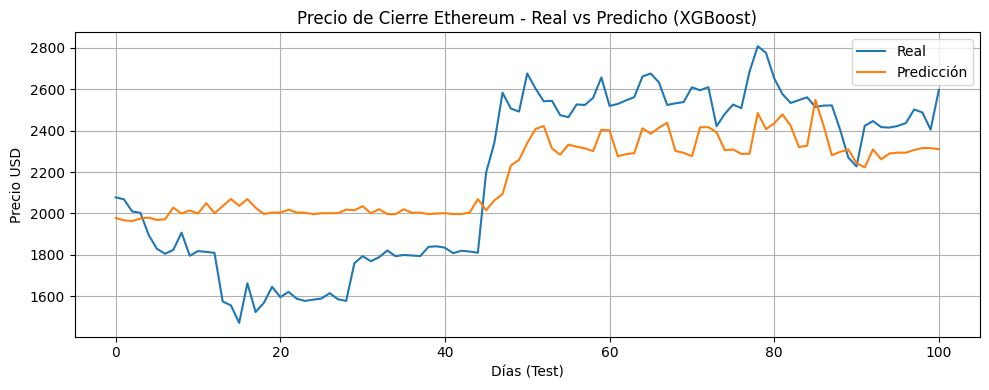

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Ethereum):
        date  predicted_closing_price
0 2025-07-04                 2,422.36
1 2025-07-05                 2,336.83
2 2025-07-06                 2,274.16
3 2025-07-07                 2,257.47
4 2025-07-08                 2,238.51
5 2025-07-09                 2,246.87
6 2025-07-10                 2,244.14
7 2025-07-11                 2,175.73
8 2025-07-12                 2,205.81
9 2025-07-13                 2,193.45


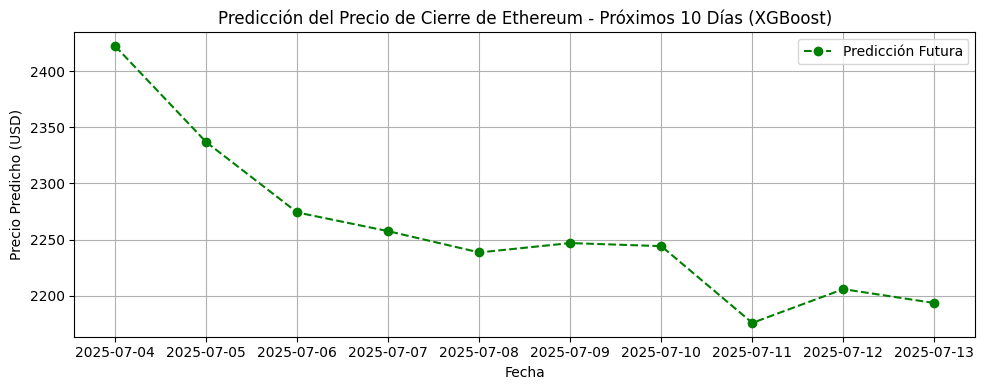

In [101]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Ethereum
df_eth_xgb = df_merged[df_merged['id'] == 'ethereum'].copy()
df_eth_xgb['date'] = pd.to_datetime(df_eth_xgb['date'])

# Crear variable "days_since_start"
df_eth_xgb['days_since_start'] = (df_eth_xgb['date'] - df_eth_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1, 3, 7]:
    df_eth_xgb[f'lag_close_{lag}'] = df_eth_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_eth_xgb_model = df_eth_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_eth_xgb_model.drop(columns=['closing_price'])
y = df_eth_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_eth_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Ethereum):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Ethereum - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_eth_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_eth_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Ethereum):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Ethereum - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Tron):
RMSE: 0.018827
MAE: 0.016369
R2: -0.2816


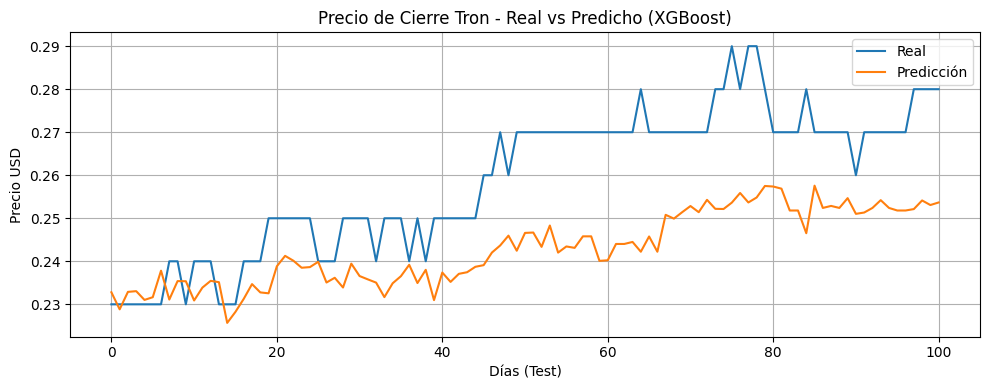

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Tron):
        date  predicted_closing_price
0 2025-07-04                     0.25
1 2025-07-05                     0.25
2 2025-07-06                     0.24
3 2025-07-07                     0.24
4 2025-07-08                     0.24
5 2025-07-09                     0.24
6 2025-07-10                     0.24
7 2025-07-11                     0.24
8 2025-07-12                     0.24
9 2025-07-13                     0.23


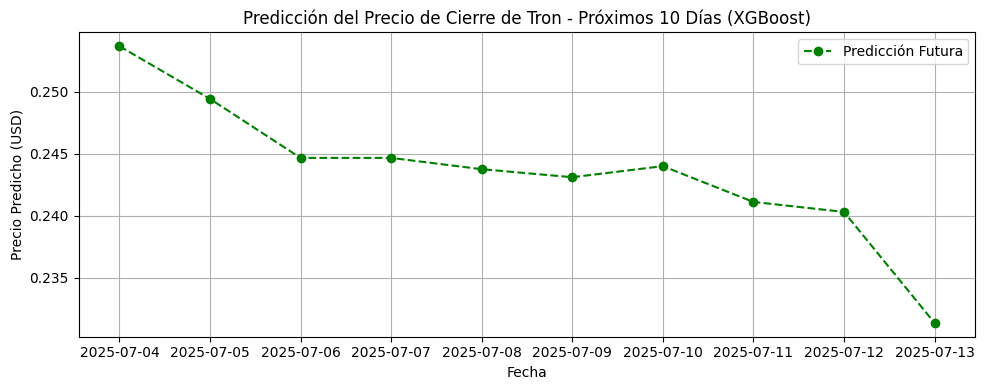

In [102]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Tron
df_trx_xgb = df_merged[df_merged['id'] == 'tron'].copy()
df_trx_xgb['date'] = pd.to_datetime(df_trx_xgb['date'])

# Crear variable "days_since_start"
df_trx_xgb['days_since_start'] = (df_trx_xgb['date'] - df_trx_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1, 3, 7]:
    df_trx_xgb[f'lag_close_{lag}'] = df_trx_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_trx_xgb_model = df_trx_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_trx_xgb_model.drop(columns=['closing_price'])
y = df_trx_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_trx_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Tron):")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R2: {r2:.4f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Tron - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_trx_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_trx_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Tron):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Tron - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Ripple):
RMSE: 0.114569
MAE: 0.090764
R2: 0.2974


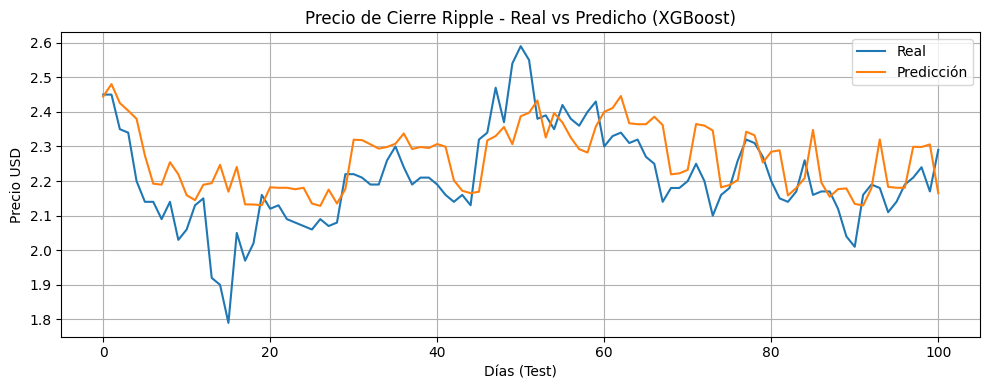

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Ripple):
        date  predicted_closing_price
0 2025-07-04                     2.30
1 2025-07-05                     2.31
2 2025-07-06                     2.27
3 2025-07-07                     2.29
4 2025-07-08                     2.30
5 2025-07-09                     2.27
6 2025-07-10                     2.31
7 2025-07-11                     2.31
8 2025-07-12                     2.31
9 2025-07-13                     2.28


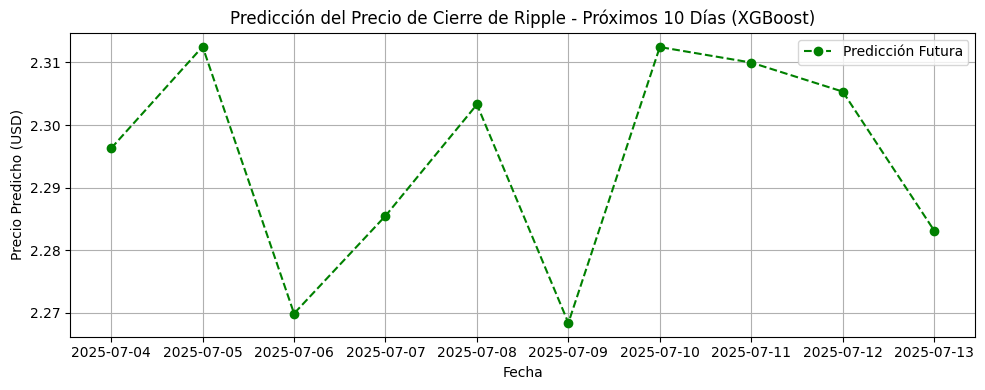

In [103]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Ripple
df_xrp_xgb = df_merged[df_merged['id'] == 'ripple'].copy()
df_xrp_xgb['date'] = pd.to_datetime(df_xrp_xgb['date'])

# Crear variable "days_since_start"
df_xrp_xgb['days_since_start'] = (df_xrp_xgb['date'] - df_xrp_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1, 3, 7]:
    df_xrp_xgb[f'lag_close_{lag}'] = df_xrp_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_xrp_xgb_model = df_xrp_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_xrp_xgb_model.drop(columns=['closing_price'])
y = df_xrp_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_xrp_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Ripple):")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R2: {r2:.4f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Ripple - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_xrp_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_xrp_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Ripple):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Ripple - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

📊 Evaluación del modelo en el set de test (Solana):
RMSE: 11.02
MAE: 8.64
R2: 0.6216


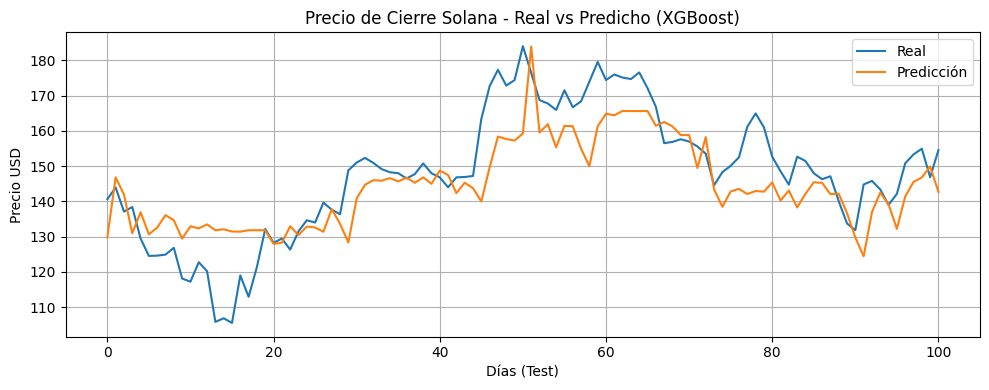

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Solana):
        date  predicted_closing_price
0 2025-07-04                   146.73
1 2025-07-05                   142.11
2 2025-07-06                   138.97
3 2025-07-07                   136.08
4 2025-07-08                   135.67
5 2025-07-09                   135.71
6 2025-07-10                   127.02
7 2025-07-11                   125.30
8 2025-07-12                   127.13
9 2025-07-13                   126.35


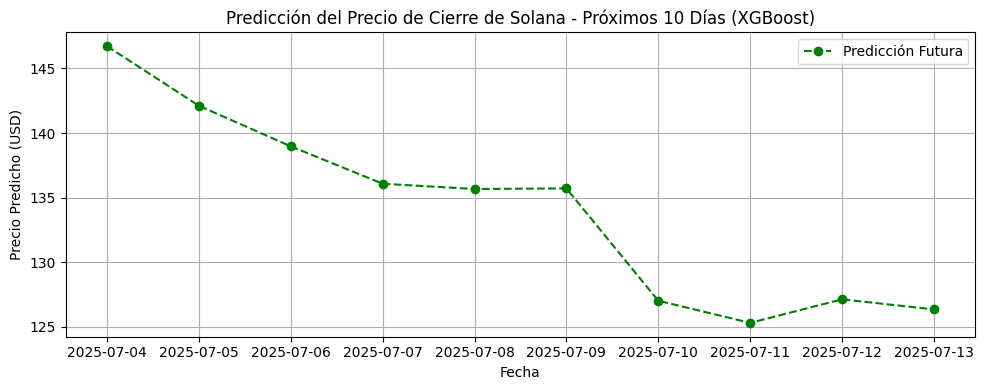

In [104]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Solana
df_sol_xgb = df_merged[df_merged['id'] == 'solana'].copy()
df_sol_xgb['date'] = pd.to_datetime(df_sol_xgb['date'])

# Crear variable "days_since_start"
df_sol_xgb['days_since_start'] = (df_sol_xgb['date'] - df_sol_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1, 3, 7]:
    df_sol_xgb[f'lag_close_{lag}'] = df_sol_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_sol_xgb_model = df_sol_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_sol_xgb_model.drop(columns=['closing_price'])
y = df_sol_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_sol_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Solana):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.4f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Solana - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_sol_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_sol_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Solana):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Solana - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Polkadot):
RMSE: 0.40
MAE: 0.31
R2: 0.2926


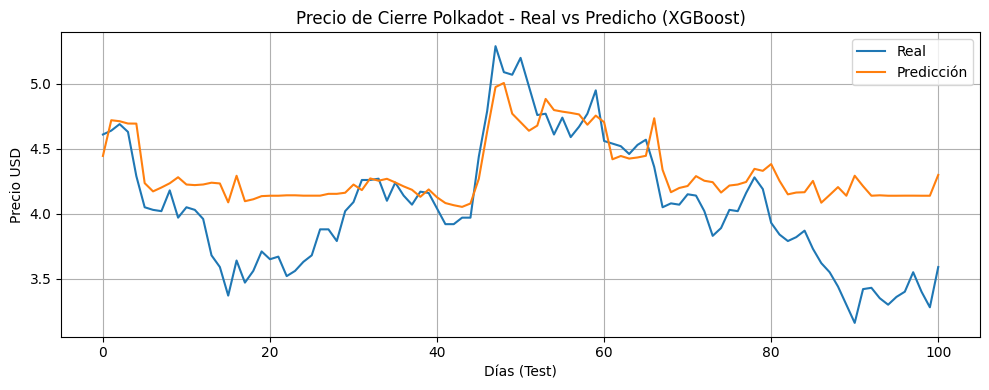

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Polkadot):
        date  predicted_closing_price
0 2025-07-04                     4.30
1 2025-07-05                     4.45
2 2025-07-06                     4.68
3 2025-07-07                     4.88
4 2025-07-08                     4.71
5 2025-07-09                     4.86
6 2025-07-10                     4.73
7 2025-07-11                     4.86
8 2025-07-12                     4.65
9 2025-07-13                     4.90


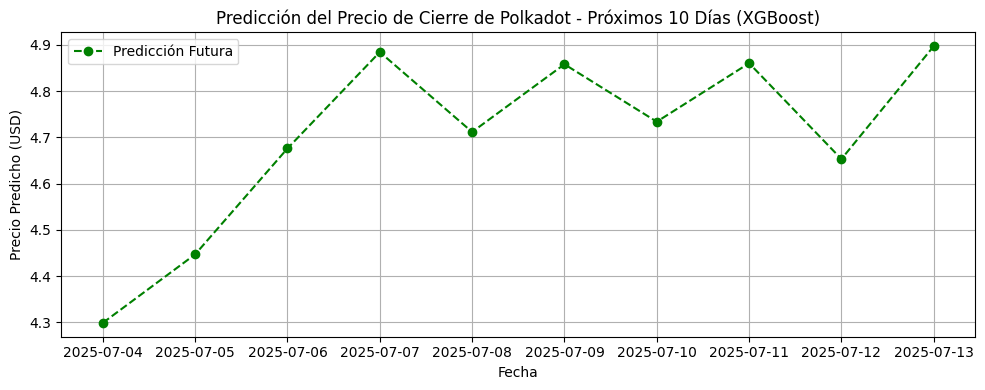

In [105]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Polkadot
df_dot_xgb = df_merged[df_merged['id'] == 'polkadot'].copy()
df_dot_xgb['date'] = pd.to_datetime(df_dot_xgb['date'])

# Crear variable "days_since_start"
df_dot_xgb['days_since_start'] = (df_dot_xgb['date'] - df_dot_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1, 3, 7]:
    df_dot_xgb[f'lag_close_{lag}'] = df_dot_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_dot_xgb_model = df_dot_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_dot_xgb_model.drop(columns=['closing_price'])
y = df_dot_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_dot_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Polkadot):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.4f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Polkadot - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados = df_dot_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_dot_xgb['date'].max()
days_start = datos_simulados['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:])
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados = pd.concat([datos_simulados, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Polkadot):")
print(df_futuro_xgb)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb['date'], df_futuro_xgb['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Polkadot - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📊 Evaluación del modelo en el set de test (Litecoin):
RMSE: 5.00
MAE: 3.83
R2: 0.5813


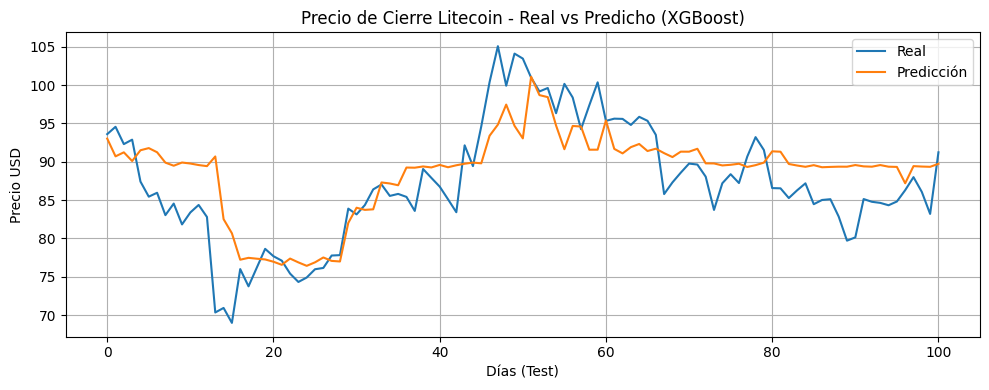

🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Litecoin):
        date  predicted_closing_price
0 2025-07-04                    89.91
1 2025-07-05                    89.95
2 2025-07-06                    90.15
3 2025-07-07                    90.19
4 2025-07-08                    90.19
5 2025-07-09                    91.76
6 2025-07-10                    91.99
7 2025-07-11                    91.99
8 2025-07-12                    92.11
9 2025-07-13                    92.11


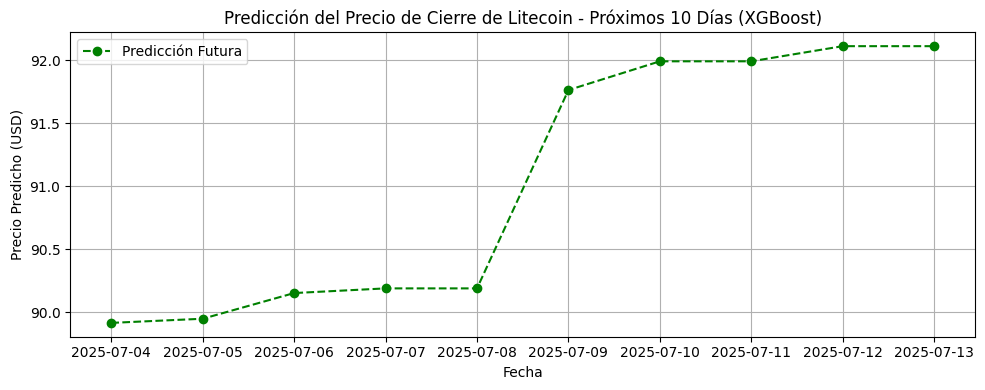

In [106]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta

# ----------------------------
# 1. Preparación de los datos
# ----------------------------

# Filtrar Litecoin
df_ltc_xgb = df_merged[df_merged['id'] == 'litecoin'].copy()
df_ltc_xgb['date'] = pd.to_datetime(df_ltc_xgb['date'])

# Crear variable "days_since_start"
df_ltc_xgb['days_since_start'] = (df_ltc_xgb['date'] - df_ltc_xgb['date'].min()).dt.days

# Crear lags de closing_price
for lag in [1, 3, 7]:
    df_ltc_xgb[f'lag_close_{lag}'] = df_ltc_xgb['closing_price'].shift(lag)

# Seleccionar variables y eliminar filas con NA
vars_modelo = ['closing_price', 'sma_7', 'sma_30', 'total_volume_day', 'days_since_start',
               'lag_close_1', 'lag_close_3', 'lag_close_7']

df_ltc_xgb_model = df_ltc_xgb[vars_modelo].dropna().reset_index(drop=True)

# ----------------------------
# 2. Entrenamiento del modelo
# ----------------------------

X = df_ltc_xgb_model.drop(columns=['closing_price'])
y = df_ltc_xgb_model['closing_price']

# División temporal 70%-30%
split_idx = int(len(df_ltc_xgb_model) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Modelo XGBoost
xgb_model_ltc = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
xgb_model_ltc.fit(X_train, y_train)

# ----------------------------
# 3. Evaluación del modelo
# ----------------------------

y_pred = xgb_model_ltc.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo en el set de test (Litecoin):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.4f}")

# Gráfico comparación test
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.title('Precio de Cierre Litecoin - Real vs Predicho (XGBoost)')
plt.xlabel('Días (Test)')
plt.ylabel('Precio USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Predicción de 10 días futuros
# ----------------------------

# Trabajar con una copia para simular
datos_simulados_ltc = df_ltc_xgb_model.copy()

# Obtener última fecha y día
fecha_max = df_ltc_xgb['date'].max()
days_start = datos_simulados_ltc['days_since_start'].max()

futuras_fechas = []
futuras_preds = []

for i in range(1, 11):
    nueva_fecha = fecha_max + timedelta(days=i)
    dias_desde_inicio = days_start + i

    ultimos_cierres = datos_simulados_ltc['closing_price'].tolist()
    lag_1 = ultimos_cierres[-1]
    lag_3 = ultimos_cierres[-3] if len(ultimos_cierres) >= 3 else lag_1
    lag_7 = ultimos_cierres[-7] if len(ultimos_cierres) >= 7 else lag_1

    sma_7 = np.mean(ultimos_cierres[-7:]) if len(ultimos_cierres) >= 7 else np.mean(ultimos_cierres)
    sma_30 = np.mean(ultimos_cierres[-30:]) if len(ultimos_cierres) >= 30 else sma_7
    volumen = datos_simulados_ltc['total_volume_day'].iloc[-1]

    features_futuro = pd.DataFrame([{
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }])

    pred = xgb_model_ltc.predict(features_futuro)[0]
    futuras_fechas.append(nueva_fecha)
    futuras_preds.append(pred)

    nueva_fila = {
        'closing_price': pred,
        'sma_7': sma_7,
        'sma_30': sma_30,
        'total_volume_day': volumen,
        'days_since_start': dias_desde_inicio,
        'lag_close_1': lag_1,
        'lag_close_3': lag_3,
        'lag_close_7': lag_7
    }
    datos_simulados_ltc = pd.concat([datos_simulados_ltc, pd.DataFrame([nueva_fila])], ignore_index=True)

# Tabla de predicción futura
df_futuro_xgb_ltc = pd.DataFrame({
    'date': futuras_fechas,
    'predicted_closing_price': futuras_preds
})

print("🔮 Predicción del precio de cierre - Próximos 10 días con XGBoost (Litecoin):")
print(df_futuro_xgb_ltc)

# Gráfico sólo de predicción futura
plt.figure(figsize=(10,4))
plt.plot(df_futuro_xgb_ltc['date'], df_futuro_xgb_ltc['predicted_closing_price'],
         color='green', marker='o', linestyle='--', label='Predicción Futura')
plt.title('Predicción del Precio de Cierre de Litecoin - Próximos 10 Días (XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
